<a href="https://colab.research.google.com/github/htapia/damju/blob/master/DAMJu_S2_Ln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana n Libreta m

## Introduccion

Tensor flow es una libreria para calculos computacionales especializada en aplicaciones de _Aprendizaje de Maquina_ (machine learning)

### Objetivo

En esta sesion vamos a utilizar tensorflow para entrenar un clasificador simple que pueda distinguir imagenes de flores.

![flor](https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/img/3021186b83bc90c2.png)

      def f(x):
          """a docstring"""
          return x**2
          
```python
print "Hello World"
```

  def f(x):
    """doc string"""
    return x^3

Esos fueron ejemplos que no necesito verdad, 

Usaremos un concepto conocido como _aprendizaje transferido_ (transfer learning), que significa que comenzaremos con un modelo que ha sido entrenado previamente en otro problema, y lo volveremos a entrenar en un problema similar.

El modelo que usaremos ha sido entrenado en un [conjunto de datos](http://www.image-net.org/challenges/LSVRC/2012/) de [ImageNet](image-net.org) para el reconocimento visual. El modelo puede diferenciar entre 1,000 clases distintas, entre ellas una lavadora, un autobus, perros, etc.

El objetivo sera reentrenar este modelo para diferenciar entre un numero de clases basadas en nuestro ejemplo.

### Objetivos de aprendizaje

<p>&#9989; Usar Python y TensorFlow para entrenar un clasificador de imagenes</p>
<p>&#9989; Clasificar imagenes con el algoritmo entrenado</p>
  
### Requisitos
  
* Conocimientos basicos de  Linux
* Acceso al ecosisitema de desarrollo [Jupyter en la nube](https://colab.research.google.com) 

## Configuracion

Vamos a utilizar TensorFlow, el cual ya esta disponible en la nube

In [1]:
import tensorflow as tf
tf.__version__

'1.12.0'

### Clonar repositorio de git
Todo el codigo que necesitamos esta en[ el repositorio de git de codelab](https://github.com/googlecodelabs/tensorflow-for-poets-2). Para utilizarlo ejecutar la siguiente celda de codigo

In [2]:
!git clone https://github.com/googlecodelabs/tensorflow-for-poets-2

Cloning into 'tensorflow-for-poets-2'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 33.96 MiB | 33.57 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [3]:
!ls

sample_data  tensorflow-for-poets-2


In [9]:
cd tensorflow-for-poets-2/

/content/tensorflow-for-poets-2


In [10]:
ls

android  CONTRIBUTING.md  ios  LICENSE	README.md  scripts  tf_files


## Descargar imagenes de entrenamiento
Antes de comenzar a entrenar el algoritmo, necesitamos los datos! Vamos a usar un archivo de datos creado bajo licencia de creative-commons, con imagenes de flores. 

In [11]:
!curl http://download.tensorflow.org/example_images/flower_photos.tgz | tar xz -C tf_files

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0  52.9M      0  0:00:04  0:00:04 --:--:-- 52.9M


Ahora tienen una copia de las imagenes de flores. Confirmen que el contenido de las imagenes esta en su directorio de trabajo con el siguiente comando:

In [15]:
ls tf_files/flower_photos

daisy/  dandelion/  LICENSE.txt  roses/  sunflowers/  tulips/


## (Re)entrenando la red neuronal


### Configuracion de la arquitectura
En este ejercicio vamos a re-entrenar [MobileNet](https://ai.googleblog.com/2017/06/mobilenets-open-source-models-for.html), una red neuronal convolucional pequena pero eficiente! "Convolucional" significa que hace los mismos calculos en cada parte de la imagen.

La red MobileNet puede configurarse de dos formas:

* Definiendo la resolucion de la imagen de entrada
* El tamano relativo del modelo, definido como una fraccion de la red MobileNet mas grande

En este ejercicio usaremos 224 para la resolucion de las imagenes y 0.5 para el tamano del modelo

In [0]:
%env
IMAGE_SIZE=224
ARCHITECTURE="mobilenet_0.50_${IMAGE_SIZE}"

### Investigar en script de reentrenamiento
El script de reentrenamiento esta disponible en el repositorio clonado al inicio de este ejercicio. Es conveniente revisarlo para ver que opciones tiene antes de utilizarlo. La documentacion completa la pueden consultar en [el repositorio de TensorFlow](https://github.com/tensorflow/hub/blob/master/examples/image_retraining/retrain.py)

In [0]:
%run scripts/retrain -h

### Ejecutar el entrenamiento
Comenzaremos el reentrenamiento con un comando que pasa diversas opciones al script, entre ellas la configuracion de la red que especificamos previamente. La ejecucion de el codigo que sigue puede llevar un rato...

In [38]:
!echo $ARCHITECTURE

mobilenet_0.50_224


In [41]:
%run scripts/retrain.py  \
  --bottleneck_dir=tf_files/bottlenecks \
  --how_many_training_steps=500 \
  --model_dir=tf_files/models/ \
  --output_graph=tf_files/retrained_graph.pb \
  --output_labels=tf_files/retrained_labels.txt \
  --architecture=mobilenet_0.50_224 \
  --image_dir=tf_files/flower_photos

>> Downloading mobilenet_v1_0.50_224_frozen.tgz 100.1%


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python

Instructions for updating:
Use tf.gfile.GFile.


Instructions for updating:
Use tf.gfile.GFile.


INFO:tensorflow:Looking for images in 'daisy'


INFO:tensorflow:Looking for images in 'daisy'


INFO:tensorflow:Looking for images in 'dandelion'


INFO:tensorflow:Looking for images in 'dandelion'


INFO:tensorflow:Looking for images in 'roses'


INFO:tensorflow:Looking for images in 'roses'


INFO:tensorflow:Looking for images in 'sunflowers'


INFO:tensorflow:Looking for images in 'sunflowers'


INFO:tensorflow:Looking for images in 'tulips'


INFO:tensorflow:Looking for images in 'tulips'


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20948886919_cac7844f34_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20948886919_cac7844f34_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5973488341_50bdf6cee3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5973488341_50bdf6cee3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14219214466_3ca6104eae_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14219214466_3ca6104eae_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2812442552_3eed5fb9f2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2812442552_3eed5fb9f2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2480569557_f4e1f0dcb8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2480569557_f4e1f0dcb8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9350942387_5b1d043c26_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9350942387_5b1d043c26_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4727955343_0bb23ac4ae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4727955343_0bb23ac4ae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4511693548_20f9bd2b9c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4511693548_20f9bd2b9c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1656856503_447e5b0f03.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1656856503_447e5b0f03.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5981645737_29eceac291_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5981645737_29eceac291_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7454630692_ab2d67dd18_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7454630692_ab2d67dd18_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10994032453_ac7f8d9e2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10994032453_ac7f8d9e2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4482623536_b9fb5ae41f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4482623536_b9fb5ae41f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7629784968_b953501902_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7629784968_b953501902_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/286875003_f7c0e1882d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/286875003_f7c0e1882d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4865691548_00319261b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4865691548_00319261b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17101762155_2577a28395.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17101762155_2577a28395.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4613992315_143ccc2a10_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4613992315_143ccc2a10_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8709535323_a6bea3e43f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8709535323_a6bea3e43f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9146733107_98b15d3892_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9146733107_98b15d3892_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3963330924_6c6a3fa7be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3963330924_6c6a3fa7be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4890424315_6a59696357_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4890424315_6a59696357_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3386988684_bc5a66005e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3386988684_bc5a66005e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8382667241_0f046cecdb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8382667241_0f046cecdb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4538877108_3c793f7987_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4538877108_3c793f7987_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16482676953_5296227d40_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16482676953_5296227d40_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8718637649_87a0d85190_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8718637649_87a0d85190_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5765646947_82e95a9cc9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5765646947_82e95a9cc9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16020253176_60f2a6a5ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16020253176_60f2a6a5ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9467543719_c4800becbb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9467543719_c4800becbb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2621723097_736febb4a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2621723097_736febb4a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2713919471_301fcc941f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2713919471_301fcc941f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8938566373_d129e7af75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8938566373_d129e7af75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2482982436_a2145359e0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2482982436_a2145359e0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2617111535_54c2ac8462.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2617111535_54c2ac8462.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7416083788_fcb4c4f27e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7416083788_fcb4c4f27e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2567033807_8e918c53d8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2567033807_8e918c53d8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7749368884_1fc58c67ff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7749368884_1fc58c67ff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/25360380_1a881a5648.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/25360380_1a881a5648.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4858518329_7563eb0baa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4858518329_7563eb0baa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/302782756_d35cb3e468.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/302782756_d35cb3e468.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10172636503_21bededa75_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10172636503_21bededa75_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2498632196_e47a472d5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2498632196_e47a472d5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3704306975_75b74497d8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3704306975_75b74497d8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8964198962_6d8593b533.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8964198962_6d8593b533.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3598615130_578ed30e5f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3598615130_578ed30e5f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5623010186_796ca8d29a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5623010186_796ca8d29a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7358085448_b317d11cd5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7358085448_b317d11cd5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3410906335_37e8a24b1c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3410906335_37e8a24b1c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20685027271_0e7306e7c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20685027271_0e7306e7c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/506493250_e9ca42fe3d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/506493250_e9ca42fe3d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8709110478_60d12efcd4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8709110478_60d12efcd4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8742143296_fed9fa007c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8742143296_fed9fa007c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1879567877_8ed2a5faa7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1879567877_8ed2a5faa7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5883162120_dc7274af76_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5883162120_dc7274af76_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10841136265_af473efc60.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10841136265_af473efc60.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2539552964_921cf645ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2539552964_921cf645ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/301964511_fab84ea1c1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/301964511_fab84ea1c1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8616684075_71923bb771_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8616684075_71923bb771_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9204730092_a7f2182347.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9204730092_a7f2182347.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5869147563_66fb88119d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5869147563_66fb88119d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2561371688_c80a4fe957_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2561371688_c80a4fe957_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2481823240_eab0d86921.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2481823240_eab0d86921.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/835750256_3f91a147ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/835750256_3f91a147ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4746633946_23933c0810.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4746633946_23933c0810.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3633489595_a037a9b7a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3633489595_a037a9b7a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9242705328_eee8402a8d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9242705328_eee8402a8d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13491959645_2cd9df44d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13491959645_2cd9df44d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1286274236_1d7ac84efb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1286274236_1d7ac84efb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10555749515_13a12a026e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10555749515_13a12a026e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2365428551_39f83f10bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2365428551_39f83f10bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/495098110_3a4bb30042_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/495098110_3a4bb30042_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3780380240_ef9ec1b737_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3780380240_ef9ec1b737_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/153210866_03cc9f2f36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/153210866_03cc9f2f36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1306119996_ab8ae14d72_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1306119996_ab8ae14d72_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8694909523_3ca25d449d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8694909523_3ca25d449d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20619292635_9857a12d54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20619292635_9857a12d54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8120563761_ed5620664f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8120563761_ed5620664f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19280272025_57de24e940_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19280272025_57de24e940_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2213954589_c7da4b1486.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2213954589_c7da4b1486.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5547758_eea9edfd54_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5547758_eea9edfd54_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6208851904_9d916ebb32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6208851904_9d916ebb32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/721595842_bacd80a6ac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/721595842_bacd80a6ac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4563059851_45a9d21a75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4563059851_45a9d21a75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2454280135_ac3aa75cdc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2454280135_ac3aa75cdc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8887005939_b19e8305ee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8887005939_b19e8305ee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/175106495_53ebdef092_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/175106495_53ebdef092_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7633425046_8293e3d0e9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7633425046_8293e3d0e9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1392946544_115acbb2d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1392946544_115acbb2d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2908212142_5437fa67ff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2908212142_5437fa67ff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/305160642_53cde0f44f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/305160642_53cde0f44f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5679288570_b4c52e76d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5679288570_b4c52e76d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5884807222_22f5326ba8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5884807222_22f5326ba8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14272874304_47c0a46f5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14272874304_47c0a46f5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/510844526_858b8fe4db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/510844526_858b8fe4db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/476856232_7c35952f40_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/476856232_7c35952f40_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14114116486_0bb6649bc1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14114116486_0bb6649bc1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3717746329_53f515c6a6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3717746329_53f515c6a6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14591326135_930703dbed_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14591326135_930703dbed_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4276898893_609d11db8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4276898893_609d11db8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:100 bottleneck files created.


INFO:tensorflow:100 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5110110938_9da91455c4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5110110938_9da91455c4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15760811380_4d686c892b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15760811380_4d686c892b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14674743211_f68b13f6d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14674743211_f68b13f6d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/530738000_4df7e4786b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/530738000_4df7e4786b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4301689054_20519e5b68.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4301689054_20519e5b68.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3546455114_cd2dea5e02.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3546455114_cd2dea5e02.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15760153042_a2a90e9da5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15760153042_a2a90e9da5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9180706736_092d43088c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9180706736_092d43088c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5626784099_b36dd3fb11_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5626784099_b36dd3fb11_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4065883015_4bb6010cb7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4065883015_4bb6010cb7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4923279674_e7f8e70794_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4923279674_e7f8e70794_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/391364011_5beaaa1ae2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/391364011_5beaaa1ae2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14698531521_0c2f0c6539.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14698531521_0c2f0c6539.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3337643329_accc9b5426.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3337643329_accc9b5426.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18474740346_ffdaa18032.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18474740346_ffdaa18032.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3695826945_9f374e8a00_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3695826945_9f374e8a00_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20773528301_008fcbc5a1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20773528301_008fcbc5a1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18400014056_2e4c601ed5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18400014056_2e4c601ed5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/21626652132_97e1318bb8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/21626652132_97e1318bb8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/22873310415_3a5674ec10_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/22873310415_3a5674ec10_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3533954656_79156c8473.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3533954656_79156c8473.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14554906452_35f066ffe9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14554906452_35f066ffe9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14073784469_ffb12f3387_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14073784469_ffb12f3387_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8759177308_951790e00d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8759177308_951790e00d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5014137563_d03eb0ed75_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5014137563_d03eb0ed75_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10993710036_2033222c91.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10993710036_2033222c91.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2828733818_1c1ed0089d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2828733818_1c1ed0089d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6207492986_0ff91f3296.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6207492986_0ff91f3296.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12193032636_b50ae7db35_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12193032636_b50ae7db35_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4683997791_56e7d3c03c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4683997791_56e7d3c03c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3379332157_04724f6480.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3379332157_04724f6480.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3957488431_52a447c0e8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3957488431_52a447c0e8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7199968650_72afc16d31_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7199968650_72afc16d31_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9094631844_1a6abca29e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9094631844_1a6abca29e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11023272144_fce94401f2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11023272144_fce94401f2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9496209717_25a6ebdab6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9496209717_25a6ebdab6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7538403124_f2fc48750a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7538403124_f2fc48750a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2045022175_ad087f5f60_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2045022175_ad087f5f60_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/534547364_3f6b7279d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/534547364_3f6b7279d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20182559506_40a112f762.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20182559506_40a112f762.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2590291468_2635d3e4e0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2590291468_2635d3e4e0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4694730335_2553e77aa5_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4694730335_2553e77aa5_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14088053307_1a13a0bf91_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14088053307_1a13a0bf91_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4993492878_11fd4f5d12.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4993492878_11fd4f5d12.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/483886997_27ee798327.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/483886997_27ee798327.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1441939151_b271408c8d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1441939151_b271408c8d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/21805938544_bf6bb0e4bc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/21805938544_bf6bb0e4bc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2511306240_9047015f2d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2511306240_9047015f2d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2057816617_18448093d0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2057816617_18448093d0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5700781400_65761f3fce.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5700781400_65761f3fce.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8021540573_c56cf9070d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8021540573_c56cf9070d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14485782498_fb342ec301.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14485782498_fb342ec301.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3999978867_c67c79597f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3999978867_c67c79597f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3275951182_d27921af97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3275951182_d27921af97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15327813273_06cdf42210.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15327813273_06cdf42210.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1396526833_fb867165be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1396526833_fb867165be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5512287917_9f5d3f0f98_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5512287917_9f5d3f0f98_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4318007511_e9f4311936_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4318007511_e9f4311936_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1374193928_a52320eafa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1374193928_a52320eafa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14621687774_ec52811acd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14621687774_ec52811acd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5602738326_97121e007d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5602738326_97121e007d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/909609509_a05ccb8127.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/909609509_a05ccb8127.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7669550908_bc5a11276f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7669550908_bc5a11276f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11834945233_a53b7a92ac_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11834945233_a53b7a92ac_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434901893_4550be3f84_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434901893_4550be3f84_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5058708968_8bdcd29e63_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5058708968_8bdcd29e63_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3703643767_dee82cdef9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3703643767_dee82cdef9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19653086178_28156b7ce4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19653086178_28156b7ce4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3720632920_93cf1cc7f3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3720632920_93cf1cc7f3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434914569_e9b982fde0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434914569_e9b982fde0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8983779970_9d3a6a3bf2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8983779970_9d3a6a3bf2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3588872598_e0f9a1d2a1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3588872598_e0f9a1d2a1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/517054467_d82d323c33_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/517054467_d82d323c33_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9161647994_e39b65cb9c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9161647994_e39b65cb9c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1355787476_32e9f2a30b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1355787476_32e9f2a30b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14221836990_90374e6b34.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14221836990_90374e6b34.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5110107234_12ddc0206b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5110107234_12ddc0206b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2536529152_33ef3ee078_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2536529152_33ef3ee078_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14816364517_2423021484_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14816364517_2423021484_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9310226774_d1b8f5d9c9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9310226774_d1b8f5d9c9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19834392829_7d697871f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19834392829_7d697871f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14507818175_05219b051c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14507818175_05219b051c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17249393016_093e915012_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17249393016_093e915012_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3494265422_9dba8f2191_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3494265422_9dba8f2191_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3415180846_d7b5cced14_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3415180846_d7b5cced14_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/515112668_a49c69455a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/515112668_a49c69455a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4281102584_c548a69b81_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4281102584_c548a69b81_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7568630428_8cf0fc16ff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7568630428_8cf0fc16ff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2612704455_efce1c2144_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2612704455_efce1c2144_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12701063955_4840594ea6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12701063955_4840594ea6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16291797949_a1b1b7c2bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16291797949_a1b1b7c2bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4434592930_6610d51fca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4434592930_6610d51fca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9175280426_40ecc395b8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9175280426_40ecc395b8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2666572212_2caca8de9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2666572212_2caca8de9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4792826628_aa5e5a9804_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4792826628_aa5e5a9804_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5881907044_92a85a05c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5881907044_92a85a05c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5665834973_76bd6c6523_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5665834973_76bd6c6523_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14600779226_7bbc288d40_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14600779226_7bbc288d40_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2408024540_37f0be7cc0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2408024540_37f0be7cc0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10555826524_423eb8bf71_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10555826524_423eb8bf71_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:200 bottleneck files created.


INFO:tensorflow:200 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2619413565_61a6cd3ac9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2619413565_61a6cd3ac9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8071646795_2fdc89ab7a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8071646795_2fdc89ab7a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5665838969_fe217988b9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5665838969_fe217988b9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3628485766_4ff937954a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3628485766_4ff937954a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5811226952_4650ed70ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5811226952_4650ed70ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3627678863_557552c879_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3627678863_557552c879_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/171972704_389cf7a953.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/171972704_389cf7a953.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2641979584_2b21c3fe29_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2641979584_2b21c3fe29_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/488202750_c420cbce61.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/488202750_c420cbce61.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/144076848_57e1d662e3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/144076848_57e1d662e3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2473825306_62fd5f8785_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2473825306_62fd5f8785_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18442919723_d1251d3e14_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18442919723_d1251d3e14_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3706420943_66f3214862_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3706420943_66f3214862_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3640845041_80a92c4205_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3640845041_80a92c4205_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5773652803_574b51414f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5773652803_574b51414f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/517054463_036db655a1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/517054463_036db655a1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4565255237_9ba29c4d4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4565255237_9ba29c4d4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/267148092_4bb874af58.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/267148092_4bb874af58.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4598422221_b37313a3e3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4598422221_b37313a3e3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1150395827_6f94a5c6e4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1150395827_6f94a5c6e4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/105806915_a9c13e2106_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/105806915_a9c13e2106_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/176375506_201859bb92_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/176375506_201859bb92_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3764116502_f394428ee0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3764116502_f394428ee0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3637428148_a1dcccafa9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3637428148_a1dcccafa9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3117644024_1cbb59a509_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3117644024_1cbb59a509_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5973491805_556bba93cc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5973491805_556bba93cc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2479956481_8d1a9699be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2479956481_8d1a9699be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14866200659_6462c723cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14866200659_6462c723cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16025261368_911703a536_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16025261368_911703a536_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/134372449_0f7166d96c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/134372449_0f7166d96c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9515186037_3be48fe68f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9515186037_3be48fe68f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6950173662_5e9473003e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6950173662_5e9473003e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2581171297_b0a249b92b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2581171297_b0a249b92b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2513618768_ff7c004796_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2513618768_ff7c004796_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/43474673_7bb4465a86.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/43474673_7bb4465a86.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/22244161124_53e457bb66_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/22244161124_53e457bb66_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8882282142_9be2524d38_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8882282142_9be2524d38_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16737503507_431768a927.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16737503507_431768a927.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14167534527_781ceb1b7a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14167534527_781ceb1b7a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2635314490_e12d3b0f36_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2635314490_e12d3b0f36_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5586977262_6b24412805_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5586977262_6b24412805_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2901376034_cdb4bac26b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2901376034_cdb4bac26b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/506018088_4f7a15a7c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/506018088_4f7a15a7c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3699235066_fc09a02dfe_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3699235066_fc09a02dfe_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8063844363_db3f4dea85.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8063844363_db3f4dea85.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8008258043_5457dd254b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8008258043_5457dd254b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5435521200_92029bbe2b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5435521200_92029bbe2b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/538920244_59899a78f8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/538920244_59899a78f8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3773181799_5def396456.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3773181799_5def396456.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14333681205_a07c9f1752_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14333681205_a07c9f1752_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10993818044_4c19b86c82.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10993818044_4c19b86c82.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2476937534_21b285aa46_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2476937534_21b285aa46_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8348621545_8f02b82662_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8348621545_8f02b82662_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/512177035_70afc925c8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/512177035_70afc925c8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/391364010_4b0942d400_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/391364010_4b0942d400_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9299302012_958c70564c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9299302012_958c70564c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19813618946_93818db7aa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19813618946_93818db7aa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10712722853_5632165b04.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10712722853_5632165b04.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/525271784_013ddccd1b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/525271784_013ddccd1b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/174131220_c853df1287.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/174131220_c853df1287.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6776075110_1ea7a09dd4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6776075110_1ea7a09dd4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14264136211_9531fbc144.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14264136211_9531fbc144.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3848258315_ed2fde4fb4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3848258315_ed2fde4fb4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2019064575_7656b9340f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2019064575_7656b9340f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3713290261_8a66de23ab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3713290261_8a66de23ab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6089825811_80f253fbe1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6089825811_80f253fbe1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5135131051_102d4878ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5135131051_102d4878ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4753134939_8e87649db6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4753134939_8e87649db6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3475870145_685a19116d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3475870145_685a19116d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19177263840_6a316ea639.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19177263840_6a316ea639.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5087720485_c0914fb623.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5087720485_c0914fb623.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16161045294_70c76ce846_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16161045294_70c76ce846_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4222584034_8964cbd3de.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4222584034_8964cbd3de.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4432271543_01c56ca3a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4432271543_01c56ca3a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6910811638_aa6f17df23.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6910811638_aa6f17df23.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3338077096_3a8ed0e2bc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3338077096_3a8ed0e2bc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14332947164_9b13513c71_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14332947164_9b13513c71_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/498159452_b71afd65ba.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/498159452_b71afd65ba.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/450128527_fd35742d44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/450128527_fd35742d44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4413849849_b8d2f3bcf1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4413849849_b8d2f3bcf1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3337536080_1db19964fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3337536080_1db19964fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2001380507_19488ff96a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2001380507_19488ff96a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6299498346_b9774b6500.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6299498346_b9774b6500.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/754296579_30a9ae018c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/754296579_30a9ae018c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4117918318_3c8935289b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4117918318_3c8935289b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11023214096_b5b39fab08.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11023214096_b5b39fab08.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5876455546_32049e5585.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5876455546_32049e5585.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2642408410_61545fdc83_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2642408410_61545fdc83_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6148728633_27afc47b0c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6148728633_27afc47b0c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8740807508_0587f5b7b7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8740807508_0587f5b7b7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13901930939_a7733c03f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13901930939_a7733c03f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/437859108_173fb33c98.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/437859108_173fb33c98.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20703737132_179560d0fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20703737132_179560d0fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7924174040_444d5bbb8a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7924174040_444d5bbb8a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9120905231_329598304e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9120905231_329598304e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3463313493_9497aa47e5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3463313493_9497aa47e5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/169371301_d9b91a2a42.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/169371301_d9b91a2a42.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4814515275_6e25a6c18f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4814515275_6e25a6c18f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434742166_35773eba57_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434742166_35773eba57_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2573240560_ff7ffdd449.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2573240560_ff7ffdd449.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:300 bottleneck files created.


INFO:tensorflow:300 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14245834619_153624f836.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14245834619_153624f836.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9345273630_af3550031d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9345273630_af3550031d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4668543441_79040ca329_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4668543441_79040ca329_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/520752848_4b87fb91a4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/520752848_4b87fb91a4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2561352120_7961d8263f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2561352120_7961d8263f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4544110929_a7de65d65f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4544110929_a7de65d65f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4851353993_2cbbbd1040_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4851353993_2cbbbd1040_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/754248840_95092de274.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/754248840_95092de274.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7630511450_02d3292e90.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7630511450_02d3292e90.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3098641292_76c908ba1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3098641292_76c908ba1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3962240986_0661edc43a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3962240986_0661edc43a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16527403771_2391f137c4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16527403771_2391f137c4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14402451388_56545a374a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14402451388_56545a374a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5885826924_38fdc6bcaa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5885826924_38fdc6bcaa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7377004908_5bc0cde347_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7377004908_5bc0cde347_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8696022686_1f8d62c5cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8696022686_1f8d62c5cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/147068564_32bb4350cc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/147068564_32bb4350cc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2514748602_343d4727c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2514748602_343d4727c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14421389519_d5fd353eb4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14421389519_d5fd353eb4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6095817094_3a5b1d793d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6095817094_3a5b1d793d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4278442064_a5a598524b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4278442064_a5a598524b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15853110333_229c439e7f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15853110333_229c439e7f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10466558316_a7198b87e2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10466558316_a7198b87e2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3750250718_eb61146c5f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3750250718_eb61146c5f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2641151167_3bf1349606_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2641151167_3bf1349606_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/100080576_f52e8ee070_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/100080576_f52e8ee070_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6210664514_f1d211217a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6210664514_f1d211217a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2649404904_b7a91991bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2649404904_b7a91991bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/173350276_02817aa8d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/173350276_02817aa8d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5874818796_3efbb8769d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5874818796_3efbb8769d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2509545845_99e79cb8a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2509545845_99e79cb8a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8383753520_8391dd80ee_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8383753520_8391dd80ee_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3456403987_5bd5fa6ece_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3456403987_5bd5fa6ece_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14350958832_29bdd3a254.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14350958832_29bdd3a254.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1342002397_9503c97b49.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1342002397_9503c97b49.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4540555191_3254dc4608_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4540555191_3254dc4608_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2520369272_1dcdb5a892_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2520369272_1dcdb5a892_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5626895440_97a0ec04c2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5626895440_97a0ec04c2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3861452393_14d2f95157_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3861452393_14d2f95157_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/21652746_cc379e0eea_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/21652746_cc379e0eea_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11124324295_503f3a0804.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11124324295_503f3a0804.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16121105382_b96251e506_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16121105382_b96251e506_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4861391074_c3e122dab0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4861391074_c3e122dab0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7320089276_87b544e341.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7320089276_87b544e341.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14163875973_467224aaf5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14163875973_467224aaf5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5109508979_68e3530791_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5109508979_68e3530791_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3356112863_75da8bca2c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3356112863_75da8bca2c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/506348009_9ecff8b6ef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/506348009_9ecff8b6ef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/253426762_9793d43fcd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/253426762_9793d43fcd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6884975451_c74f445d69_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6884975451_c74f445d69_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/144603918_b9de002f60_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/144603918_b9de002f60_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8446495985_f72d851482.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8446495985_f72d851482.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4897587985_f9293ea1ed.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4897587985_f9293ea1ed.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12601254324_3cb62c254a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12601254324_3cb62c254a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4654579740_6671a53627_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4654579740_6671a53627_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/154332674_453cea64f4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/154332674_453cea64f4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8085329197_41d53a21e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8085329197_41d53a21e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19865728236_a62f8f445b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19865728236_a62f8f445b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5054771689_00dd40b971_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5054771689_00dd40b971_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/433837534_1dbf798b73.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/433837534_1dbf798b73.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5684911529_88a7ae32ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5684911529_88a7ae32ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8719756744_34a5a83976_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8719756744_34a5a83976_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18203367608_07a04e98a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18203367608_07a04e98a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4694734757_5c563d38dd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4694734757_5c563d38dd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18622672908_eab6dc9140_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18622672908_eab6dc9140_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/162362897_1d21b70621_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/162362897_1d21b70621_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4268817944_cdbdb226ae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4268817944_cdbdb226ae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4610018126_21f438d2dc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4610018126_21f438d2dc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15029936576_8d6f96c72c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15029936576_8d6f96c72c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3625257860_33efeef614_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3625257860_33efeef614_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10172567486_2748826a8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10172567486_2748826a8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11891885265_ccefec7284_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11891885265_ccefec7284_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12585131704_0f64b17059_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12585131704_0f64b17059_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/676120388_28f03069c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/676120388_28f03069c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9286947622_4822f4fc21.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9286947622_4822f4fc21.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13953307149_f8de6a768c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13953307149_f8de6a768c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7630517248_98fb8bee1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7630517248_98fb8bee1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14551098743_2842e7a004_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14551098743_2842e7a004_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7790614422_4557928ab9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7790614422_4557928ab9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8710109684_e2c5ef6aeb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8710109684_e2c5ef6aeb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9529916092_de70623523_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9529916092_de70623523_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5110109540_beed4ed162_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5110109540_beed4ed162_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20329326505_a777c71cc2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20329326505_a777c71cc2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7066602021_2647457985_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7066602021_2647457985_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/695778683_890c46ebac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/695778683_890c46ebac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16401288243_36112bd52f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16401288243_36112bd52f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5739768868_9f982684f9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5739768868_9f982684f9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/134409839_71069a95d1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/134409839_71069a95d1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/413815348_764ae83088.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/413815348_764ae83088.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10555815624_dc211569b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10555815624_dc211569b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2862944799_45bc8e7302.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2862944799_45bc8e7302.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2556503265_63ae6b9e0e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2556503265_63ae6b9e0e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2349640101_212c275aa7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2349640101_212c275aa7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14471433500_cdaa22e3ea_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14471433500_cdaa22e3ea_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/512477177_d9004cbcf1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/512477177_d9004cbcf1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5435522104_1d6a61b431_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5435522104_1d6a61b431_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12348343085_d4c396e5b5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12348343085_d4c396e5b5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10437929963_bc13eebe0c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10437929963_bc13eebe0c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5673728_71b8cb57eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5673728_71b8cb57eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/799964360_7e07a227ea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/799964360_7e07a227ea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:400 bottleneck files created.


INFO:tensorflow:400 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18582579815_4c6637e9ff_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18582579815_4c6637e9ff_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5714327423_50af0cffe9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5714327423_50af0cffe9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9611923744_013b29e4da_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9611923744_013b29e4da_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2632216904_274aa17433.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2632216904_274aa17433.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4534460263_8e9611db3c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4534460263_8e9611db3c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3900172983_9312fdf39c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3900172983_9312fdf39c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5608389827_a42a46f760.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5608389827_a42a46f760.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8671824531_64b816949e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8671824531_64b816949e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434913005_409c1e8b56_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434913005_409c1e8b56_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4657354814_f368762c53_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4657354814_f368762c53_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/158869618_f1a6704236_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/158869618_f1a6704236_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6136947177_47ff445eb4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6136947177_47ff445eb4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3611577717_f3a7a8c416_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3611577717_f3a7a8c416_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7335886184_d06a83f640.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7335886184_d06a83f640.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4258408909_b7cc92741c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4258408909_b7cc92741c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16492248512_61a57dfec1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16492248512_61a57dfec1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11642632_1e7627a2cc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11642632_1e7627a2cc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4131565290_0585c4dd5a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4131565290_0585c4dd5a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2351206867_084e57bd97.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2351206867_084e57bd97.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8619103877_d8c82c5f34_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8619103877_d8c82c5f34_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2077865117_9ed85191ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2077865117_9ed85191ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7410356270_9dff4d0e2e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7410356270_9dff4d0e2e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19544831049_0d738d4872_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19544831049_0d738d4872_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2538504987_fe524b92a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2538504987_fe524b92a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6596277835_9f86da54bb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6596277835_9f86da54bb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3552074420_2a0a7166db_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3552074420_2a0a7166db_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3661613900_b15ca1d35d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3661613900_b15ca1d35d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4286053334_a75541f20b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4286053334_a75541f20b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14716799982_ed6d626a66.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14716799982_ed6d626a66.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4697206799_19dd2a3193_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4697206799_19dd2a3193_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2579018590_74359dcf1a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2579018590_74359dcf1a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4229503616_9b8a42123c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4229503616_9b8a42123c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4144275653_7c02d47d9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4144275653_7c02d47d9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15813862117_dedcd1c56f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15813862117_dedcd1c56f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1314069875_da8dc023c6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1314069875_da8dc023c6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10391248763_1d16681106_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10391248763_1d16681106_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/799952628_bf836677fa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/799952628_bf836677fa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3483303007_42e3f90da7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3483303007_42e3f90da7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3440366251_5b9bdf27c9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3440366251_5b9bdf27c9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9054268881_19792c5203_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9054268881_19792c5203_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1354396826_2868631432_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1354396826_2868631432_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10140303196_b88d3d6cec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10140303196_b88d3d6cec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8681746439_d6beeefbf9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8681746439_d6beeefbf9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1344985627_c3115e2d71_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1344985627_c3115e2d71_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19019544592_b64469bf84_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19019544592_b64469bf84_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/459931395_24bf6531fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/459931395_24bf6531fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2578695910_5ab8ee17c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2578695910_5ab8ee17c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8094774544_35465c1c64.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8094774544_35465c1c64.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7227973870_806d9d3e42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7227973870_806d9d3e42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6054952060_c88612f3c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6054952060_c88612f3c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2611119198_9d46b94392.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2611119198_9d46b94392.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7288989324_c25d9febbf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7288989324_c25d9febbf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10466290366_cc72e33532.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10466290366_cc72e33532.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3506866918_61dd5fc53b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3506866918_61dd5fc53b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3639009391_0f910681b7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3639009391_0f910681b7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14221848160_7f0a37c395.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14221848160_7f0a37c395.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4085794721_7cd88e0a6c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4085794721_7cd88e0a6c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4666648087_b10f376f19.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4666648087_b10f376f19.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1299501272_59d9da5510_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1299501272_59d9da5510_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14523675369_97c31d0b5b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14523675369_97c31d0b5b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5796562389_ae43c83317_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5796562389_ae43c83317_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3758221664_b19116d61f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3758221664_b19116d61f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3474942718_c418dae6f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3474942718_c418dae6f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18679421522_3be9879e32.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18679421522_3be9879e32.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/102841525_bd6628ae3c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/102841525_bd6628ae3c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17027891179_3edc08f4f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17027891179_3edc08f4f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4669117051_ce61e91b76.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4669117051_ce61e91b76.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5722473541_ffac1ae67e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5722473541_ffac1ae67e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9158041313_7a6a102f7a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9158041313_7a6a102f7a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3975010332_3209f9f447_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3975010332_3209f9f447_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2521408074_e6f86daf21_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2521408074_e6f86daf21_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/162362896_99c7d851c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/162362896_99c7d851c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1265350143_6e2b276ec9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1265350143_6e2b276ec9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20580471306_ab5a011b15_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20580471306_ab5a011b15_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5577555349_2e8490259b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5577555349_2e8490259b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5632774792_0fa33d17eb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5632774792_0fa33d17eb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14307766919_fac3c37a6b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14307766919_fac3c37a6b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9244082319_b1f7e2d8b0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9244082319_b1f7e2d8b0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3450822975_7e77d67636_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3450822975_7e77d67636_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17357636476_1953c07aa4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17357636476_1953c07aa4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18684594849_7dd3634f5e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18684594849_7dd3634f5e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5459481183_18d2d49e44_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5459481183_18d2d49e44_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6864242336_0d12713fe5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6864242336_0d12713fe5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18195689904_46619b7e16_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18195689904_46619b7e16_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11023277956_8980d53169_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11023277956_8980d53169_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14167543177_cd36b54ac6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14167543177_cd36b54ac6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/172967318_c596d082cc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/172967318_c596d082cc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/446484749_4044affcaf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/446484749_4044affcaf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4581199679_867652c3f1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4581199679_867652c3f1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19975899671_ebc42b7865_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19975899671_ebc42b7865_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/521762040_f26f2e08dd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/521762040_f26f2e08dd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13583238844_573df2de8e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13583238844_573df2de8e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6299910262_336309ffa5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6299910262_336309ffa5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8645839873_0151fb92bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8645839873_0151fb92bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2627815904_919373e7f5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2627815904_919373e7f5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4141147800_813f660b47.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4141147800_813f660b47.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9593034725_0062f0d24e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9593034725_0062f0d24e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1392131677_116ec04751.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1392131677_116ec04751.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14921511479_7b0a647795.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14921511479_7b0a647795.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3326037909_b5ae370722_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3326037909_b5ae370722_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:500 bottleneck files created.


INFO:tensorflow:500 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6480809771_b1e14c5cc2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6480809771_b1e14c5cc2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9346508462_f0af3163f4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9346508462_f0af3163f4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14372713423_61e2daae88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14372713423_61e2daae88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5809489674_5659b3ae5d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5809489674_5659b3ae5d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3711723108_65247a3170.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3711723108_65247a3170.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16360180712_b72695928c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16360180712_b72695928c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3939135368_0af5c4982a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3939135368_0af5c4982a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5110105726_53eb7a93be_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5110105726_53eb7a93be_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5794839_200acd910c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5794839_200acd910c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7702332000_3f21ef4571_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7702332000_3f21ef4571_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8127252886_96558c23d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8127252886_96558c23d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18635898912_eb8e058ef0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18635898912_eb8e058ef0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3310644753_5607eb96a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3310644753_5607eb96a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3468498624_d082f99e98.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3468498624_d082f99e98.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2331133004_582772d58f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2331133004_582772d58f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5574421625_61b1f49b3f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5574421625_61b1f49b3f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14907815010_bff495449f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14907815010_bff495449f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10559679065_50d2b16f6d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10559679065_50d2b16f6d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/99306615_739eb94b9e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/99306615_739eb94b9e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5561775629_a2b709b3a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5561775629_a2b709b3a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18901817451_43e2b45f6c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18901817451_43e2b45f6c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5853276960_d08f90fff6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5853276960_d08f90fff6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18354545086_693ea7bc2a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18354545086_693ea7bc2a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20289938802_e16fa9f23d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20289938802_e16fa9f23d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5948835387_5a98d39eff_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5948835387_5a98d39eff_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/181007802_7cab5ee78e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/181007802_7cab5ee78e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18023717391_e2c9089e10.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18023717391_e2c9089e10.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2889325612_f2fc403ff0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2889325612_f2fc403ff0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7133935763_82b17c8e1b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7133935763_82b17c8e1b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3084924076_4d5c5711af_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3084924076_4d5c5711af_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/23095658544_7226386954_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/23095658544_7226386954_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14564545365_1f1d267bf1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14564545365_1f1d267bf1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5997702776_c7bc37aa6b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5997702776_c7bc37aa6b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/54377391_15648e8d18.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/54377391_15648e8d18.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4757448834_a29a9538c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4757448834_a29a9538c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10770585085_4742b9dac3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10770585085_4742b9dac3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7630520686_e3a61ac763.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7630520686_e3a61ac763.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2838487505_6c3b48efa5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2838487505_6c3b48efa5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9489270024_1b05f08492_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9489270024_1b05f08492_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2607132536_d95198e619_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2607132536_d95198e619_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/107592979_aaa9cdfe78_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/107592979_aaa9cdfe78_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16819071290_471d99e166_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16819071290_471d99e166_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18711159980_11d3bd5042.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18711159980_11d3bd5042.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/163978992_8128b49d3e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/163978992_8128b49d3e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15306268004_4680ba95e1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15306268004_4680ba95e1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14330343061_99478302d4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14330343061_99478302d4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8708143485_38d084ac8c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8708143485_38d084ac8c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14147016029_8d3cf2414e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14147016029_8d3cf2414e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6323721068_3d3394af6d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6323721068_3d3394af6d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4407065098_ef25f1ccac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4407065098_ef25f1ccac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/519880292_7a3a6c6b69.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/519880292_7a3a6c6b69.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8489463746_a9839bf7e4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8489463746_a9839bf7e4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/299129811_d6ebda9970.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/299129811_d6ebda9970.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3491933306_43cfe2cfbe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3491933306_43cfe2cfbe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10437754174_22ec990b77_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10437754174_22ec990b77_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/452854574_59492f119a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/452854574_59492f119a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13826249325_f61cb15f86_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13826249325_f61cb15f86_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10437770546_8bb6f7bdd3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10437770546_8bb6f7bdd3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16833748795_b681b2839f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16833748795_b681b2839f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5944315415_2be8abeb2f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5944315415_2be8abeb2f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/435283392_72e4c5b5d6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/435283392_72e4c5b5d6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3711892138_b8c953fdc1_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3711892138_b8c953fdc1_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9922116524_ab4a2533fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9922116524_ab4a2533fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/21402054779_759366efb0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/21402054779_759366efb0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3504430338_77d6a7fab4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3504430338_77d6a7fab4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4440480869_632ce6aff3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4440480869_632ce6aff3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6480809573_76a0074b69_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6480809573_76a0074b69_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5693459303_e61d9a9533.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5693459303_e61d9a9533.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14087947408_9779257411_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14087947408_9779257411_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6529588249_d9cbe68aab_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6529588249_d9cbe68aab_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9321854387_5f77c926cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9321854387_5f77c926cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2488902131_3417698611_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2488902131_3417698611_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4333085242_bbeb3e2841_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4333085242_bbeb3e2841_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4646886118_b5c5ceaf6d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4646886118_b5c5ceaf6d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5795159787_ebb51a5e75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5795159787_ebb51a5e75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14569895116_32f0dcb0f9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14569895116_32f0dcb0f9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/144099102_bf63a41e4f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/144099102_bf63a41e4f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8706810197_17b6c1f1e7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8706810197_17b6c1f1e7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4724713781_d169f98a35.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4724713781_d169f98a35.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10172379554_b296050f82_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10172379554_b296050f82_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14354051035_1037b30421_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14354051035_1037b30421_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3750771898_cfd50090ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3750771898_cfd50090ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2551708158_1f10e81e11.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2551708158_1f10e81e11.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7191221492_610035de7c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7191221492_610035de7c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2346726545_2ebce2b2a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2346726545_2ebce2b2a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/525780443_bba812c26a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/525780443_bba812c26a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/476857510_d2b30175de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/476857510_d2b30175de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19178753159_a471bf4b6b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19178753159_a471bf4b6b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/172882635_4cc7b86731_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/172882635_4cc7b86731_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6978826370_7b9aa7c7d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6978826370_7b9aa7c7d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/705422469_ffa28c566d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/705422469_ffa28c566d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5769217520_c90efc3c93_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5769217520_c90efc3c93_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13977181862_f8237b6b52.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/13977181862_f8237b6b52.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14707111433_cce08ee007.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14707111433_cce08ee007.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2599662355_7782218c83.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2599662355_7782218c83.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12891819633_e4c82b51e8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/12891819633_e4c82b51e8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11870378973_2ec1919f12.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11870378973_2ec1919f12.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/422094774_28acc69a8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/422094774_28acc69a8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14399435971_ea5868c792.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14399435971_ea5868c792.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4496202781_1d8e776ff5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4496202781_1d8e776ff5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:600 bottleneck files created.


INFO:tensorflow:600 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/433037739_6a030e5912.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/433037739_6a030e5912.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2877860110_a842f8b14a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2877860110_a842f8b14a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2454280137_e1637536ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2454280137_e1637536ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5435513198_90ce39f1aa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5435513198_90ce39f1aa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2087343668_ef4fb95787_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2087343668_ef4fb95787_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3445110406_0c1616d2e3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3445110406_0c1616d2e3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1140299375_3aa7024466.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1140299375_3aa7024466.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5794835_d15905c7c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5794835_d15905c7c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7189043225_2fe781439a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7189043225_2fe781439a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9595857626_979c45e5bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9595857626_979c45e5bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1285423653_18926dc2c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1285423653_18926dc2c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/367020749_3c9a652d75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/367020749_3c9a652d75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1955336401_fbb206d6ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1955336401_fbb206d6ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8932490012_cc08e690ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8932490012_cc08e690ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/813445367_187ecf080a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/813445367_187ecf080a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3080880039_4f1bd592e5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3080880039_4f1bd592e5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4820415253_15bc3b6833_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4820415253_15bc3b6833_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3336704121_cfeb67a7d7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3336704121_cfeb67a7d7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4837182901_69a6cc782b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4837182901_69a6cc782b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5133243796_44de429de5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5133243796_44de429de5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11439894966_dca877f0cd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11439894966_dca877f0cd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1031799732_e7f4008c03.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1031799732_e7f4008c03.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3025866885_22fb0b61c6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3025866885_22fb0b61c6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14613443462_d4ed356201.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14613443462_d4ed356201.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5673551_01d1ea993e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5673551_01d1ea993e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2646438199_b309cffd65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2646438199_b309cffd65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3285641623_da0e47f49a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3285641623_da0e47f49a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/294451721_5106537b34.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/294451721_5106537b34.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14021430525_e06baf93a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14021430525_e06baf93a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4561871220_47f420ca59_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4561871220_47f420ca59_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15207766_fc2f1d692c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15207766_fc2f1d692c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15784493690_b1858cdb2b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15784493690_b1858cdb2b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3704305945_a80e60e2f6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3704305945_a80e60e2f6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3469112805_6cc8640236.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3469112805_6cc8640236.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574737576_044403a997_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574737576_044403a997_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5605502523_05acb00ae7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5605502523_05acb00ae7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/141935731_d26d600f4f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/141935731_d26d600f4f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11775820493_10fedf4bff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11775820493_10fedf4bff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19443674130_08db1d9578_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19443674130_08db1d9578_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2481428401_bed64dd043.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2481428401_bed64dd043.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5109496141_8dcf673d43_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5109496141_8dcf673d43_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632235020_d00ce1e497.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632235020_d00ce1e497.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13887066460_64156a9021.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13887066460_64156a9021.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2598486434_bf349854f2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2598486434_bf349854f2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17619402434_15b2ec2d79.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17619402434_15b2ec2d79.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14728922673_99086a3818_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14728922673_99086a3818_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/151979452_9832f08b69.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/151979452_9832f08b69.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15358221063_2c6e548e84.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15358221063_2c6e548e84.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8684925862_d736e153bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8684925862_d736e153bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2473862606_291ae74885.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2473862606_291ae74885.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8168031302_6e36f39d87.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8168031302_6e36f39d87.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6953830582_8525e0423c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6953830582_8525e0423c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9300335851_cdf1cef7a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9300335851_cdf1cef7a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5613466853_e476bb080e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5613466853_e476bb080e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1353279846_7e6b87606d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1353279846_7e6b87606d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2634666217_d5ef87c9f7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2634666217_d5ef87c9f7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14019781123_ea0f8722d4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14019781123_ea0f8722d4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2753166154_0cb51a127b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2753166154_0cb51a127b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5767676943_4f9c7323f3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5767676943_4f9c7323f3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16242239484_51286673af.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16242239484_51286673af.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15819121091_26a5243340_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15819121091_26a5243340_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2674176237_e265ea64cc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2674176237_e265ea64cc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1297972485_33266a18d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1297972485_33266a18d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7355522_b66e5d3078_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7355522_b66e5d3078_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3418355347_2bdcca592a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3418355347_2bdcca592a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/151861297_55b10a03a6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/151861297_55b10a03a6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5745882709_fb6fc8f02a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5745882709_fb6fc8f02a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14396023703_11c5dd35a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14396023703_11c5dd35a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3461986955_29a1abc621.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3461986955_29a1abc621.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8681388520_c697dee897_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8681388520_c697dee897_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2661585172_94707236be_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2661585172_94707236be_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8935456132_8dc4d3b679_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8935456132_8dc4d3b679_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8194560480_bfc1fb5801.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8194560480_bfc1fb5801.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/501987276_744448580c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/501987276_744448580c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17020815734_81e8db8008_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17020815734_81e8db8008_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4560663938_3557a1f831.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4560663938_3557a1f831.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7197581386_8a51f1bb12_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7197581386_8a51f1bb12_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20456824132_b1c8fbfa41_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20456824132_b1c8fbfa41_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/501987288_c69c4e0c90_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/501987288_c69c4e0c90_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14084345111_8a4cb05a31.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14084345111_8a4cb05a31.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8270191872_61e47ae3b8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8270191872_61e47ae3b8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16041975_2f6c1596e5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16041975_2f6c1596e5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13942846777_5571a6b0a1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13942846777_5571a6b0a1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16650892835_9228a3ef67_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16650892835_9228a3ef67_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8797114213_103535743c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8797114213_103535743c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14914603395_b271ffab56_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14914603395_b271ffab56_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5623492051_8e5ce438bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5623492051_8e5ce438bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14576445793_582aa6446b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14576445793_582aa6446b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17220096449_0e535989f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17220096449_0e535989f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17903104293_9138439e76.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17903104293_9138439e76.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2512977446_ac498955ee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2512977446_ac498955ee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3530500952_9f94fb8b9c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3530500952_9f94fb8b9c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8083321316_f62ea76f72_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8083321316_f62ea76f72_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8842317179_d59cf218cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8842317179_d59cf218cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19613204505_da554eb56a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19613204505_da554eb56a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3198028825_fdfaa1d020.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3198028825_fdfaa1d020.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13652698934_d258a6ee8c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13652698934_d258a6ee8c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4575406391_7a62c5f90f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4575406391_7a62c5f90f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4573886524_5161482ca7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4573886524_5161482ca7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/177851662_b2622b4238_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/177851662_b2622b4238_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:700 bottleneck files created.


INFO:tensorflow:700 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3584414925_1e6c4b61db_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3584414925_1e6c4b61db_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4601270210_60136f2b87_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4601270210_60136f2b87_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5654859907_c2be3b0f1e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5654859907_c2be3b0f1e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/151385302_f8980a257f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/151385302_f8980a257f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/468749497_951c571eff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/468749497_951c571eff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8717787983_c83bdf39fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8717787983_c83bdf39fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/140951103_69847c0b7c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/140951103_69847c0b7c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/160456948_38c3817c6a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/160456948_38c3817c6a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18215579866_94b1732f24.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18215579866_94b1732f24.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4558562689_c8e2ab9f10.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4558562689_c8e2ab9f10.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/142813254_20a7fd5fb6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/142813254_20a7fd5fb6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18001393975_2a6acaabd8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18001393975_2a6acaabd8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/674407101_57676c40fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/674407101_57676c40fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6104442744_ee2bcd32e7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6104442744_ee2bcd32e7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10617162044_8740d4dd9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10617162044_8740d4dd9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17747738311_5014b1f77f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17747738311_5014b1f77f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4629844753_4e02015d29_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4629844753_4e02015d29_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280227122_7ea2bef7f4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280227122_7ea2bef7f4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16375088191_2bf2916b53.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16375088191_2bf2916b53.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5863928177_8ae1425e76_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5863928177_8ae1425e76_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18996760154_58d3c48604.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18996760154_58d3c48604.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2497301920_91490c42c0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2497301920_91490c42c0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16949657389_ac0ee80fd1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16949657389_ac0ee80fd1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5110102140_787d325757_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5110102140_787d325757_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8716513637_2ba0c4e6cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8716513637_2ba0c4e6cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2697283969_c1f9cbb936.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2697283969_c1f9cbb936.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22679060358_561ec823ae_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22679060358_561ec823ae_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14185089716_2a48298d17.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14185089716_2a48298d17.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3554435478_1a7ab743e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3554435478_1a7ab743e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17322195031_c2680809dc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17322195031_c2680809dc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4514343281_26781484df.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4514343281_26781484df.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19426575569_4b53c0b726.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19426575569_4b53c0b726.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17080000869_a80e767f4a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17080000869_a80e767f4a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16837594326_1056d875a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16837594326_1056d875a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5629940298_634f35125c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5629940298_634f35125c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2453532367_fc373df4de.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2453532367_fc373df4de.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11465213433_847c4fa261.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11465213433_847c4fa261.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8905148527_ba9f55cd78.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8905148527_ba9f55cd78.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16863587471_cc3a6ffb29_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16863587471_cc3a6ffb29_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2516714633_87f28f0314.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2516714633_87f28f0314.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13887031789_97437f246b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13887031789_97437f246b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4528742654_99d233223b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4528742654_99d233223b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15987457_49dc11bf4b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15987457_49dc11bf4b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14058811536_f29cd7bd58_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14058811536_f29cd7bd58_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/477316928_a70a31a704_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/477316928_a70a31a704_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8663932737_0a603ab718_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8663932737_0a603ab718_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3487229452_73e3004858.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3487229452_73e3004858.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2470874500_43d8011e75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2470874500_43d8011e75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14003401241_543535b385.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14003401241_543535b385.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2540640433_dedd577263.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2540640433_dedd577263.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7469617666_0e1a014917.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7469617666_0e1a014917.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8647874151_aac8db2588_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8647874151_aac8db2588_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17077940105_d2cd7b9ec4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17077940105_d2cd7b9ec4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7153497513_076486e26b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7153497513_076486e26b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5045509402_6e052ce443.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5045509402_6e052ce443.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4633514720_22e82c5f7c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4633514720_22e82c5f7c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4489359360_09db62f825.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4489359360_09db62f825.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/145173479_7d04346c20.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/145173479_7d04346c20.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4155914848_3d57f50fc7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4155914848_3d57f50fc7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6146107825_45f708ecd7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6146107825_45f708ecd7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17276354745_2e312a72b5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17276354745_2e312a72b5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19440660848_c789227129_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19440660848_c789227129_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/493696003_f93ffb3abd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/493696003_f93ffb3abd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8969938579_4c2032dd96_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8969938579_4c2032dd96_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17147436650_c94ae24004_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17147436650_c94ae24004_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7193058132_36fd883048_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7193058132_36fd883048_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4571923094_b9cefa9438_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4571923094_b9cefa9438_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3419172904_7708414ae9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3419172904_7708414ae9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17280886635_e384d91300_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17280886635_e384d91300_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/21195621914_a5bdbb203d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/21195621914_a5bdbb203d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4568317687_3f89622f76.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4568317687_3f89622f76.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14335561523_f847f2f4f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14335561523_f847f2f4f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8209318399_ae72aefdb5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8209318399_ae72aefdb5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4510350093_3700064215.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4510350093_3700064215.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18482768066_677292a64e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18482768066_677292a64e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16713229021_bea2533981_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16713229021_bea2533981_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7062171343_db61c92737_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7062171343_db61c92737_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3688128868_031e7b53e1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3688128868_031e7b53e1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5772194932_60b833091f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5772194932_60b833091f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/284497199_93a01f48f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/284497199_93a01f48f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19437710780_c5f2156438.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19437710780_c5f2156438.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2470731130_089b8514f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2470731130_089b8514f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4713958242_fbcfe9a61b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4713958242_fbcfe9a61b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632761610_768360d425.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632761610_768360d425.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/344318990_7be3fb0a7d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/344318990_7be3fb0a7d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2637883118_cf6ce37be4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2637883118_cf6ce37be4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23192507093_2e6ec77bef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23192507093_2e6ec77bef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/130733200_fbe28eea19.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/130733200_fbe28eea19.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19437578578_6ab1b3c984.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19437578578_6ab1b3c984.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4258272073_f616d1e575_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4258272073_f616d1e575_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18803577858_fd0036e1f5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18803577858_fd0036e1f5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/21657726011_2c94e341bc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/21657726011_2c94e341bc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3149809654_6a4b31314d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3149809654_6a4b31314d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3730618647_5725c692c3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3730618647_5725c692c3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14368895004_c486a29c1e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14368895004_c486a29c1e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8740218495_23858355d8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8740218495_23858355d8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14761980161_2d6dbaa4bb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14761980161_2d6dbaa4bb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16241101274_334b54731e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16241101274_334b54731e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16699732794_5bfd639cf8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16699732794_5bfd639cf8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11595255065_d9550012fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11595255065_d9550012fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:800 bottleneck files created.


INFO:tensorflow:800 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4572738670_4787a11058_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4572738670_4787a11058_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2465573725_d78caca9d4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2465573725_d78caca9d4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19506262462_d0945c14a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19506262462_d0945c14a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8791577794_7573712cb4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8791577794_7573712cb4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4669006062_6b3d260037_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4669006062_6b3d260037_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7116950607_49b19102ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7116950607_49b19102ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8717161615_4c1e403083.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8717161615_4c1e403083.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3451646670_3eff7094b7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3451646670_3eff7094b7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8267315764_129f2e1d77_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8267315764_129f2e1d77_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16970837587_4a9d8500d7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16970837587_4a9d8500d7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9301891790_971dcfb35d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9301891790_971dcfb35d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14376454225_a1de336c5b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14376454225_a1de336c5b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4847150510_7a5db086fa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4847150510_7a5db086fa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1193386857_3ae53574f2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1193386857_3ae53574f2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3664916269_29f07c7c7b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3664916269_29f07c7c7b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9111669902_9471c3a49c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9111669902_9471c3a49c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2535769822_513be6bbe9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2535769822_513be6bbe9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2330339852_fbbdeb7306_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2330339852_fbbdeb7306_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16766166609_ccb8344c9f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16766166609_ccb8344c9f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3398195641_456872b48b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3398195641_456872b48b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4714026966_93846ddb74_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4714026966_93846ddb74_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10683189_bd6e371b97.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10683189_bd6e371b97.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3823142577_dd5acd5ac6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3823142577_dd5acd5ac6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4573204385_9b71e96b35_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4573204385_9b71e96b35_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13290033_ebd7c7abba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13290033_ebd7c7abba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5673112305_02fe19297b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5673112305_02fe19297b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17135145776_4c2ec21b05_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17135145776_4c2ec21b05_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8720503800_cab5c62a34.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8720503800_cab5c62a34.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2517777524_e871ec5291_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2517777524_e871ec5291_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9853885425_4a82356f1d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9853885425_4a82356f1d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8780964418_7a01a7f48a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8780964418_7a01a7f48a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3472437817_7902b3d984_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3472437817_7902b3d984_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/146023167_f905574d97_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/146023167_f905574d97_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2780702427_312333ef33.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2780702427_312333ef33.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8613502159_d9ea67ba63.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8613502159_d9ea67ba63.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4278757393_bca8415ed4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4278757393_bca8415ed4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6900157914_c3387c11d8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6900157914_c3387c11d8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15297244181_011883a631_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15297244181_011883a631_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8719388716_1a392c4c0e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8719388716_1a392c4c0e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3761310831_41b5eba622_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3761310831_41b5eba622_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3476759348_a0d34a4b59_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3476759348_a0d34a4b59_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2480853696_aacdbb5324.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2480853696_aacdbb5324.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13897156242_dca5d93075_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13897156242_dca5d93075_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10946896405_81d2d50941_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10946896405_81d2d50941_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19397467530_1e8131a7cf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19397467530_1e8131a7cf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8376558865_19c5cd6fd6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8376558865_19c5cd6fd6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23659122395_3467d88c02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23659122395_3467d88c02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3589816063_50f8de7b64_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3589816063_50f8de7b64_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6044710875_0459796d1b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6044710875_0459796d1b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18889216716_cd67aec890_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18889216716_cd67aec890_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4588529727_4a79c61577.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4588529727_4a79c61577.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10443973_aeb97513fc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10443973_aeb97513fc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3451637528_b245144675_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3451637528_b245144675_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10828951106_c3cd47983f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10828951106_c3cd47983f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5600240736_4a90c10579_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5600240736_4a90c10579_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6229634119_af5fec0a22.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6229634119_af5fec0a22.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14554897292_b3e30e52f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14554897292_b3e30e52f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280217714_fb9ffccf2d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280217714_fb9ffccf2d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19613308325_a67792d889.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19613308325_a67792d889.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6400843175_ef07053f8f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6400843175_ef07053f8f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14070457521_8eb41f65fa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14070457521_8eb41f65fa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9939430464_5f5861ebab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9939430464_5f5861ebab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3581252194_8c976d333a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3581252194_8c976d333a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/148180650_19a4b410db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/148180650_19a4b410db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7226987694_34552c3115_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7226987694_34552c3115_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6918170172_3215766bf4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6918170172_3215766bf4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18243351371_5fda92ac0a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18243351371_5fda92ac0a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2478018280_1be353ca8c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2478018280_1be353ca8c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574451859_432c856b6e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574451859_432c856b6e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2489438981_4eb60ef98f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2489438981_4eb60ef98f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2462476884_58c617b26a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2462476884_58c617b26a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14469481104_d0e29f7ffd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14469481104_d0e29f7ffd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22274701614_901606ee34_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22274701614_901606ee34_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8978962053_0727b41d26.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8978962053_0727b41d26.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19617501581_606be5f716_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19617501581_606be5f716_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4573886520_09c984ecd8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4573886520_09c984ecd8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4164845062_1fd9b3f3b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4164845062_1fd9b3f3b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2449852402_45d12b9875_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2449852402_45d12b9875_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5862288632_1df5eb6dd0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5862288632_1df5eb6dd0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7998106328_c3953f70e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7998106328_c3953f70e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2503875867_2075a9225d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2503875867_2075a9225d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10919961_0af657c4e8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10919961_0af657c4e8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4556178143_e0d32c0a86_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4556178143_e0d32c0a86_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6495802659_98b57e0cca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6495802659_98b57e0cca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8935477500_89f22cca03_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8935477500_89f22cca03_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7141013005_d2f168c373.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7141013005_d2f168c373.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16817037661_2980d823e1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16817037661_2980d823e1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2502610598_b9f1b55ebd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2502610598_b9f1b55ebd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3512879565_88dd8fc269_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3512879565_88dd8fc269_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17851831751_35b071f4b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17851831751_35b071f4b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5726984343_ae124aed97.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5726984343_ae124aed97.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994931380_a7588c1192_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994931380_a7588c1192_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11405573_24a8a838cc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11405573_24a8a838cc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18111636378_856027a7b8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18111636378_856027a7b8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15005530987_e13b328047_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15005530987_e13b328047_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14439618952_470224b89b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14439618952_470224b89b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3357432116_b3dce6fed3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3357432116_b3dce6fed3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14126515096_1134fae695.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14126515096_1134fae695.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3509307596_6cfe97867d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3509307596_6cfe97867d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2938040169_eb38581359.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2938040169_eb38581359.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:900 bottleneck files created.


INFO:tensorflow:900 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8691437509_9ac8441db7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8691437509_9ac8441db7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14614655810_9910e6dbd6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14614655810_9910e6dbd6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3475811950_0fb89845f5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3475811950_0fb89845f5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17029965300_8e755c2214_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17029965300_8e755c2214_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2389720627_8923180b19.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2389720627_8923180b19.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2608937632_cfd93bc7cd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2608937632_cfd93bc7cd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3501368412_358e144d1f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3501368412_358e144d1f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994931102_4667c0352e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994931102_4667c0352e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4645161319_c308fc31ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4645161319_c308fc31ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16953818045_fea21c8bf8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16953818045_fea21c8bf8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14740350060_a489d9fa06.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14740350060_a489d9fa06.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8981659922_7b1be892e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8981659922_7b1be892e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3419176626_512811d3ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3419176626_512811d3ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7367491658_9eb4dc2384_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7367491658_9eb4dc2384_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7368449232_c99f49b2e6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7368449232_c99f49b2e6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17420983523_2e32d70359.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17420983523_2e32d70359.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574736702_b15ecf97d0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574736702_b15ecf97d0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980273068_cf7e8b880a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980273068_cf7e8b880a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14829055_2a2e646a8f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14829055_2a2e646a8f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/480621885_4c8b50fa11_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/480621885_4c8b50fa11_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10777398353_5a20bb218c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10777398353_5a20bb218c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/506660896_c903cca1f0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/506660896_c903cca1f0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8733226215_161309f8ec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8733226215_161309f8ec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/578938011_34918b1468.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/578938011_34918b1468.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4844697927_c70d644f40_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4844697927_c70d644f40_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4633323785_20676ff914_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4633323785_20676ff914_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1798082733_b8080b1173_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1798082733_b8080b1173_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632863567_5f9af7de97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632863567_5f9af7de97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5996421299_b9bf488c1a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5996421299_b9bf488c1a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/12998979765_3de89e7195_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/12998979765_3de89e7195_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7270523166_b62fc9e5f1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7270523166_b62fc9e5f1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9818247_e2eac18894.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9818247_e2eac18894.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4560613196_91a04f8dcf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4560613196_91a04f8dcf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8989067485_aab399460b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8989067485_aab399460b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17047385027_8fd510e164_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17047385027_8fd510e164_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14202166370_e989588332.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14202166370_e989588332.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4290112545_3528055993_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4290112545_3528055993_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4675287055_5938ed62c4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4675287055_5938ed62c4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8079778274_f2a400f749_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8079778274_f2a400f749_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14884028290_a1344eb446.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14884028290_a1344eb446.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14012247974_69ac128799.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14012247974_69ac128799.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13946048982_4e6ec56987.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13946048982_4e6ec56987.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5644234724_cb0917ee33_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5644234724_cb0917ee33_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5762590366_5cf7a32b87_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5762590366_5cf7a32b87_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3297108443_0393d04dfc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3297108443_0393d04dfc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13734221225_0e04edc6b6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13734221225_0e04edc6b6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/510897767_918260db93.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/510897767_918260db93.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7222962522_36952a67b6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7222962522_36952a67b6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9646730031_f3d5014416_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9646730031_f3d5014416_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/494108764_e00178af6e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/494108764_e00178af6e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5676682203_70d797f760.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5676682203_70d797f760.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6103898045_e066cdeedf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6103898045_e066cdeedf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18276105805_d31d3f7e71.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18276105805_d31d3f7e71.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7132605107_f5e033d725_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7132605107_f5e033d725_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6968202872_cfcb5b77fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6968202872_cfcb5b77fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22190242684_8c3300d4e6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22190242684_8c3300d4e6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14021281124_89cc388eac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14021281124_89cc388eac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9200211647_be34ce978b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9200211647_be34ce978b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8011324555_375b7b5b0a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8011324555_375b7b5b0a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18342918441_b1bb69a2fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18342918441_b1bb69a2fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/515143813_b3afb08bf9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/515143813_b3afb08bf9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/80846315_d997645bea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/80846315_d997645bea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15821571649_06c4b9a868_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15821571649_06c4b9a868_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13331969914_890082d898_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13331969914_890082d898_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8223968_6b51555d2f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8223968_6b51555d2f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/176284193_8fa1710431_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/176284193_8fa1710431_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3459346147_faffff51c7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3459346147_faffff51c7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6012046444_fd80afb63a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6012046444_fd80afb63a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5446666484_365f3be83a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5446666484_365f3be83a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14128839257_23def53028.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14128839257_23def53028.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8880158802_6e10a452c7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8880158802_6e10a452c7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7291185504_b740bbeba4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7291185504_b740bbeba4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2467980325_237b14c737_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2467980325_237b14c737_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18243329421_771b4d938e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18243329421_771b4d938e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14648777167_1d92d403c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14648777167_1d92d403c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8759118120_9eac064e38_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8759118120_9eac064e38_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4684022752_89631bd98e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4684022752_89631bd98e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2443192475_c64c66d9c2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2443192475_c64c66d9c2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17466568484_9128287148.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17466568484_9128287148.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8756906129_b05a1b26f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8756906129_b05a1b26f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20165867412_fc45d31698_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20165867412_fc45d31698_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7188112181_571434b058_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7188112181_571434b058_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3675486971_d4c8683b54_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3675486971_d4c8683b54_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14093744313_b66bc95072.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14093744313_b66bc95072.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2257649769_deaf97e2c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2257649769_deaf97e2c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16656127943_2f70926b6c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16656127943_2f70926b6c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5607669502_ccd2a76668_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5607669502_ccd2a76668_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3857059749_fe8ca621a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3857059749_fe8ca621a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6983120596_8b9f084ac2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6983120596_8b9f084ac2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17244252705_328e0bcda6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17244252705_328e0bcda6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7719263062_3c8a307a5d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7719263062_3c8a307a5d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3383422012_6c9d83671f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3383422012_6c9d83671f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6888894675_524a6accab_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6888894675_524a6accab_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2019520447_48b2354a20_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2019520447_48b2354a20_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19004688463_12a8423109.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19004688463_12a8423109.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8181477_8cb77d2e0f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8181477_8cb77d2e0f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4523239455_9c31a06aaf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4523239455_9c31a06aaf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14283011_3e7452c5b2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14283011_3e7452c5b2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4265711814_9a006ee5b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4265711814_9a006ee5b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19526570282_1d1e71b0f3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19526570282_1d1e71b0f3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1000 bottleneck files created.


INFO:tensorflow:1000 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4336536446_e635f48f2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4336536446_e635f48f2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3954167682_128398bf79_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3954167682_128398bf79_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4557781241_0060cbe723_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4557781241_0060cbe723_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18995294384_77543e96b6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18995294384_77543e96b6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10200780773_c6051a7d71_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10200780773_c6051a7d71_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18999743619_cec3f39bee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18999743619_cec3f39bee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8223949_2928d3f6f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8223949_2928d3f6f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5744236092_de84b4e38d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5744236092_de84b4e38d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9188647508_3b56e62f69.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9188647508_3b56e62f69.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19443726008_8c9c68efa7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19443726008_8c9c68efa7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2538797744_deb53ac253.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2538797744_deb53ac253.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2625836599_03e192266f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2625836599_03e192266f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/158988663_6fe055fcb4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/158988663_6fe055fcb4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3584415133_a4122ab7b9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3584415133_a4122ab7b9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/136999986_e410a68efb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/136999986_e410a68efb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14404468648_37903d7025_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14404468648_37903d7025_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/455728598_c5f3e7fc71_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/455728598_c5f3e7fc71_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5033866477_a77cccba49_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5033866477_a77cccba49_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2326334426_2dc74fceb1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2326334426_2dc74fceb1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5607256228_2294c201b3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5607256228_2294c201b3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10779476016_9130714dc0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10779476016_9130714dc0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19440910519_cb1162470e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19440910519_cb1162470e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/138166590_47c6cb9dd0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/138166590_47c6cb9dd0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4500964841_b1142b50fb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4500964841_b1142b50fb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7165651120_2279ebf6d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7165651120_2279ebf6d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7368435774_0045b9dc4e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7368435774_0045b9dc4e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3991962484_085ba2da94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3991962484_085ba2da94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3554992110_81d8c9b0bd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3554992110_81d8c9b0bd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5651310874_c8be336c2b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5651310874_c8be336c2b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8805314187_1aed702082_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8805314187_1aed702082_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5607983792_f8b8766ff7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5607983792_f8b8766ff7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/808239968_318722e4db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/808239968_318722e4db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4606893762_c2f26c7e91_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4606893762_c2f26c7e91_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17862580326_293070978d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17862580326_293070978d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17388674711_6dca8a2e8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17388674711_6dca8a2e8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3491333876_e3fed43c0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3491333876_e3fed43c0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3533167406_e9f4cf10bb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3533167406_e9f4cf10bb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9152356642_06ae73113f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9152356642_06ae73113f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7015947703_11b30c20c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7015947703_11b30c20c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/136011860_44ca0b2835_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/136011860_44ca0b2835_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5110103388_78dc02558e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5110103388_78dc02558e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5642429835_a0cbf1bab7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5642429835_a0cbf1bab7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10617191174_9a01753241_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10617191174_9a01753241_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7232035352_84a39e99ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7232035352_84a39e99ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7950892504_33142110c2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7950892504_33142110c2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/463736819_f779800165.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/463736819_f779800165.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3446018470_0c40e73ed6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3446018470_0c40e73ed6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7132677385_bcbdcc6001.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7132677385_bcbdcc6001.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2294126841_e478564e77_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2294126841_e478564e77_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5909154147_9da14d1730_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5909154147_9da14d1730_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5598014250_684c28bd5c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5598014250_684c28bd5c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17649230811_9bdbbacb8c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17649230811_9bdbbacb8c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3517492544_0fd3ed6a66_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3517492544_0fd3ed6a66_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4512569988_2b3f802cc6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4512569988_2b3f802cc6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2465442759_d4532a57a3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2465442759_d4532a57a3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17344936845_fec4d626b7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17344936845_fec4d626b7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4893356345_24d67eff9f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4893356345_24d67eff9f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2542908888_25a1c78ff0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2542908888_25a1c78ff0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7465850028_cdfaae235a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7465850028_cdfaae235a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2479491210_98e41c4e7d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2479491210_98e41c4e7d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1443259657_2704fab26e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1443259657_2704fab26e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16462263826_2555edeb74_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16462263826_2555edeb74_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2387025546_6aecb1b984_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2387025546_6aecb1b984_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/425800274_27dba84fac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/425800274_27dba84fac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7884440256_91c033732d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7884440256_91c033732d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19691175559_ef12b8b354_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19691175559_ef12b8b354_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2477986396_19da36d557_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2477986396_19da36d557_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7262863194_682209e9fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7262863194_682209e9fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/510874382_f7e3435043.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/510874382_f7e3435043.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8754822932_948afc7cef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8754822932_948afc7cef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6983105424_f33cc9b08d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6983105424_f33cc9b08d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5715788902_9dd2b4ef1d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5715788902_9dd2b4ef1d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2335702923_decb9a860b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2335702923_decb9a860b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7808430998_31ba639031_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7808430998_31ba639031_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9719816995_8f211abf02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9719816995_8f211abf02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5024965767_230f140d60_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5024965767_230f140d60_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8727612532_6f3d0904aa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8727612532_6f3d0904aa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16237158409_01913cf918_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16237158409_01913cf918_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3451079245_2139200d66_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3451079245_2139200d66_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/141652526_2be95f21c3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/141652526_2be95f21c3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15219268336_f2460fca88_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15219268336_f2460fca88_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14306875733_61d71c64c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14306875733_61d71c64c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4134441089_c8c1e6132a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4134441089_c8c1e6132a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10294487385_92a0676c7d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10294487385_92a0676c7d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5674707921_1ffd141bab_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5674707921_1ffd141bab_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2039797043_d5b709f275_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2039797043_d5b709f275_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2472641499_cbe617a93d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2472641499_cbe617a93d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574102507_70039c8b28.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574102507_70039c8b28.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14457225751_645a3784fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14457225751_645a3784fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4258272381_65bd4b8191_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4258272381_65bd4b8191_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3533075436_0954145b9f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3533075436_0954145b9f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7243174412_d3628e4cc4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7243174412_d3628e4cc4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5757012454_c37f305b73.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5757012454_c37f305b73.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17161833794_e1d92259d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17161833794_e1d92259d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1273326361_b90ea56d0d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1273326361_b90ea56d0d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3513200808_390f1d63a7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3513200808_390f1d63a7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2622697182_ea4aff29dd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2622697182_ea4aff29dd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3585220976_5acac92d1c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3585220976_5acac92d1c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9029756865_db8891807a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9029756865_db8891807a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3496258301_ca5f168306.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3496258301_ca5f168306.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1100 bottleneck files created.


INFO:tensorflow:1100 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10778387133_9141024b10.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10778387133_9141024b10.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/129019877_8eea2978ca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/129019877_8eea2978ca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/144040769_c5b805f868.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/144040769_c5b805f868.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7132676187_7a4265b16f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7132676187_7a4265b16f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13920113_f03e867ea7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13920113_f03e867ea7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9613826015_f345354874.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9613826015_f345354874.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17482158576_86c5ebc2f8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17482158576_86c5ebc2f8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14200639491_2a4611916d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14200639491_2a4611916d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/479495978_ee22cf05be.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/479495978_ee22cf05be.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16987075_9a690a2183.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16987075_9a690a2183.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9533964635_f38e6fa3c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9533964635_f38e6fa3c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5797606814_ccac615312_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5797606814_ccac615312_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5875763050_82f32f2eed_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5875763050_82f32f2eed_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2628514700_b6d5325797_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2628514700_b6d5325797_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980145452_efbd6e3b04.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980145452_efbd6e3b04.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5608832856_f5d49de778.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5608832856_f5d49de778.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2963905796_227d37ff12.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2963905796_227d37ff12.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994938270_bf51d0fe63.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994938270_bf51d0fe63.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19626311985_58f1a79da3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19626311985_58f1a79da3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11768468623_9399b5111b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11768468623_9399b5111b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5655177340_78fc36ce59_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5655177340_78fc36ce59_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7267547016_c8903920bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7267547016_c8903920bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14076873230_d0bd53b220.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14076873230_d0bd53b220.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6060576850_984176cf4f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6060576850_984176cf4f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4634716478_1cbcbee7ca.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4634716478_1cbcbee7ca.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5675705011_82729927ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5675705011_82729927ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8689302980_9bd2f7b9fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8689302980_9bd2f7b9fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/151385301_153eacf6b5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/151385301_153eacf6b5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4716316039_044e4d2d1a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4716316039_044e4d2d1a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15782158700_3b9bf7d33e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15782158700_3b9bf7d33e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/478851599_25bfd70605_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/478851599_25bfd70605_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7243478942_30bf542a2d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7243478942_30bf542a2d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4676527148_d701b9202f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4676527148_d701b9202f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22785985545_95464115b0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22785985545_95464115b0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1128626197_3f52424215_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1128626197_3f52424215_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8684108_a85764b22d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8684108_a85764b22d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4275776457_d04b597cfa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4275776457_d04b597cfa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8687729737_a7fbeded2c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8687729737_a7fbeded2c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8915661673_9a1cdc3755_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8915661673_9a1cdc3755_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9010116368_2f51f1e086_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9010116368_2f51f1e086_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3518608454_c3fd3c311c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3518608454_c3fd3c311c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4586018734_6de9c513c2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4586018734_6de9c513c2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19435491090_7af558e17e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19435491090_7af558e17e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3499837275_5f24d2f8bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3499837275_5f24d2f8bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3465599902_14729e2b1b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3465599902_14729e2b1b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8738317694_eca2ce3bfc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8738317694_eca2ce3bfc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1413979148_b40d63db90_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1413979148_b40d63db90_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5776879272_95008399c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5776879272_95008399c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5829610661_8439ba4a77_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5829610661_8439ba4a77_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8747223572_dcd9601e99.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8747223572_dcd9601e99.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1776290427_9d8d5be6ac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1776290427_9d8d5be6ac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2995221296_a6ddaccc39.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2995221296_a6ddaccc39.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8735646181_fa9787d4e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8735646181_fa9787d4e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/506659320_6fac46551e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/506659320_6fac46551e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14373114081_7922bcf765_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14373114081_7922bcf765_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280222348_a87725ca77.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280222348_a87725ca77.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17189437699_a9171b6ae3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17189437699_a9171b6ae3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8475758_4c861ab268_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8475758_4c861ab268_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13881700933_69a750d418_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13881700933_69a750d418_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4638438929_2ec76083c8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4638438929_2ec76083c8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8533312924_ee09412645_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8533312924_ee09412645_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8723679596_391a724d4f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8723679596_391a724d4f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7184780734_3baab127c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7184780734_3baab127c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/315645471_dda66c6338_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/315645471_dda66c6338_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6972675188_37f1f1d6f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6972675188_37f1f1d6f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4635296297_9ce69e4a6e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4635296297_9ce69e4a6e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/461632542_0387557eff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/461632542_0387557eff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8981828144_4b66b4edb6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8981828144_4b66b4edb6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3696596109_4c4419128a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3696596109_4c4419128a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5003160931_cf8cbb846f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5003160931_cf8cbb846f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1386449001_5d6da6bde6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1386449001_5d6da6bde6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2596413098_7ef69b7e1d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2596413098_7ef69b7e1d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4510938552_6f7bae172a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4510938552_6f7bae172a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14805304536_c321a7b061_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14805304536_c321a7b061_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7448453384_fb9caaa9af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7448453384_fb9caaa9af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2444241718_3ca53ce921.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2444241718_3ca53ce921.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13910677675_4900fa3dbf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13910677675_4900fa3dbf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5628296138_9031791fab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5628296138_9031791fab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10486992895_20b344ce2d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10486992895_20b344ce2d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3562861685_8b8d747b4d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3562861685_8b8d747b4d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19586799286_beb9d684b5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19586799286_beb9d684b5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4633792226_80f89c89ec_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4633792226_80f89c89ec_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/138132145_782763b84f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/138132145_782763b84f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7179487220_56e4725195_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7179487220_56e4725195_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/149782934_21adaf4a21.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/149782934_21adaf4a21.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5886830036_2b99899c95.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5886830036_2b99899c95.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/510677438_73e4b91c95_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/510677438_73e4b91c95_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10477378514_9ffbcec4cf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10477378514_9ffbcec4cf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2076141453_c63801962a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2076141453_c63801962a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4562516418_8ccb8c103f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4562516418_8ccb8c103f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5572197407_a0047238a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5572197407_a0047238a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5217892384_3edce91761_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5217892384_3edce91761_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17574213074_f5416afd84.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17574213074_f5416afd84.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14886860069_b84665a073.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14886860069_b84665a073.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2161283279_02ea3ff8d4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2161283279_02ea3ff8d4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14362539701_cf19e588ca.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14362539701_cf19e588ca.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/141340262_ca2e576490.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/141340262_ca2e576490.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7162551630_3647eb9254.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7162551630_3647eb9254.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15547944931_c1e095b185.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15547944931_c1e095b185.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17243540220_65b98eb926_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17243540220_65b98eb926_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1200 bottleneck files created.


INFO:tensorflow:1200 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8707349105_6d06b543b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8707349105_6d06b543b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8681420404_6ae114f036_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8681420404_6ae114f036_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4496277750_8c34256e28.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4496277750_8c34256e28.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2229906591_e953785d13.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2229906591_e953785d13.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9293460423_7fbb1e3c32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9293460423_7fbb1e3c32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19600096066_67dc941042.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19600096066_67dc941042.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/253622055_d72964a7fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/253622055_d72964a7fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980266062_8387f6cc89.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980266062_8387f6cc89.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15378782362_4161b23af7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15378782362_4161b23af7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15268682367_5a4512b29f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15268682367_5a4512b29f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4657801292_73bef15031.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4657801292_73bef15031.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9517326597_5d116a0166.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9517326597_5d116a0166.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2469856983_fe8e36ba57.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2469856983_fe8e36ba57.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14455605089_8bbfb41cd7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14455605089_8bbfb41cd7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15139657325_74031c44fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15139657325_74031c44fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/163702807_e508544acd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/163702807_e508544acd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/155646858_9a8b5e8fc8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/155646858_9a8b5e8fc8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2401343175_d2a892cf25_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2401343175_d2a892cf25_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4552591312_02fe1dcc04_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4552591312_02fe1dcc04_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/61242541_a04395e6bc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/61242541_a04395e6bc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/645330051_06b192b7e1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/645330051_06b192b7e1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18010259565_d6aae33ca7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18010259565_d6aae33ca7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9759608055_9ab623d193.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9759608055_9ab623d193.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22196426956_eca94f6faa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/22196426956_eca94f6faa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2462379970_6bd5560f4c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2462379970_6bd5560f4c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5598591979_ed9af1b3e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5598591979_ed9af1b3e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632251871_9f324a7bb5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632251871_9f324a7bb5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14313509432_6f2343d6c8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14313509432_6f2343d6c8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1469549847_eac61a6802.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1469549847_eac61a6802.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980460785_b5e6842e59_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980460785_b5e6842e59_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/139124974_9e3ba69f6c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/139124974_9e3ba69f6c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9726260379_4e8ee66875_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9726260379_4e8ee66875_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8719032054_9a3ce4f0ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8719032054_9a3ce4f0ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11296320473_1d9261ddcb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11296320473_1d9261ddcb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14093789753_f0f1acdb57.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14093789753_f0f1acdb57.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2693136371_dde2570813.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2693136371_dde2570813.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14002252932_64d5cbdac7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14002252932_64d5cbdac7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14211880544_5d1f9d5aa8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14211880544_5d1f9d5aa8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5740633858_8fd54c23c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5740633858_8fd54c23c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7401173270_ebaf04c9b0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7401173270_ebaf04c9b0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7196683612_6c4cf05b24.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7196683612_6c4cf05b24.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5598845098_13e8e9460f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5598845098_13e8e9460f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17047231499_bd66c23641.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17047231499_bd66c23641.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2553703483_558d12668c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2553703483_558d12668c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13675534854_03caf51644_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13675534854_03caf51644_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2457473644_5242844e52_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2457473644_5242844e52_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3505026222_c760df0035_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3505026222_c760df0035_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7843447416_847e6ba7f4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7843447416_847e6ba7f4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14085038920_2ee4ce8a8d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14085038920_2ee4ce8a8d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994925894_030e157fe0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994925894_030e157fe0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19438516548_bbaf350664.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19438516548_bbaf350664.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2521811279_1f7fc353bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2521811279_1f7fc353bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5716633491_55e6f02645_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5716633491_55e6f02645_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2597655841_07fb2955a4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2597655841_07fb2955a4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19961979110_fcd8092388_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19961979110_fcd8092388_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15549402199_2890918ddb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15549402199_2890918ddb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7132482331_01769e36e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7132482331_01769e36e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8749577087_dc2521615f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8749577087_dc2521615f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3464015936_6845f46f64.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3464015936_6845f46f64.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2512148749_261fa9d156.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2512148749_261fa9d156.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632757134_40156d7d5b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4632757134_40156d7d5b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11124381625_24b17662bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11124381625_24b17662bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18304194360_2a4a0be631_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18304194360_2a4a0be631_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23414449869_ee849a80d4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23414449869_ee849a80d4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5749815755_12f9214649_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5749815755_12f9214649_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6035460327_4bbb708eab_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6035460327_4bbb708eab_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3612582808_4503fa1f8b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3612582808_4503fa1f8b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6208857436_14a65fe4af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6208857436_14a65fe4af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15002906952_cab2cb29cf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15002906952_cab2cb29cf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3476980444_c276bea402_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3476980444_c276bea402_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13967344688_aa629dcdee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13967344688_aa629dcdee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23891393761_155af6402c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23891393761_155af6402c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6250363717_17732e992e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6250363717_17732e992e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3372748508_e5a4eacfcb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3372748508_e5a4eacfcb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8831808134_315aedb37b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8831808134_315aedb37b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4944731313_023a0508fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4944731313_023a0508fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3021333497_b927cd8596.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3021333497_b927cd8596.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7164500544_332b75aa3b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7164500544_332b75aa3b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15123503538_8ee984abc6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15123503538_8ee984abc6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4607183665_3472643bc8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4607183665_3472643bc8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4254850910_0610224342_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4254850910_0610224342_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994933428_307b092ce7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994933428_307b092ce7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5670543216_8c4cb0caa8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5670543216_8c4cb0caa8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1426682852_e62169221f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1426682852_e62169221f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2392273474_a64cef0eaf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2392273474_a64cef0eaf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8327657321_2cbceec396_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8327657321_2cbceec396_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18183515403_13a9ca6d86_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18183515403_13a9ca6d86_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1074999133_1e4a1e042e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1074999133_1e4a1e042e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8475769_3dea463364_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8475769_3dea463364_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18970601002_d70bc883a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18970601002_d70bc883a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9472854850_fc9e1db673.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9472854850_fc9e1db673.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5725836812_a7d1c5540d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5725836812_a7d1c5540d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16495282564_d8c34d6a2e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16495282564_d8c34d6a2e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8966818334_483f4489be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8966818334_483f4489be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18238604119_a5689980ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18238604119_a5689980ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9029297232_de50698e2f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9029297232_de50698e2f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/284497233_c19801752c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/284497233_c19801752c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7196409186_a59957ce0b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7196409186_a59957ce0b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8739657154_6db14796c9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8739657154_6db14796c9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3591588855_b4fd53b000.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3591588855_b4fd53b000.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1300 bottleneck files created.


INFO:tensorflow:1300 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3539077354_c67aa7168d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3539077354_c67aa7168d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5768217474_f6b1eef6d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5768217474_f6b1eef6d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13807932364_673b7f1c1c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13807932364_673b7f1c1c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3365850019_8158a161a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3365850019_8158a161a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4691257171_23a29aaa33_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4691257171_23a29aaa33_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8979062599_86cac547b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8979062599_86cac547b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2477231067_3aecef1bf8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2477231067_3aecef1bf8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2494436687_775402e0aa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2494436687_775402e0aa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7040710179_7f86a17a3c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7040710179_7f86a17a3c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4226758402_a1b75ce3ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4226758402_a1b75ce3ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2395009660_295c8ffd67_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2395009660_295c8ffd67_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3393564906_f2df184b76_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3393564906_f2df184b76_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4558536575_d43a611bd4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4558536575_d43a611bd4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/146242691_44d9c9d6ce_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/146242691_44d9c9d6ce_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5596093561_09b0301136_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5596093561_09b0301136_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13900486390_5a25785645_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13900486390_5a25785645_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8724252904_db9a5104df_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8724252904_db9a5104df_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5140791232_52f2c5b41d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5140791232_52f2c5b41d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14070463051_86ab57ab36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14070463051_86ab57ab36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16716172029_2166d8717f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16716172029_2166d8717f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5129135346_3fa8e804d8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5129135346_3fa8e804d8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2476098674_e6f39536f5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2476098674_e6f39536f5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2116997627_30fed84e53_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2116997627_30fed84e53_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14171812905_8b81d50eb9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14171812905_8b81d50eb9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2569516382_9fd7097b9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2569516382_9fd7097b9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4598938531_9749b3b56a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4598938531_9749b3b56a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4571681134_b605a61547_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4571681134_b605a61547_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/98992760_53ed1d26a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/98992760_53ed1d26a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2670304799_a3f2eef516_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2670304799_a3f2eef516_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17346385582_7ba433dbbe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17346385582_7ba433dbbe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4953240903_a121fba81f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4953240903_a121fba81f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18479635994_83f93f4120.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18479635994_83f93f4120.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18271576032_d7e2296de4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18271576032_d7e2296de4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4708723476_a1b476a373.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4708723476_a1b476a373.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19551343814_48f764535f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19551343814_48f764535f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/921252114_91e334b950.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/921252114_91e334b950.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/477207005_6327db8393_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/477207005_6327db8393_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/459748276_69101b0cec_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/459748276_69101b0cec_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2330343016_23acc484ee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2330343016_23acc484ee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19617425002_b914c1e2ab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19617425002_b914c1e2ab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3454102259_957ecd0a9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3454102259_957ecd0a9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2319777940_0cc5476b0d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2319777940_0cc5476b0d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19812060274_c432f603db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19812060274_c432f603db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8737699225_19e0c9f0fa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8737699225_19e0c9f0fa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3844111216_742ea491a0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3844111216_742ea491a0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11545123_50a340b473_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11545123_50a340b473_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7249354462_21925f7d95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7249354462_21925f7d95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7004645518_ff0f862eff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7004645518_ff0f862eff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/451965300_619b781dc9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/451965300_619b781dc9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/479115838_0771a6cdff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/479115838_0771a6cdff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4151883194_e45505934d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4151883194_e45505934d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15644450971_6a28298454_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15644450971_6a28298454_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8058286066_acdf082487_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8058286066_acdf082487_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13560152823_9da5e48c87_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13560152823_9da5e48c87_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8740787470_67230d0609.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8740787470_67230d0609.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2133943140_9fc7bcc9aa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2133943140_9fc7bcc9aa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18282528206_7fb3166041.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18282528206_7fb3166041.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18687587599_3dd4fdf255.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18687587599_3dd4fdf255.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6954604340_d3223ed296_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6954604340_d3223ed296_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2522454811_f87af57d8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2522454811_f87af57d8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/459633569_5ddf6bc116_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/459633569_5ddf6bc116_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6985099958_5249a4688b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6985099958_5249a4688b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/486234138_688e01aa9b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/486234138_688e01aa9b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3502447188_ab4a5055ac_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3502447188_ab4a5055ac_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8689302100_be76a16ccc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8689302100_be76a16ccc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1080179756_5f05350a59.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1080179756_5f05350a59.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5760890854_c3e009bc8a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5760890854_c3e009bc8a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16159487_3a6615a565_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16159487_3a6615a565_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14128835667_b6a916222c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14128835667_b6a916222c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7425858848_d04dab08dd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7425858848_d04dab08dd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3005677730_2662753d3f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3005677730_2662753d3f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17457028309_95514c8d02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17457028309_95514c8d02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9595369280_dd88b61814.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9595369280_dd88b61814.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13471273823_4800ca8eec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13471273823_4800ca8eec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3419166382_a5e4b8fe6d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3419166382_a5e4b8fe6d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18232119726_cef27eaaac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18232119726_cef27eaaac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3580443099_9a6902ebd8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3580443099_9a6902ebd8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2502613166_2c231b47cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2502613166_2c231b47cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4624036600_11a4744254_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4624036600_11a4744254_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5623855601_ecaebdb8fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5623855601_ecaebdb8fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19067907051_16d530c7d2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19067907051_16d530c7d2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5647842237_b1c5196718_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5647842237_b1c5196718_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14065420729_9b388bf7cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14065420729_9b388bf7cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/458011386_ec89115a19.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/458011386_ec89115a19.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14164392167_650946a169_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14164392167_650946a169_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/142390525_5d81a3659d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/142390525_5d81a3659d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5110104894_a52c685516_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5110104894_a52c685516_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2683330456_0f7bbce110_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2683330456_0f7bbce110_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14048849371_ec9dbafaeb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14048849371_ec9dbafaeb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19599413676_fc9ee2640e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19599413676_fc9ee2640e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6901435398_b3192ff7f8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6901435398_b3192ff7f8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3856725141_0db85f466d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3856725141_0db85f466d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/148698493_5710e5f472.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/148698493_5710e5f472.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5643666851_dc3f42399d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5643666851_dc3f42399d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10043234166_e6dd915111_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10043234166_e6dd915111_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5628515159_6b437ff1e5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5628515159_6b437ff1e5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8744249948_36cb1969f8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8744249948_36cb1969f8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2535727910_769c020c0d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2535727910_769c020c0d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17122969189_0ec37cb6c9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17122969189_0ec37cb6c9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9262004825_710346cde9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9262004825_710346cde9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1400 bottleneck files created.


INFO:tensorflow:1400 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574447682_40dce530f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574447682_40dce530f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6132275522_ce46b33c33_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6132275522_ce46b33c33_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13968424321_1d89b33a9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13968424321_1d89b33a9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8220011556_28e0cab67f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8220011556_28e0cab67f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5109501167_2d9bbb0f27_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5109501167_2d9bbb0f27_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18089878729_907ed2c7cd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18089878729_907ed2c7cd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4530848609_02a1d9b791.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4530848609_02a1d9b791.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14053397367_75cba846eb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14053397367_75cba846eb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4573204407_babff0dce4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4573204407_babff0dce4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5681951567_d3b03bfd2a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5681951567_d3b03bfd2a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6897671808_57230e04c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6897671808_57230e04c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7295618968_c08a326cc1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7295618968_c08a326cc1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14375349004_68d893254a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14375349004_68d893254a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4082856478_741a411ebb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4082856478_741a411ebb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3530495617_fd84fb321a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3530495617_fd84fb321a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16691236594_4287cea9d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16691236594_4287cea9d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/570127230_ce409f90f8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/570127230_ce409f90f8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4721773235_429acdf496_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4721773235_429acdf496_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5705695593_d79286ac0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5705695593_d79286ac0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9617087594_ec2a9b16f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9617087594_ec2a9b16f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8681169825_19a21c6bf5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8681169825_19a21c6bf5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5416388641_c66d52d2ff_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5416388641_c66d52d2ff_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17821459748_873101edd0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17821459748_873101edd0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8842482175_92a14b4934_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8842482175_92a14b4934_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2303491518_f25fee9440.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2303491518_f25fee9440.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17367866236_61abd4d243_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17367866236_61abd4d243_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1241011700_261ae180ca.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1241011700_261ae180ca.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6983113346_21551e1b52_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6983113346_21551e1b52_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2521827947_9d237779bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2521827947_9d237779bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7315832212_b0ceeb8de8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7315832212_b0ceeb8de8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14886963928_d4856f1eb6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14886963928_d4856f1eb6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5727534342_419604c177_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5727534342_419604c177_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/126012913_edf771c564_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/126012913_edf771c564_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2503034372_db7867de51_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2503034372_db7867de51_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4523862714_b41b459c88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4523862714_b41b459c88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2634665077_597910235f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2634665077_597910235f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19617643201_9922eec796.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19617643201_9922eec796.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16744522344_8d21b1530d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16744522344_8d21b1530d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7808545612_546cfca610_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7808545612_546cfca610_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7141019507_4a44c6e888_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7141019507_4a44c6e888_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/854593001_c57939125f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/854593001_c57939125f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7148085703_b9e8bcd6ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7148085703_b9e8bcd6ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3393060921_2328b752f4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3393060921_2328b752f4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8979087213_28f572174c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8979087213_28f572174c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2600382379_5791b0b35a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2600382379_5791b0b35a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16096748028_7876887ab2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16096748028_7876887ab2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2831102668_eb65cd40b9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2831102668_eb65cd40b9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3662701865_3ff283a33a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3662701865_3ff283a33a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4610125337_50798408b8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4610125337_50798408b8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/340190928_d77bf4d615.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/340190928_d77bf4d615.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8929523512_c87897b84e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8929523512_c87897b84e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2698102820_f15445a3f7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2698102820_f15445a3f7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8757650550_113d7af3bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8757650550_113d7af3bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14278605962_d3cce5522f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14278605962_d3cce5522f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4696437766_85952d0196.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4696437766_85952d0196.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8956863946_f96be02aae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8956863946_f96be02aae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14292205986_da230467ef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14292205986_da230467ef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/483097906_2c35054346.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/483097906_2c35054346.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2502627784_4486978bcf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2502627784_4486978bcf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14060367700_fe87e99b6a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14060367700_fe87e99b6a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19593576916_f5a083d7fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19593576916_f5a083d7fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2518321294_dde5aa7c20_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2518321294_dde5aa7c20_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17146644679_11aff3045c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17146644679_11aff3045c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15381511376_fd743b7330_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15381511376_fd743b7330_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10437652486_aa86c14985.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/10437652486_aa86c14985.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7950901292_2dea05f9a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7950901292_2dea05f9a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4862011506_4faf6d127e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4862011506_4faf6d127e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17175932454_c052e205c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17175932454_c052e205c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14053173516_a00150a919_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14053173516_a00150a919_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4552571121_2677bcdec3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4552571121_2677bcdec3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19622465055_2a62ebd504_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19622465055_2a62ebd504_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7308600792_27cff2f73f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7308600792_27cff2f73f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/12094442595_297494dba4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/12094442595_297494dba4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18996965033_1d92e5c99e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18996965033_1d92e5c99e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13651218133_b6eb8e7ed2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13651218133_b6eb8e7ed2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19602790836_912d38aaa8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19602790836_912d38aaa8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2620243133_e801981efe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2620243133_e801981efe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14845607659_1be18c5d7f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14845607659_1be18c5d7f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5605093210_5fecb71c61.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5605093210_5fecb71c61.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14199664556_188b37e51e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14199664556_188b37e51e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13916196427_50a611008f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13916196427_50a611008f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8497389500_45636fdd14.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8497389500_45636fdd14.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13386618495_3df1f1330d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13386618495_3df1f1330d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4622115595_a0de9f2013_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4622115595_a0de9f2013_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17388697431_0d84c427d1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17388697431_0d84c427d1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19064700925_b93d474e37.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19064700925_b93d474e37.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2495749544_679dc7ccef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2495749544_679dc7ccef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1195255751_d58b3d3076.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1195255751_d58b3d3076.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/62293290_2c463891ff_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/62293290_2c463891ff_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8963359346_65ca69c59d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8963359346_65ca69c59d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7247192002_39b79998f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7247192002_39b79998f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8748402330_c00f9fbf7f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8748402330_c00f9fbf7f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4645101643_9c9d9df13e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4645101643_9c9d9df13e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18876985840_7531dc8e6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18876985840_7531dc8e6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4589787911_851cb80157_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4589787911_851cb80157_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4654848357_9549351e0b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4654848357_9549351e0b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4669815582_0a994fb4fd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4669815582_0a994fb4fd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17075803866_aeeded2637.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17075803866_aeeded2637.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3483575184_cb8d16a083_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3483575184_cb8d16a083_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6019234426_d25ea1230a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6019234426_d25ea1230a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1500 bottleneck files created.


INFO:tensorflow:1500 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16510864164_3afa8ac37f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16510864164_3afa8ac37f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2490828907_5094017933_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2490828907_5094017933_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2635422362_a1bf641547_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2635422362_a1bf641547_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/751941983_58e1ae3957_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/751941983_58e1ae3957_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19551343954_83bb52f310_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19551343954_83bb52f310_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/144686365_d7e96941ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/144686365_d7e96941ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4550784336_584d7a65de_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4550784336_584d7a65de_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280221020_98b473b20d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280221020_98b473b20d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/21523597492_39b6765cd7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/21523597492_39b6765cd7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8952484062_31d1d97e45.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8952484062_31d1d97e45.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20983660733_06b35b9eb8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20983660733_06b35b9eb8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18587334446_ef1021909b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18587334446_ef1021909b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4858372040_52216eb0bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4858372040_52216eb0bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8717157979_05cbc10cc1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8717157979_05cbc10cc1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8701999625_8d83138124.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8701999625_8d83138124.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19621170705_30bf8bf0ba.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19621170705_30bf8bf0ba.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980164828_04fbf64f79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8980164828_04fbf64f79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3458770076_17ed3a1225.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3458770076_17ed3a1225.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7218569994_de7045c0c0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7218569994_de7045c0c0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7099259755_1c66420206_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7099259755_1c66420206_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1667963621_c76d570af3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1667963621_c76d570af3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18996957833_0bd71fbbd4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18996957833_0bd71fbbd4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9965757055_ff01b5ee6f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9965757055_ff01b5ee6f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3580437733_9ef51f2981_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3580437733_9ef51f2981_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18204150090_fb418bbddb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18204150090_fb418bbddb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3998275481_651205e02d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3998275481_651205e02d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9011235009_58c7b244c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9011235009_58c7b244c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8642679391_0805b147cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8642679391_0805b147cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20754920332_53b995fc63_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20754920332_53b995fc63_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3998927705_af499a4f29.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3998927705_af499a4f29.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8632704230_ccafc5f7e2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8632704230_ccafc5f7e2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4504731519_9a260b6607_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4504731519_9a260b6607_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5892908233_6756199a43.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5892908233_6756199a43.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15222804561_0fde5eb4ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15222804561_0fde5eb4ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4713531680_1110a2fa07_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4713531680_1110a2fa07_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/99383371_37a5ac12a3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/99383371_37a5ac12a3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2331651885_619653a5d3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2331651885_619653a5d3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6036837996_7fbdcdb3c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6036837996_7fbdcdb3c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16449467833_d82aac5749_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16449467833_d82aac5749_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16552686350_db8db55cd2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16552686350_db8db55cd2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3873271620_1d9d314f01_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3873271620_1d9d314f01_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15060816740_68e1b2c31b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15060816740_68e1b2c31b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/388405293_4db1d71f21_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/388405293_4db1d71f21_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4505921907_21c8002fde.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4505921907_21c8002fde.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2053476785_c162a3e358.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2053476785_c162a3e358.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/165985535_7178ce6350.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/165985535_7178ce6350.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/102501987_3cdb8e5394_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/102501987_3cdb8e5394_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15255964454_0a64eb67fa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15255964454_0a64eb67fa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2960709681_e95940c0f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2960709681_e95940c0f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7376471712_e1be793f94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7376471712_e1be793f94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6111589202_8b9555364c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6111589202_8b9555364c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3829990289_c0c3821e4d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3829990289_c0c3821e4d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15190665092_5c1c37a066_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15190665092_5c1c37a066_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3231873181_faf2da6382.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3231873181_faf2da6382.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7525783408_0999483bf4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7525783408_0999483bf4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17302463621_d82be11f01_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17302463621_d82be11f01_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2892056920_918c52889b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2892056920_918c52889b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3407482427_49d5c75291_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3407482427_49d5c75291_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3415176946_248afe9f32.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3415176946_248afe9f32.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16374919860_4e445de29f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16374919860_4e445de29f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8562144481_1d629848ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8562144481_1d629848ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22385375599_1faf334f5d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22385375599_1faf334f5d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12338444334_72fcc2fc58_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12338444334_72fcc2fc58_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2265390547_2409007cef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2265390547_2409007cef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15822837396_96b392fda8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15822837396_96b392fda8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14172324538_2147808483_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14172324538_2147808483_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15419696882_9394168a10_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15419696882_9394168a10_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4588034197_e300b0872a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4588034197_e300b0872a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9369421752_db1ab2a6a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9369421752_db1ab2a6a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2215318403_06eb99176a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2215318403_06eb99176a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1793211631_68c31a74dc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1793211631_68c31a74dc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19988406792_68201f76e3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19988406792_68201f76e3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12323085443_8ac0cdb713_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12323085443_8ac0cdb713_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22679076_bdb4c24401_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22679076_bdb4c24401_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3253243865_435c1f2c2b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3253243865_435c1f2c2b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21346056089_e6f8074e5f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21346056089_e6f8074e5f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6108118824_5b0231a56d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6108118824_5b0231a56d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1402130395_0b89d76029.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1402130395_0b89d76029.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5736328472_8f25e6f6e7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5736328472_8f25e6f6e7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17449165090_dfb27af360_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17449165090_dfb27af360_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16484100863_979beacb08.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16484100863_979beacb08.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16157873719_bf0bdf8558_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16157873719_bf0bdf8558_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18990187093_09f2bff8fc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18990187093_09f2bff8fc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2225411981_6638c3e988.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2225411981_6638c3e988.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3103591125_99107c8bbe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3103591125_99107c8bbe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3948347096_42261f047a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3948347096_42261f047a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2976723295_b16ab04231.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2976723295_b16ab04231.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14154164774_3b39d36778.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14154164774_3b39d36778.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1645761726_2b1be95472.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1645761726_2b1be95472.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9702378513_229a96b754_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9702378513_229a96b754_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3109712111_75cea2dee6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3109712111_75cea2dee6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16903172207_2cd7aca66a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16903172207_2cd7aca66a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5159317458_bbb22e2f65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5159317458_bbb22e2f65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8987479080_32ab912d10_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8987479080_32ab912d10_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11944957684_2cc806276e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11944957684_2cc806276e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5960270643_1b8a94822e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5960270643_1b8a94822e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14880561916_79aeb812fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14880561916_79aeb812fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1831404161_d2df86fd70.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1831404161_d2df86fd70.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8692051081_dffa8709e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8692051081_dffa8709e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7304710956_015b41f802_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7304710956_015b41f802_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1600 bottleneck files created.


INFO:tensorflow:1600 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16961613890_695b36aab2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16961613890_695b36aab2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3550491463_3eb092054c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3550491463_3eb092054c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8035910225_125beceb98_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8035910225_125beceb98_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2756028421_b3d5eea526_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2756028421_b3d5eea526_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1446097778_97149b8362.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1446097778_97149b8362.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5212885371_fe27c406a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5212885371_fe27c406a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6347847065_83cf87333b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6347847065_83cf87333b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15602874619_03fd934bed.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15602874619_03fd934bed.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9160289562_ab2718d19b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9160289562_ab2718d19b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5249439791_196b4e7fc7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5249439791_196b4e7fc7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3236806990_a90c7bb520_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3236806990_a90c7bb520_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12165480946_c4a3fe182d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12165480946_c4a3fe182d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/466486216_ab13b55763.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/466486216_ab13b55763.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16316557109_7fc55c1cbc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16316557109_7fc55c1cbc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7820626638_3e2d712303.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7820626638_3e2d712303.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4248222578_b4d5868b32.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4248222578_b4d5868b32.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2888138918_402096c7fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2888138918_402096c7fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22982871191_ec61e36939_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22982871191_ec61e36939_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13342823005_16d3df58df_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13342823005_16d3df58df_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7502389724_85b4a6c855_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7502389724_85b4a6c855_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15699509054_d3e125286f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15699509054_d3e125286f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4413509121_a62879598a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4413509121_a62879598a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3268459296_a7346c6b2c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3268459296_a7346c6b2c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3074406590_91c697c805_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3074406590_91c697c805_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6309548569_932fee8313_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6309548569_932fee8313_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6069602140_866eecf7c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6069602140_866eecf7c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7551637034_55ae047756_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7551637034_55ae047756_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3556123230_936bf084a5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3556123230_936bf084a5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4608559939_3487bf3b62_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4608559939_3487bf3b62_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5537794501_a0767743fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5537794501_a0767743fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5578760521_e54aca6bed_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5578760521_e54aca6bed_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/20409866779_ac473f55e0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/20409866779_ac473f55e0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16424992340_c1d9eb72b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16424992340_c1d9eb72b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5721768347_2ec4d2247b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5721768347_2ec4d2247b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15424480096_45bb574b33.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15424480096_45bb574b33.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3203779656_3580151ea4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3203779656_3580151ea4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/323872063_7264e7e018_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/323872063_7264e7e018_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8960904651_9a0b727258.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8960904651_9a0b727258.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/512578026_f6e6f2ad26.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/512578026_f6e6f2ad26.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3697780051_83e50a6dd1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3697780051_83e50a6dd1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/410425647_4586667858.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/410425647_4586667858.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9338237628_4d2547608c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9338237628_4d2547608c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6363951285_a802238d4e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6363951285_a802238d4e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/505517255_cfbb6f6394.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/505517255_cfbb6f6394.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15922772266_1167a06620.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15922772266_1167a06620.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6163179241_f093f45d95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6163179241_f093f45d95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15277801151_5ed88f40f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15277801151_5ed88f40f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9298314004_c1a8146521.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9298314004_c1a8146521.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8524505868_236f4c94b5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8524505868_236f4c94b5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3576488381_611f3446e0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3576488381_611f3446e0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1445228333_59a07e0801.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1445228333_59a07e0801.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/509239741_28e2cfe492_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/509239741_28e2cfe492_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6409000675_6eb6806e59.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6409000675_6eb6806e59.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4713533500_fcc295de70_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4713533500_fcc295de70_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4809566219_88f9a1aea3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4809566219_88f9a1aea3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9609569441_eeb8566e94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9609569441_eeb8566e94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3742168238_d961937e68_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3742168238_d961937e68_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9355706808_a9a723a8e8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9355706808_a9a723a8e8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/145862135_ab710de93c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/145862135_ab710de93c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11233672494_d8bf0a3dbf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11233672494_d8bf0a3dbf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6687138903_ff6ae12758_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6687138903_ff6ae12758_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12395698413_c0388278f7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12395698413_c0388278f7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8096324039_4db2555490.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8096324039_4db2555490.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18760363474_a707331322_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18760363474_a707331322_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4804011140_7defedf4b7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4804011140_7defedf4b7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8524505682_bda885af3a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8524505682_bda885af3a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/909277823_e6fb8cb5c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/909277823_e6fb8cb5c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6803363808_9f9ce98186_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6803363808_9f9ce98186_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2627513944_b1361e60ec_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2627513944_b1361e60ec_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5398569540_7d134c42cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5398569540_7d134c42cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7345657862_689366e79a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7345657862_689366e79a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/160954292_6c2b4fda65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/160954292_6c2b4fda65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3494252600_29f26e3ff0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3494252600_29f26e3ff0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2122401867_cd86c5f114_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2122401867_cd86c5f114_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2059172936_032ffc12aa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2059172936_032ffc12aa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5360769702_ec28c53b9e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5360769702_ec28c53b9e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4279990882_031482f8b6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4279990882_031482f8b6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1392579828_ab5a139052.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1392579828_ab5a139052.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3500121696_5b6a69effb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3500121696_5b6a69effb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/483444865_65962cea07_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/483444865_65962cea07_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/394990940_7af082cf8d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/394990940_7af082cf8d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8502529435_c6e40d0df4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8502529435_c6e40d0df4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11694025703_9a906fedc1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11694025703_9a906fedc1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4243078361_7b92a932cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4243078361_7b92a932cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16525204061_9b47be3726_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16525204061_9b47be3726_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/174109630_3c544b8a2f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/174109630_3c544b8a2f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12406229175_82e2ac649c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12406229175_82e2ac649c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14267691818_301aceda07.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14267691818_301aceda07.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12240303_80d87f77a3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12240303_80d87f77a3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3554620445_082dd0bec4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3554620445_082dd0bec4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8516036987_8a06dfe1b5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8516036987_8a06dfe1b5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3903276582_fe05bf84c7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3903276582_fe05bf84c7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6280787884_141cd7b382_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6280787884_141cd7b382_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1666341535_99c6f7509f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1666341535_99c6f7509f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14687731322_5613f76353.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14687731322_5613f76353.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4979895172_ca06eba616.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4979895172_ca06eba616.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4694341873_65fe187a4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4694341873_65fe187a4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8523394349_61b31fdd8f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8523394349_61b31fdd8f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5717319579_190e85c7d1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5717319579_190e85c7d1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6473543547_4fefdbd5dc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6473543547_4fefdbd5dc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1700 bottleneck files created.


INFO:tensorflow:1700 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16545641666_2781e542a0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16545641666_2781e542a0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5060536705_b370a5c543_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5060536705_b370a5c543_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22506717337_0fd63e53e9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22506717337_0fd63e53e9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5156037859_1673720a11_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5156037859_1673720a11_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5333437251_ce0aa6925d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5333437251_ce0aa6925d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/23232710191_cc57620cd5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/23232710191_cc57620cd5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7420699022_60fa574524_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7420699022_60fa574524_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4396642388_3081a38875_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4396642388_3081a38875_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2347579838_dd6d2aaefc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2347579838_dd6d2aaefc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16691277899_9433f39155_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16691277899_9433f39155_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16339359979_6d742660b8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16339359979_6d742660b8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2535466143_5823e48b63.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2535466143_5823e48b63.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21522100663_455b77a90c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21522100663_455b77a90c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4553266758_09d4dbdac9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4553266758_09d4dbdac9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/10503217854_e66a804309.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/10503217854_e66a804309.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4093390305_4010c736c9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4093390305_4010c736c9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8032328803_30afac8b07_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8032328803_30afac8b07_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16078501836_3ac067e18a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16078501836_3ac067e18a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4702438868_278b9cf41c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4702438868_278b9cf41c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18584002386_cec0df537d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18584002386_cec0df537d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16666836810_216f50e9c3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16666836810_216f50e9c3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22325299158_6e32e599f8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22325299158_6e32e599f8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/10090824183_d02c613f10_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/10090824183_d02c613f10_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15965652160_de91389965_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15965652160_de91389965_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17090993740_fcc8b60b81.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17090993740_fcc8b60b81.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14107161906_5737e0e4ec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14107161906_5737e0e4ec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3171577977_8608282f04_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3171577977_8608282f04_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16209331331_343c899d38.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16209331331_343c899d38.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8036594516_69a7da5f73_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8036594516_69a7da5f73_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2364976562_a184463083_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2364976562_a184463083_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3072908271_08764c732a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3072908271_08764c732a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/685724528_6cd5cbe203.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/685724528_6cd5cbe203.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/24781114_bc83aa811e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/24781114_bc83aa811e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5777669976_a205f61e5b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5777669976_a205f61e5b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1667199972_7ba7d999c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1667199972_7ba7d999c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6936225976_a91b60d8c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6936225976_a91b60d8c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15498482197_8878cdfb07_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15498482197_8878cdfb07_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/756943228_e15a7b2318.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/756943228_e15a7b2318.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/172311368_49412f881b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/172311368_49412f881b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2414954629_3708a1a04d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2414954629_3708a1a04d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/159079265_d77a9ac920_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/159079265_d77a9ac920_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5073473370_bdbb5a99fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5073473370_bdbb5a99fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17554868955_35f48516cd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17554868955_35f48516cd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/494803274_f84f21d53a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/494803274_f84f21d53a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15537825851_a80b6321d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15537825851_a80b6321d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12407768513_3440238148_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12407768513_3440238148_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2863863372_605e29c03e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2863863372_605e29c03e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3412874275_ca78ee024d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3412874275_ca78ee024d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4558025386_2c47314528.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4558025386_2c47314528.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2949945463_366bc63079_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2949945463_366bc63079_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4279989256_9a48c0d194_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4279989256_9a48c0d194_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15255964274_cf2ecdf702.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15255964274_cf2ecdf702.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6241886381_cc722785af.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6241886381_cc722785af.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2258973326_03c0145f15_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2258973326_03c0145f15_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5148639829_781eb7d346.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5148639829_781eb7d346.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/488849503_63a290a8c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/488849503_63a290a8c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15319767030_e6c5602a77_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15319767030_e6c5602a77_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3655527028_0fab2b547d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3655527028_0fab2b547d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3026375835_a20ecdd140_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3026375835_a20ecdd140_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8723767157_c45bfd3ab6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8723767157_c45bfd3ab6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8667746487_781af9e615_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8667746487_781af9e615_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13279526615_a3b0059bec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13279526615_a3b0059bec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3052753519_d087aaeacb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3052753519_d087aaeacb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2535466393_6556afeb2f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2535466393_6556afeb2f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4797595918_79887b1229_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4797595918_79887b1229_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2682566502_967e7eaa2a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2682566502_967e7eaa2a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15697872479_ed48e9dd73_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15697872479_ed48e9dd73_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2093263381_afd51358a3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2093263381_afd51358a3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5840476802_dfa40deb1f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5840476802_dfa40deb1f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2408236801_f43c6bcff2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2408236801_f43c6bcff2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12238827553_cf427bfd51_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12238827553_cf427bfd51_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2677417735_a697052d2d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2677417735_a697052d2d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8442304572_2fdc9c7547_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8442304572_2fdc9c7547_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3663244576_97f595cf4a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3663244576_97f595cf4a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9353111163_7a89b2df35_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9353111163_7a89b2df35_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7419966772_d6c1c22a81.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7419966772_d6c1c22a81.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12434194695_a7c4e73c6b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12434194695_a7c4e73c6b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12243068283_ee4c2683e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12243068283_ee4c2683e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/568715474_bdb64ccc32.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/568715474_bdb64ccc32.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12240165555_98625b1e88_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12240165555_98625b1e88_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6867597533_d65d1c39fb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6867597533_d65d1c39fb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6125332325_b768e08bd9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6125332325_b768e08bd9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3921794817_276eb4386b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3921794817_276eb4386b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/118974357_0faa23cce9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/118974357_0faa23cce9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7409458444_0bfc9a0682_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7409458444_0bfc9a0682_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4292443009_3a2831b0b9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4292443009_3a2831b0b9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5172171681_5934378f08.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5172171681_5934378f08.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14414117598_cf70df30de.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14414117598_cf70df30de.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5799616059_0ffda02e54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5799616059_0ffda02e54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8742493689_fb852f0228_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8742493689_fb852f0228_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16152175716_55d6968e08_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16152175716_55d6968e08_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13264214185_d6aa79b3bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13264214185_d6aa79b3bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12450781274_eb78723921.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12450781274_eb78723921.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14381787252_e8e12e277a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14381787252_e8e12e277a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15274443248_76b9f3eb24.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15274443248_76b9f3eb24.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3292434691_392071d702_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3292434691_392071d702_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/534228982_4afbcece9b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/534228982_4afbcece9b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4325834819_ab56661dcc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4325834819_ab56661dcc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17040847367_b54d05bf52.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17040847367_b54d05bf52.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3560426426_1c66cb8330.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3560426426_1c66cb8330.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1800 bottleneck files created.


INFO:tensorflow:1800 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4061451210_1650590c6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4061451210_1650590c6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8462246855_1bdfee7478.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8462246855_1bdfee7478.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/123128873_546b8b7355_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/123128873_546b8b7355_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5086249859_d066b37b8a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5086249859_d066b37b8a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4503599544_3822e7d1be.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4503599544_3822e7d1be.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5231103167_a03280e9f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5231103167_a03280e9f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4910094611_8c7170fc95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4910094611_8c7170fc95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/563847503_89e9756c80.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/563847503_89e9756c80.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/512694812_48ba9c0b49_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/512694812_48ba9c0b49_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15712574834_2f121c7cf9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15712574834_2f121c7cf9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/921984328_a60076f070_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/921984328_a60076f070_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4609168052_3d4e1d3804_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4609168052_3d4e1d3804_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7285188160_49d84b95a3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7285188160_49d84b95a3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6655078437_759fd626fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6655078437_759fd626fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1540738662_7b4152e344_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1540738662_7b4152e344_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5398974188_799753449c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5398974188_799753449c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3475572132_01ae28e834_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3475572132_01ae28e834_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2448812029_047d981092_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2448812029_047d981092_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5050969148_a0090f762a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5050969148_a0090f762a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4609166128_b7ed49b40b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4609166128_b7ed49b40b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18376177250_86060cbdc9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18376177250_86060cbdc9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12243069253_e512464095_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12243069253_e512464095_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17953368844_be3d18cf30_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17953368844_be3d18cf30_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/459042023_6273adc312_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/459042023_6273adc312_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/475936554_a2b38aaa8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/475936554_a2b38aaa8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14408977935_a397e796b8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14408977935_a397e796b8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7302931078_30054c1970_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7302931078_30054c1970_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12240577184_b0de0e53ea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12240577184_b0de0e53ea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7683456068_02644b8382_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7683456068_02644b8382_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12572786553_634868f7f2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12572786553_634868f7f2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/921138131_9e1393eb2b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/921138131_9e1393eb2b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14683774134_6367640585.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14683774134_6367640585.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5419629292_2f06e4b295.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5419629292_2f06e4b295.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15061894841_e5aca59ecd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15061894841_e5aca59ecd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8035908422_87220425d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8035908422_87220425d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15821959372_518b9dcf57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15821959372_518b9dcf57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6864417932_36fa4ceecf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6864417932_36fa4ceecf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14573732424_1bb91e2e42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14573732424_1bb91e2e42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9320934277_4fb95aef5d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9320934277_4fb95aef5d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5212877807_a3ddf06a7c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5212877807_a3ddf06a7c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8241471746_5d81fdd3c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8241471746_5d81fdd3c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4735314389_94fe1b2a9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4735314389_94fe1b2a9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14312910041_b747240d56_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14312910041_b747240d56_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3621011057_0d03bd171b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3621011057_0d03bd171b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8181940917_1ac63937d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8181940917_1ac63937d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/353897245_5453f35a8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/353897245_5453f35a8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/229488796_21ac6ee16d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/229488796_21ac6ee16d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/272481307_1eb47ba3e0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/272481307_1eb47ba3e0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5961803532_9368212949_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5961803532_9368212949_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8674140377_ae7b0be523.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8674140377_ae7b0be523.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8437935944_aab997560a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8437935944_aab997560a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3264570182_c7ded528ba_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3264570182_c7ded528ba_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/269037241_07fceff56a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/269037241_07fceff56a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14176042519_5792b37555.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14176042519_5792b37555.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16334786972_1b3e71cab8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16334786972_1b3e71cab8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4764674741_82b8f93359_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4764674741_82b8f93359_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18563353954_b761d97155_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18563353954_b761d97155_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9216324117_5fa1e2bc25_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9216324117_5fa1e2bc25_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/218630974_5646dafc63_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/218630974_5646dafc63_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16018886851_c32746cb72.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16018886851_c32746cb72.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4648680921_80dfc4f12a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4648680921_80dfc4f12a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1446090416_f0cad5fde4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1446090416_f0cad5fde4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8853083579_dd1dfa3188.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8853083579_dd1dfa3188.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14019883858_e5d2a0ec10_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14019883858_e5d2a0ec10_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8060338380_eb6c806624_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8060338380_eb6c806624_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12202373204_34fb07205b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12202373204_34fb07205b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/319298955_0c72bd36bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/319298955_0c72bd36bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14494590921_3bb1dc7b88_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14494590921_3bb1dc7b88_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1813435848_7852708394_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1813435848_7852708394_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/515121050_dcb99890be.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/515121050_dcb99890be.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1562198683_8cd8cb5876_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1562198683_8cd8cb5876_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4625089819_55c45a189c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4625089819_55c45a189c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8388497874_1fe750cc95_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8388497874_1fe750cc95_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5249566718_6109630c83_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5249566718_6109630c83_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3753920123_c7ebc18ee3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3753920123_c7ebc18ee3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9406573080_60eab9278e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9406573080_60eab9278e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3265902330_d8b1e44545.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3265902330_d8b1e44545.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3667366832_7a8017c528_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3667366832_7a8017c528_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15859434664_67bf3ef29f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15859434664_67bf3ef29f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14510185271_b5d75dd98e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14510185271_b5d75dd98e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6676529655_9672b6f955_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6676529655_9672b6f955_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2332478138_28f1d586e4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2332478138_28f1d586e4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4414135084_1ac7e6cd54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4414135084_1ac7e6cd54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8644003462_2272de26eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8644003462_2272de26eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15738649506_2b4c2fd933_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15738649506_2b4c2fd933_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9164900485_605aa12da8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9164900485_605aa12da8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3664842094_5fd60ee26b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3664842094_5fd60ee26b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4495885281_fe2a3b671d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4495885281_fe2a3b671d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9216321995_83df405ea9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9216321995_83df405ea9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22093190909_77223e6f53_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/22093190909_77223e6f53_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2471103806_87ba53d997_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2471103806_87ba53d997_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/326541992_d542103ca8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/326541992_d542103ca8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19153732586_9de58c8f53_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19153732586_9de58c8f53_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3630246240_4fee9a33db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3630246240_4fee9a33db.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15951588433_c0713cbfc6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15951588433_c0713cbfc6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8747396730_966149e6fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8747396730_966149e6fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8050213579_48e1e7109f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8050213579_48e1e7109f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14145188939_b4de638bd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14145188939_b4de638bd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6016195304_75306bb79a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6016195304_75306bb79a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17305246720_1866d6303b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17305246720_1866d6303b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:1900 bottleneck files created.


INFO:tensorflow:1900 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3102535578_ec8c12a7b6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3102535578_ec8c12a7b6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5863698305_04a4277401_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5863698305_04a4277401_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14747962886_2bff6bb323_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14747962886_2bff6bb323_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/527513005_41497ca4dc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/527513005_41497ca4dc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1801614110_bb9fa46830.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1801614110_bb9fa46830.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15681454551_b6f73ce443_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15681454551_b6f73ce443_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13979889721_42a59ca9fa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13979889721_42a59ca9fa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17158274118_00ec99a23c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17158274118_00ec99a23c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15566697073_9a214b700e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15566697073_9a214b700e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8125886145_ae99f91fd0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8125886145_ae99f91fd0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5492988531_574cdc2bf0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5492988531_574cdc2bf0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5083072098_81587295d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5083072098_81587295d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3065719996_c16ecd5551.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3065719996_c16ecd5551.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4754734410_94d98463a5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4754734410_94d98463a5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4921988677_e2eb0c9a24_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4921988677_e2eb0c9a24_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7147367479_f7a6ef0798.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7147367479_f7a6ef0798.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15820572326_be2ea4a55c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15820572326_be2ea4a55c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17990320484_93bba345d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17990320484_93bba345d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19823402005_2db025dd66_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19823402005_2db025dd66_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3422228549_f147d6e642.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3422228549_f147d6e642.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2423565102_2f1a00bb1b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2423565102_2f1a00bb1b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3742155164_14b557a51c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3742155164_14b557a51c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5182167964_9d1a0be0b8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5182167964_9d1a0be0b8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2568105249_15720d081f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2568105249_15720d081f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17062080069_36ac7907d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17062080069_36ac7907d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7251352826_69b62cba2c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7251352826_69b62cba2c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6570546331_ffb9dab0bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6570546331_ffb9dab0bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/180613732_3a7aba0b80_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/180613732_3a7aba0b80_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8524505546_b242bd4928_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8524505546_b242bd4928_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8667101118_87ea757b15.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8667101118_87ea757b15.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6039330368_c30ed224c4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6039330368_c30ed224c4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5234278003_d827fcd73b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5234278003_d827fcd73b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2735666555_01d53e74fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2735666555_01d53e74fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4731069260_b270f47803_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4731069260_b270f47803_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8949720453_66e8304c30.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8949720453_66e8304c30.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19271410704_932d1f2c97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19271410704_932d1f2c97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5181899042_0a6ffe0c8a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5181899042_0a6ffe0c8a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2409069862_b128ee2a71.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2409069862_b128ee2a71.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2265579414_2e00a8f265_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2265579414_2e00a8f265_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16772483324_09f24813a1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16772483324_09f24813a1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4575042086_7674b76297_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4575042086_7674b76297_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3179751458_9646d839f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3179751458_9646d839f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14993880427_95d0f27257.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14993880427_95d0f27257.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6053143173_991c011b23.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6053143173_991c011b23.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7865295712_bcc94d120c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7865295712_bcc94d120c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3909587261_f8cd3e7fe7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3909587261_f8cd3e7fe7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15949087094_a8f565295c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15949087094_a8f565295c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2273917656_6d6c038283.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2273917656_6d6c038283.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15104537437_f6730b38c3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15104537437_f6730b38c3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6690926183_afedba9f15_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6690926183_afedba9f15_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16670921315_0fc48d7ab2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16670921315_0fc48d7ab2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19440805164_920b28da61_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19440805164_920b28da61_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4765063233_f64440c20b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4765063233_f64440c20b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/850416050_31b3ff7086.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/850416050_31b3ff7086.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4256169180_55df2048a0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4256169180_55df2048a0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7316409504_7cf3707f8a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7316409504_7cf3707f8a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15032112248_30c5284e54_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15032112248_30c5284e54_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15901230359_1819e96b89_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15901230359_1819e96b89_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2536282942_b5ca27577e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2536282942_b5ca27577e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9633056561_6f1b7e8faf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9633056561_6f1b7e8faf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13929462317_96342a9a44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13929462317_96342a9a44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16051111039_0f0626a241_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16051111039_0f0626a241_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/20596941736_f2c5f496cf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/20596941736_f2c5f496cf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16152205512_9d6cb80fb6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16152205512_9d6cb80fb6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3872230296_6c477309f3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3872230296_6c477309f3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5487945052_bcb8e9fc8b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5487945052_bcb8e9fc8b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6653567281_768a1fd160.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6653567281_768a1fd160.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4360743371_6238b36d8c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4360743371_6238b36d8c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2491600761_7e9d6776e8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2491600761_7e9d6776e8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18741313803_1bbf842fc6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18741313803_1bbf842fc6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16643944275_3cd4cd966c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16643944275_3cd4cd966c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3208417632_19138d8e35_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3208417632_19138d8e35_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4363734507_5cc4ed6e01.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4363734507_5cc4ed6e01.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2675221506_5286c0595f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2675221506_5286c0595f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5897035797_e67bf68124_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5897035797_e67bf68124_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9614492283_66020fb4eb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9614492283_66020fb4eb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/23891005905_17ce9e6936.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/23891005905_17ce9e6936.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15761264350_4caaf080f6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15761264350_4caaf080f6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8926641787_d2515dfe8f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8926641787_d2515dfe8f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6158504080_b844a9ae05.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6158504080_b844a9ae05.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5061135742_2870a7b691_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5061135742_2870a7b691_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5835539224_75967fc400_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5835539224_75967fc400_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5570018782_c56bee942f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5570018782_c56bee942f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18220342690_f1c20134bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18220342690_f1c20134bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5060519573_c628547e20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5060519573_c628547e20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7211616670_2d49ecb3a5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7211616670_2d49ecb3a5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8983268106_dc913d17d8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8983268106_dc913d17d8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9159362388_c6f4cf3812_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9159362388_c6f4cf3812_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3450344423_63ba3190e3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3450344423_63ba3190e3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3104672186_5f75647448_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3104672186_5f75647448_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8671682526_7058143c99.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8671682526_7058143c99.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21413573151_e681c6a97a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21413573151_e681c6a97a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15750320284_22ef21c682.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15750320284_22ef21c682.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3276552939_8c31b22d3e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3276552939_8c31b22d3e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1756973583_4aac7df00d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1756973583_4aac7df00d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7186509956_c37c02fb43_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7186509956_c37c02fb43_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16476788181_0e2ffc719a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16476788181_0e2ffc719a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6255593451_b8a3aa8f7a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6255593451_b8a3aa8f7a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2777518561_105abc8cfc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2777518561_105abc8cfc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16100313047_c2e23cbb3d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16100313047_c2e23cbb3d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2000 bottleneck files created.


INFO:tensorflow:2000 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5602220566_5cdde8fa6c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5602220566_5cdde8fa6c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/110472418_87b6a3aa98_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/110472418_87b6a3aa98_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15094168139_8f636ffa1d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15094168139_8f636ffa1d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/873660804_37f5c6a46e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/873660804_37f5c6a46e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1757822526_fe30b9b3ca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1757822526_fe30b9b3ca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2980099495_cf272e90ca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2980099495_cf272e90ca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15802657001_40fe77c030_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15802657001_40fe77c030_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3871586333_5a708d5cf4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3871586333_5a708d5cf4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5731750490_ba3325b7ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5731750490_ba3325b7ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5273722065_c85d8543c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5273722065_c85d8543c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9216323421_f737c1d50e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9216323421_f737c1d50e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15011625580_7974c44bce.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15011625580_7974c44bce.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9433167170_fa056d3175.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9433167170_fa056d3175.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1775233884_12ff5a124f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1775233884_12ff5a124f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18599603859_f2ec616ddf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18599603859_f2ec616ddf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14943194730_f48b4d4547_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14943194730_f48b4d4547_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/537625768_791e973b40.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/537625768_791e973b40.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/298670754_f25edda891.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/298670754_f25edda891.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9300754115_dd79670066_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9300754115_dd79670066_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5402157745_a384f0583d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5402157745_a384f0583d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4242976586_607a8f9843_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4242976586_607a8f9843_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2609353769_dc3654f12f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2609353769_dc3654f12f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3145692843_d46ba4703c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3145692843_d46ba4703c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3661675690_ed2d05fa5f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3661675690_ed2d05fa5f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11102341464_508d558dfc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11102341464_508d558dfc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5292988046_a10f4b0365_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5292988046_a10f4b0365_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4860145119_b1c3cbaa4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4860145119_b1c3cbaa4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4951581805_b049304f1b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4951581805_b049304f1b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4267024012_295e7141a3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4267024012_295e7141a3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15674450867_0ced942941_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15674450867_0ced942941_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16155980245_6ab8d7b888.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16155980245_6ab8d7b888.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17077876795_6dd1b03f54_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17077876795_6dd1b03f54_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2065522422_cfdd80044a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2065522422_cfdd80044a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14414123198_24606fb32d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14414123198_24606fb32d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/10894627425_ec76bbc757_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/10894627425_ec76bbc757_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15174615529_144ae28bdb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15174615529_144ae28bdb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3526860692_4c551191b1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3526860692_4c551191b1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2197754124_5c8a146761_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2197754124_5c8a146761_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/537207677_f96a0507bb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/537207677_f96a0507bb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3713368809_eba7fa2fbf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3713368809_eba7fa2fbf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5088766459_f81f50e57d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5088766459_f81f50e57d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5529341024_0c35f2657d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5529341024_0c35f2657d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6347846935_51e3dc2481_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6347846935_51e3dc2481_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14970973709_968910640e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14970973709_968910640e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3971662839_5cb2963b20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3971662839_5cb2963b20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6969041818_a505baa68e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6969041818_a505baa68e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7187035716_5d0fb95c31_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7187035716_5d0fb95c31_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12045735155_42547ce4e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12045735155_42547ce4e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15184419268_7230e9728e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15184419268_7230e9728e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5990626258_697f007308_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5990626258_697f007308_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2392457180_f02dab5c65.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2392457180_f02dab5c65.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18389368680_91c24a2087_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/18389368680_91c24a2087_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4900231976_f8ced2b42a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4900231976_f8ced2b42a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4231745228_ece86330d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4231745228_ece86330d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7376473742_532364cee5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7376473742_532364cee5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13235124703_a7e1266e44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13235124703_a7e1266e44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15977362155_461030c196_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15977362155_461030c196_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8209458141_38f38be65c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8209458141_38f38be65c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15186434972_e353da940a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15186434972_e353da940a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14810868100_87eb739f26_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14810868100_87eb739f26_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17165596357_392a12391f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17165596357_392a12391f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13231224664_4af5293a37.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13231224664_4af5293a37.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19919867648_043cf02fc3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19919867648_043cf02fc3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17700322054_1c4fdaa034_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17700322054_1c4fdaa034_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5206847130_ee4bf0e4de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5206847130_ee4bf0e4de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4644336779_acd973528c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4644336779_acd973528c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4724951744_61877ec101_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4724951744_61877ec101_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8742493617_c2a9bf854f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8742493617_c2a9bf854f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14982802401_a3dfb22afb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14982802401_a3dfb22afb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3292654244_4a220ab96f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3292654244_4a220ab96f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3451177763_729a4d54af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3451177763_729a4d54af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4881402397_1c664af2f7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4881402397_1c664af2f7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/20825078671_90b0389c70_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/20825078671_90b0389c70_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2325232198_751645d0bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2325232198_751645d0bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16229215579_e7dd808e9c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16229215579_e7dd808e9c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6732261031_861a1026fa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6732261031_861a1026fa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5089363428_2c5a1272ea.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5089363428_2c5a1272ea.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8590442797_07fa2141c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8590442797_07fa2141c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4654893119_45d232016b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4654893119_45d232016b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2788276815_8f730bd942.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2788276815_8f730bd942.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15999816377_4b95e0b538_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15999816377_4b95e0b538_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6950609394_c53b8c6ac0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6950609394_c53b8c6ac0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3315973481_850d2253e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3315973481_850d2253e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9164924345_6b63637acf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9164924345_6b63637acf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/295257304_de893fc94d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/295257304_de893fc94d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/410421672_563550467c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/410421672_563550467c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8775267816_726ddc6d92_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8775267816_726ddc6d92_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16149016979_23ef42b642_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16149016979_23ef42b642_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6231418894_7946a7712b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6231418894_7946a7712b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2183357362_4b4da4b6b5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2183357362_4b4da4b6b5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8642943283_47e44d049d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8642943283_47e44d049d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5979193298_639e877248.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5979193298_639e877248.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2973256732_1926295f35.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2973256732_1926295f35.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17051448596_69348f7fce_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17051448596_69348f7fce_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/898102603_2d5152f09a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/898102603_2d5152f09a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15172358234_28706749a5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15172358234_28706749a5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8692040971_826614516f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8692040971_826614516f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6105809987_8f3d7a8d67_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6105809987_8f3d7a8d67_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6363976189_e7155e5f9c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6363976189_e7155e5f9c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3997609936_8db20b7141_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3997609936_8db20b7141_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2100 bottleneck files created.


INFO:tensorflow:2100 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21347496068_f4d3339607.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21347496068_f4d3339607.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9309388105_12c0b8dd54_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9309388105_12c0b8dd54_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14166797345_d2ab9da518.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14166797345_d2ab9da518.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1469726748_f359f4a8c5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1469726748_f359f4a8c5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9423755543_edb35141a3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9423755543_edb35141a3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3751835302_d5a03f55e8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3751835302_d5a03f55e8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1949195327_75f76c12b1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1949195327_75f76c12b1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4998708839_c53ee536a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4998708839_c53ee536a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/20622485918_90fc000c86_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/20622485918_90fc000c86_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5180896559_b8cfefc21e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5180896559_b8cfefc21e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5497730366_44d758d8f5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5497730366_44d758d8f5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4675532860_890504a4a3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4675532860_890504a4a3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2535495431_e6f950443c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2535495431_e6f950443c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15509799653_0562d4a4fa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15509799653_0562d4a4fa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3654988152_b11178bbcb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3654988152_b11178bbcb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16258946661_f9739cdc0a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16258946661_f9739cdc0a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3634244527_e72c47842c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3634244527_e72c47842c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1788484468_f73afa6c32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1788484468_f73afa6c32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9337528427_3d09b7012b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9337528427_3d09b7012b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5628552852_60bbe8d9b0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5628552852_60bbe8d9b0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4684127262_6c3346188d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4684127262_6c3346188d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6783408274_974796e92f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6783408274_974796e92f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3278709893_ba4956a572_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3278709893_ba4956a572_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17702388233_f29dc14834_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17702388233_f29dc14834_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5332550500_ab341aefd8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5332550500_ab341aefd8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2607130050_9c34310004.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2607130050_9c34310004.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2501297526_cbd66a3f7e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2501297526_cbd66a3f7e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2951375433_ae2726d9d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2951375433_ae2726d9d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6879112993_5a29208438_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6879112993_5a29208438_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4356781875_92c5cd93c0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4356781875_92c5cd93c0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3624546109_8eb98f0cdb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3624546109_8eb98f0cdb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9404876600_04f6d37685.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9404876600_04f6d37685.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15312360171_57bde98799_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15312360171_57bde98799_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2141413229_3f0425f972_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2141413229_3f0425f972_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5526964611_76ef13025c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5526964611_76ef13025c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5223191368_01aedb6547_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5223191368_01aedb6547_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/475947979_554062a608_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/475947979_554062a608_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14597445311_8acb60247e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14597445311_8acb60247e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4723876257_d87b781986.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4723876257_d87b781986.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6209630964_e8de48fe04_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6209630964_e8de48fe04_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2550860627_998a4fc4c1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2550860627_998a4fc4c1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12406418663_af20dc225f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12406418663_af20dc225f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3705716290_cb7d803130_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3705716290_cb7d803130_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5193918046_d44e4fcd75_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5193918046_d44e4fcd75_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15236835789_6009b8f33d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15236835789_6009b8f33d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4504220673_af754fcb40_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4504220673_af754fcb40_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15333843782_060cef3030.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15333843782_060cef3030.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4065283966_9504b98269.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4065283966_9504b98269.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1485142251_ca89254442.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1485142251_ca89254442.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8337607102_d9e0fa887e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8337607102_d9e0fa887e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7455236056_b6d71a8dab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7455236056_b6d71a8dab.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3115889021_053f3b8e5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3115889021_053f3b8e5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14414100710_753a36fce9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14414100710_753a36fce9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1461381091_aaaa663bbe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1461381091_aaaa663bbe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9458445402_79e4dfa89c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9458445402_79e4dfa89c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8622493424_877ae35ed7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8622493424_877ae35ed7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15202632426_d88efb321a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15202632426_d88efb321a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6347846687_3f0a7c3176.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6347846687_3f0a7c3176.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19566556880_476c66c5ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/19566556880_476c66c5ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3141434519_aaa64c4f65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3141434519_aaa64c4f65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4918137796_21f0922b0c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4918137796_21f0922b0c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3465443774_6b0c75a3b1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3465443774_6b0c75a3b1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5578766623_542c91dfaa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5578766623_542c91dfaa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9167147034_0a66ee3616_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9167147034_0a66ee3616_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12562723334_a2e0a9e3c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12562723334_a2e0a9e3c8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8394286483_69fe04cc7f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8394286483_69fe04cc7f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14221192676_eb8c89a7d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14221192676_eb8c89a7d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3045046293_57f6d52065_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3045046293_57f6d52065_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14001990976_bd2da42dbc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14001990976_bd2da42dbc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2300959680_8d22fa5ee2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2300959680_8d22fa5ee2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8063462557_e0a8bd6c64_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8063462557_e0a8bd6c64_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2713683760_d98cd2a05b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2713683760_d98cd2a05b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979111025_3bcae48ae6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979111025_3bcae48ae6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7176729016_d73ff2211e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7176729016_d73ff2211e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3838274225_36010c6254_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3838274225_36010c6254_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19710076021_f5bb162540.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19710076021_f5bb162540.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5043404000_9bc16cb7e5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5043404000_9bc16cb7e5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4989952542_35f2cdd5e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4989952542_35f2cdd5e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9056495873_66e351b17c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9056495873_66e351b17c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2940221732_3507f3e927_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2940221732_3507f3e927_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933822422_4f54fc7cc8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933822422_4f54fc7cc8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3798841385_38142ea3c6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3798841385_38142ea3c6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7012364067_5ffc7654c9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7012364067_5ffc7654c9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2706736074_b0fba20b3e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2706736074_b0fba20b3e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5037531593_e2daf4c7f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5037531593_e2daf4c7f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15118243470_7e0a7f159c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15118243470_7e0a7f159c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6198569587_23c3693328_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6198569587_23c3693328_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230991_d50c0f7c66.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230991_d50c0f7c66.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7721658400_0dec46d225.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7721658400_0dec46d225.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4746648726_e37a2de16d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4746648726_e37a2de16d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7652532108_01ef94c476.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7652532108_01ef94c476.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16967372357_15b1b9a812_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16967372357_15b1b9a812_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229197_ff75a40d55.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229197_ff75a40d55.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6953297_8576bf4ea3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6953297_8576bf4ea3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164670176_9f5b9c7965.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164670176_9f5b9c7965.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9588522189_db6166f67f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9588522189_db6166f67f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3766264038_ea701c7131_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3766264038_ea701c7131_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200288046_0032f322ff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200288046_0032f322ff_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/45045003_30bbd0a142_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/45045003_30bbd0a142_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2307673262_e1e1aefd29.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2307673262_e1e1aefd29.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2200 bottleneck files created.


INFO:tensorflow:2200 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14623720226_aeeac66e0a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14623720226_aeeac66e0a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7728953426_abd179ab63.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7728953426_abd179ab63.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895721242_89014e723c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895721242_89014e723c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2425164088_4a5d2cdf21_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2425164088_4a5d2cdf21_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933823922_911ac40b0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933823922_911ac40b0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4890268276_563f40a193.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4890268276_563f40a193.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9904127656_f76a5a4811_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9904127656_f76a5a4811_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19504937128_a4ae90fcbd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19504937128_a4ae90fcbd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5957007921_62333981d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5957007921_62333981d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/151898652_b5f1c70b98_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/151898652_b5f1c70b98_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230395_7930697335_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230395_7930697335_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5738580862_e128192f75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5738580862_e128192f75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15460162172_014bcce403.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15460162172_014bcce403.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8543642705_b841b0e5f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8543642705_b841b0e5f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3594967811_697184b026_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3594967811_697184b026_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20972862281_5367f4af88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20972862281_5367f4af88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2759796022_55bd47bfa2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2759796022_55bd47bfa2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/821368661_4ab4343f5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/821368661_4ab4343f5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5330608174_b49f7a4c48_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5330608174_b49f7a4c48_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19784656639_cd7f0a4a26_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19784656639_cd7f0a4a26_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5917253022_4e3142d48b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5917253022_4e3142d48b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2588453601_66f2a03cca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2588453601_66f2a03cca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606743797_c90c669757.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606743797_c90c669757.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14397276020_49f9423614.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14397276020_49f9423614.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820398908_4316bbba45.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820398908_4316bbba45.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8480886751_71d88bfdc0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8480886751_71d88bfdc0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5020805135_1219d7523d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5020805135_1219d7523d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21984860006_20dfacea1c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21984860006_20dfacea1c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3832945398_96509d192b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3832945398_96509d192b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7586498522_4dcab1c8d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7586498522_4dcab1c8d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16656015339_2ccb7cd18d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16656015339_2ccb7cd18d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2895404754_6d9f9416d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2895404754_6d9f9416d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2883115621_4837267ea1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2883115621_4837267ea1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979111555_61b400c070_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979111555_61b400c070_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6482016425_d8fab362f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6482016425_d8fab362f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19756232959_17cde3b9f0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19756232959_17cde3b9f0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/253586685_ee5b5f5232.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/253586685_ee5b5f5232.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9481563239_01b585b41d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9481563239_01b585b41d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12471791574_bb1be83df4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12471791574_bb1be83df4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/215798354_429de28c2d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/215798354_429de28c2d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6198569425_e953b9e6cc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6198569425_e953b9e6cc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2721638730_34a9b7a78b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2721638730_34a9b7a78b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2883115609_5a69357b5d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2883115609_5a69357b5d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20344366953_44fb51051b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20344366953_44fb51051b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20407896403_a50fef58ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20407896403_a50fef58ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16975010069_7afd290657_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16975010069_7afd290657_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6627521877_6e43fb3c49_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6627521877_6e43fb3c49_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1064662314_c5a7891b9f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1064662314_c5a7891b9f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5293283002_9b17f085f7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5293283002_9b17f085f7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5994572653_ea98afa3af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5994572653_ea98afa3af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8081530919_c882d46bb0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8081530919_c882d46bb0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23286304156_3635f7de05.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23286304156_3635f7de05.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174935013_b16626b49b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174935013_b16626b49b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9448615838_04078d09bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9448615838_04078d09bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/193874852_fb633d8d00_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/193874852_fb633d8d00_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40410686_272bc66faf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40410686_272bc66faf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7857605684_fc86440c23.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7857605684_fc86440c23.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4019748730_ee09b39a43.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4019748730_ee09b39a43.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13354458753_7b586f7c95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13354458753_7b586f7c95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8202034834_ee0ee91e04_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8202034834_ee0ee91e04_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6104713425_8a3277e34a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6104713425_8a3277e34a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2979297519_17a08b37f6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2979297519_17a08b37f6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20704967595_a9c9b8d431.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20704967595_a9c9b8d431.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2697194548_ec8f8de97c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2697194548_ec8f8de97c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139969871_c9046bdaa7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139969871_c9046bdaa7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22203670478_9ec5c2700b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22203670478_9ec5c2700b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9535500195_543d0b729b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9535500195_543d0b729b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21995435890_e5672244a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21995435890_e5672244a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2816503473_580306e772.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2816503473_580306e772.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15493195788_60530f2398_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15493195788_60530f2398_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1379256773_bb2eb0d95b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1379256773_bb2eb0d95b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5032376020_2ed312306c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5032376020_2ed312306c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3950020811_dab89bebc0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3950020811_dab89bebc0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979111199_495884b578_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979111199_495884b578_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1880606744_23e3dc4f6b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1880606744_23e3dc4f6b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15081164641_45a7b92b3a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15081164641_45a7b92b3a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925397351_c7f209d804_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925397351_c7f209d804_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5043409092_5b12cc985a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5043409092_5b12cc985a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8266310743_02095e782d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8266310743_02095e782d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6250692311_cb60c85ee9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6250692311_cb60c85ee9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557977_bf24d9550b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557977_bf24d9550b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2944298800_1984bd4f8a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2944298800_1984bd4f8a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4893660821_eb7f02bef3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4893660821_eb7f02bef3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1267876087_a1b3c63dc9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1267876087_a1b3c63dc9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/175638423_058c07afb9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/175638423_058c07afb9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/265450085_6e9f276e2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/265450085_6e9f276e2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/17433282043_441b0a07f4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/17433282043_441b0a07f4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9599534035_ae4df582b6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9599534035_ae4df582b6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3154932076_eff5c38231_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3154932076_eff5c38231_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3196753837_411b03682d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3196753837_411b03682d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4673984698_6ec14d5b79.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4673984698_6ec14d5b79.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932735566_2327bf319a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932735566_2327bf319a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15495578821_92c6d14252_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15495578821_92c6d14252_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8041242566_752def876e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8041242566_752def876e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4846786944_2832c5c8b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4846786944_2832c5c8b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682095_46f8607278.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682095_46f8607278.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40411019_526f3fc8d9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40411019_526f3fc8d9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933228903_9ae82d0b9d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933228903_9ae82d0b9d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/201809908_0ef84bb351.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/201809908_0ef84bb351.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5043409856_395300dbe5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5043409856_395300dbe5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2300 bottleneck files created.


INFO:tensorflow:2300 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15241431045_65201cf15a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15241431045_65201cf15a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5923649444_a823e534e9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5923649444_a823e534e9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20148493928_9f75a99783.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20148493928_9f75a99783.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3681233294_4f06cd8903.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3681233294_4f06cd8903.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9246304620_768d1f54d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9246304620_768d1f54d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2689228449_e0be72cf00_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2689228449_e0be72cf00_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7176723954_e41618edc1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7176723954_e41618edc1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5923085891_27617463fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5923085891_27617463fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14969295739_c132a08663_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14969295739_c132a08663_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3883895985_bd20198371.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3883895985_bd20198371.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2979133707_84aab35b5d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2979133707_84aab35b5d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15066430311_fb57fa92b0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15066430311_fb57fa92b0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2598973480_07de93e91d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2598973480_07de93e91d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5896354497_6a19162741.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5896354497_6a19162741.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2067882323_8de6623ffd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2067882323_8de6623ffd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8192234807_fed4a46f1a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8192234807_fed4a46f1a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8478248531_1a16e232b5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8478248531_1a16e232b5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3815322974_52c12dbde3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3815322974_52c12dbde3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2443921986_d4582c123a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2443921986_d4582c123a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15030133005_9728102622_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15030133005_9728102622_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9240129413_f240ce7866_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9240129413_f240ce7866_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386525005_fd0b7d6c55_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386525005_fd0b7d6c55_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5004121118_e9393e60d0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5004121118_e9393e60d0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22478719251_276cb094f9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22478719251_276cb094f9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174935717_d19367d502.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174935717_d19367d502.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4847062576_bae870479c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4847062576_bae870479c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13096076565_72c2c60875_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13096076565_72c2c60875_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4806174512_e04475b766_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4806174512_e04475b766_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4746643626_02b2d056a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4746643626_02b2d056a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5994569021_749d5e2da3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5994569021_749d5e2da3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5015462205_440898fe41_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5015462205_440898fe41_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/26254755_1bfc494ef1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/26254755_1bfc494ef1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14955545254_324cd4ee75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14955545254_324cd4ee75.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2723995667_31f32294b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2723995667_31f32294b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9483429732_5ae73eb672_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9483429732_5ae73eb672_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5025805406_033cb03475_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5025805406_033cb03475_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15122871130_6a7d0b4372_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15122871130_6a7d0b4372_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3514340206_efb8198a80_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3514340206_efb8198a80_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/17148843706_df148301ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/17148843706_df148301ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6140892289_92805cc590.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6140892289_92805cc590.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606753075_72ee32aa30_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606753075_72ee32aa30_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15122112402_cafa41934f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15122112402_cafa41934f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4746638094_f5336788a0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4746638094_f5336788a0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9651392844_77f90589ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9651392844_77f90589ba_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184683023_737fec5b18.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184683023_737fec5b18.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139977579_ea2dd6a322_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139977579_ea2dd6a322_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4235259239_21f2eb4f2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4235259239_21f2eb4f2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15238348741_c2fb12ecf2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15238348741_c2fb12ecf2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7510262868_cf7d6f6f25_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7510262868_cf7d6f6f25_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054865768_2cc87ac9d4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054865768_2cc87ac9d4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20753711039_0b11d24b50_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20753711039_0b11d24b50_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20183028616_beb937e75c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20183028616_beb937e75c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8071460469_a7c2c34b97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8071460469_a7c2c34b97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4821232343_7e0bcfbfdf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4821232343_7e0bcfbfdf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3731075939_6c92d7fe68_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3731075939_6c92d7fe68_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2816256710_a2d3616fae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2816256710_a2d3616fae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5967284308_85714d8cf7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5967284308_85714d8cf7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386540696_0a95ee53a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386540696_0a95ee53a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22405887122_75eda1872f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22405887122_75eda1872f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4831577091_f56157a5d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4831577091_f56157a5d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/145303599_2627e23815_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/145303599_2627e23815_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610374042_bb16cded3d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610374042_bb16cded3d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4664767140_fe01231322_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4664767140_fe01231322_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9538283930_0faea083bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9538283930_0faea083bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9555827829_74e6f60f1d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9555827829_74e6f60f1d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1022552036_67d33d5bd8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1022552036_67d33d5bd8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9399711558_7cb9547cd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9399711558_7cb9547cd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3922005347_7b6fb82fcd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3922005347_7b6fb82fcd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054866658_c1a6223403_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054866658_c1a6223403_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8014735546_3db46bb1fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8014735546_3db46bb1fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054864508_0334b892be_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054864508_0334b892be_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18250039435_7654bc11be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18250039435_7654bc11be_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606806621_5267acdd38.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606806621_5267acdd38.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4746668678_0e2693b1b9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4746668678_0e2693b1b9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15380755137_a2e67839ab_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15380755137_a2e67839ab_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925397761_46ecfa24e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925397761_46ecfa24e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3846717708_ea11383ed8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3846717708_ea11383ed8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5028817729_f04d32bac8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5028817729_f04d32bac8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9484354480_07ff2ef0a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9484354480_07ff2ef0a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4804434999_bf2187e96a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4804434999_bf2187e96a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414080766_5116e8084e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414080766_5116e8084e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9555824387_32b151e9b0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9555824387_32b151e9b0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174972548_0051c2d431.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174972548_0051c2d431.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7012366081_019c8a17a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7012366081_019c8a17a4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6080086410_17a02dcfb8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6080086410_17a02dcfb8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6495559397_61d01c0c57.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6495559397_61d01c0c57.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20410697750_c43973d1eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20410697750_c43973d1eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6166888942_7058198713_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6166888942_7058198713_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23894449029_bf0f34d35d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23894449029_bf0f34d35d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4528959364_fa544b0f4e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4528959364_fa544b0f4e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8928614683_6c168edcfc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8928614683_6c168edcfc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7510285306_ba8f80c382_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7510285306_ba8f80c382_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606746467_a668c8d417.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606746467_a668c8d417.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164672339_f2b5b164f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164672339_f2b5b164f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2823659190_afdabee45c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2823659190_afdabee45c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20871601265_daa4be4291_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20871601265_daa4be4291_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606813305_c992231d29_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606813305_c992231d29_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6061177447_d8ce96aee0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6061177447_d8ce96aee0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5830614551_e460a1215c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5830614551_e460a1215c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8292914969_4a76608250_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8292914969_4a76608250_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2400 bottleneck files created.


INFO:tensorflow:2400 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18843967474_9cb552716b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18843967474_9cb552716b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2980154410_bffd7a3452_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2980154410_bffd7a3452_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22183521655_56221bf2a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22183521655_56221bf2a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8249000137_eddfffa380_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8249000137_eddfffa380_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174970894_7f9a26be7e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174970894_7f9a26be7e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1485456230_58d8e45e88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1485456230_58d8e45e88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4080112931_cb20b3d51a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4080112931_cb20b3d51a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1788133737_b1133d1aa7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1788133737_b1133d1aa7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139969631_743880e01d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139969631_743880e01d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4160805260_cf758daeae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4160805260_cf758daeae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6239758929_50e5e5a476_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6239758929_50e5e5a476_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20777375650_ef854bf645.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20777375650_ef854bf645.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4872284527_ff52128b97.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4872284527_ff52128b97.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/27466794_57e4fe5656.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/27466794_57e4fe5656.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9699724719_a8439cc0fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9699724719_a8439cc0fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4877195645_791c3a83b9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4877195645_791c3a83b9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558632814_e78a780f4f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558632814_e78a780f4f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20410533613_56da1cce7c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20410533613_56da1cce7c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054753070_4f6ae0e763_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054753070_4f6ae0e763_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3865206264_5d81584bba.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3865206264_5d81584bba.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4818994715_9d90527d18_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4818994715_9d90527d18_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895721788_f10208ab77_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895721788_f10208ab77_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741813010_5d44e33088_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741813010_5d44e33088_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2575272111_f04d79b9af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2575272111_f04d79b9af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7530313068_ddd2dc1f44_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7530313068_ddd2dc1f44_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933822052_2dfef02517.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933822052_2dfef02517.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7176736574_14446539cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7176736574_14446539cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/127192624_afa3d9cb84.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/127192624_afa3d9cb84.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15123604714_dd034a4a3b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15123604714_dd034a4a3b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5923085671_f81dd1cf6f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5923085671_f81dd1cf6f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15241052342_466b38b68d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15241052342_466b38b68d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6050020905_881295ac72_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6050020905_881295ac72_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20658775992_1619cd0a9b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20658775992_1619cd0a9b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19349582128_68a662075e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19349582128_68a662075e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932143849_018486cbf7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932143849_018486cbf7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3951246342_930138610b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3951246342_930138610b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6908789145_814d448bb1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6908789145_814d448bb1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19915160340_ec904edbdf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19915160340_ec904edbdf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932736308_827012cff2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932736308_827012cff2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9431890901_cd11bda584_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9431890901_cd11bda584_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682320_73ccf74710.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682320_73ccf74710.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932736136_0115955987.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932736136_0115955987.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4914793782_d0ea760791.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4914793782_d0ea760791.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20022771089_3cc7e5086d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20022771089_3cc7e5086d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6125761554_4e72819ce4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6125761554_4e72819ce4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3749091071_c146b33c74_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3749091071_c146b33c74_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5020805619_6c710793f7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5020805619_6c710793f7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6140808687_88df0fd733.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6140808687_88df0fd733.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5526324308_b333da0e57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5526324308_b333da0e57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5955501969_e42f038a6f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5955501969_e42f038a6f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5492906452_80943bfd04.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5492906452_80943bfd04.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6140661443_bb48344226.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6140661443_bb48344226.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19697910486_0086d893a2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19697910486_0086d893a2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9497774935_a7daec5433_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9497774935_a7daec5433_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558627290_353a14ba0b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558627290_353a14ba0b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5007598545_90e08e81c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5007598545_90e08e81c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2443095419_17b920d155_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2443095419_17b920d155_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14460081668_eda8795693_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14460081668_eda8795693_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2767688889_b176b0c3fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2767688889_b176b0c3fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/147804446_ef9244c8ce_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/147804446_ef9244c8ce_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933823194_33f6e32c5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933823194_33f6e32c5a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5067864967_19928ca94c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5067864967_19928ca94c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/45045005_57354ee844.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/45045005_57354ee844.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16616096711_12375a0260_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16616096711_12375a0260_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5042785753_392cc4e74d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5042785753_392cc4e74d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6133988570_9dc778e622_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6133988570_9dc778e622_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3154932290_4bf43bd34f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3154932290_4bf43bd34f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9206376642_8348ba5c7a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9206376642_8348ba5c7a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12471441503_d188b5f31a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12471441503_d188b5f31a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741812319_e1d32ffb84_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741812319_e1d32ffb84_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21518663809_3d69f5b995_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21518663809_3d69f5b995_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14921668662_3ffc5b9db3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14921668662_3ffc5b9db3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/11881770944_22b4f2f8f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/11881770944_22b4f2f8f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/58636535_bc53ef0a21_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/58636535_bc53ef0a21_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230247_a0432f01da.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230247_a0432f01da.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1240626292_52cd5d7fb1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1240626292_52cd5d7fb1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9655029591_7a77f87500.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9655029591_7a77f87500.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20621698991_dcb323911d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20621698991_dcb323911d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20905163782_312e2c3bda_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20905163782_312e2c3bda_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6053739964_a1d9ab3ed1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6053739964_a1d9ab3ed1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/235651658_a7b3e7cbdd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/235651658_a7b3e7cbdd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5970868068_fe1c8b282e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5970868068_fe1c8b282e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23645265812_24352ff6bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23645265812_24352ff6bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414081772_8a0e8a1327.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414081772_8a0e8a1327.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895720722_8247f2015b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895720722_8247f2015b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6145005439_ef6e07f9c6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6145005439_ef6e07f9c6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15026703621_e15e9d55f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15026703621_e15e9d55f0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2807106374_f422b5f00c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2807106374_f422b5f00c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933821940_38064522a8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933821940_38064522a8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3466923719_b4b6df7f8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3466923719_b4b6df7f8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2720698862_486d3ec079_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2720698862_486d3ec079_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9431896325_23bf6e8761.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9431896325_23bf6e8761.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7581713708_8eae6794f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7581713708_8eae6794f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646282112_447cc7d1f9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646282112_447cc7d1f9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054750690_198b6ab0f2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054750690_198b6ab0f2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6141199476_9b6d383fd9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6141199476_9b6d383fd9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5970301989_fe3a68aac8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5970301989_fe3a68aac8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14881304632_54a9dfb8be.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14881304632_54a9dfb8be.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19442589512_e733cfea0f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19442589512_e733cfea0f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9231555352_d2dd8f8e68_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9231555352_d2dd8f8e68_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2500 bottleneck files created.


INFO:tensorflow:2500 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15218421476_9d5f38e732_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15218421476_9d5f38e732_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15495579081_661cb260d1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15495579081_661cb260d1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414083164_3f285f8ac5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414083164_3f285f8ac5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4755075329_1fccc69d4e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4755075329_1fccc69d4e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5967283168_90dd4daf28_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5967283168_90dd4daf28_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5952223760_85972671d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5952223760_85972671d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933823300_39fd4420b6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933823300_39fd4420b6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13117907313_86c99c6441.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13117907313_86c99c6441.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820305664_82148f3bfb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820305664_82148f3bfb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229479_c1708bd503.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229479_c1708bd503.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646279002_9cdf97be97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646279002_9cdf97be97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7369484298_332f69bd88_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7369484298_332f69bd88_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6495554833_86eb8faa8e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6495554833_86eb8faa8e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9240005603_6a9b71dcea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9240005603_6a9b71dcea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682506_8a9b8c662d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682506_8a9b8c662d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3665455426_9cd1c3af4a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3665455426_9cd1c3af4a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/857698097_8068a2c135_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/857698097_8068a2c135_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6199086734_b7ddc65816_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6199086734_b7ddc65816_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/418056361_1dfac1c151_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/418056361_1dfac1c151_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646283472_50a3ae1395.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646283472_50a3ae1395.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15218871222_c104032ca1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15218871222_c104032ca1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18828277053_1493158b28.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18828277053_1493158b28.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2588234269_c4bfd0d8b9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2588234269_c4bfd0d8b9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4927658421_7eed83bc95_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4927658421_7eed83bc95_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14928117202_139d2142cc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14928117202_139d2142cc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15042911059_b6153d94e7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15042911059_b6153d94e7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9482209981_bf7bf6022b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9482209981_bf7bf6022b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4816636411_0135bfe2c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4816636411_0135bfe2c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6074427492_1b5bab7848_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6074427492_1b5bab7848_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2694860538_b95d60122c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2694860538_b95d60122c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5231868667_f0baa71feb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5231868667_f0baa71feb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895122831_83db2ba2d0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895122831_83db2ba2d0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9216286876_289a4779f7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9216286876_289a4779f7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386503264_e05387e1f7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386503264_e05387e1f7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21821266773_7113d34c35_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21821266773_7113d34c35_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557979_a16112aac1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557979_a16112aac1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14348961225_09bd803317_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14348961225_09bd803317_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/310380634_60e6c79989.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/310380634_60e6c79989.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22429946721_e17a12cb39_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22429946721_e17a12cb39_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9783416751_b2a03920f7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9783416751_b2a03920f7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6122711533_2c219f0392_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6122711533_2c219f0392_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2706304885_4916102704_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2706304885_4916102704_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5556633113_0a04f5ed8a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5556633113_0a04f5ed8a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20078409301_aa8061bd0b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20078409301_aa8061bd0b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15472217046_2699b25584.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15472217046_2699b25584.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4871455214_8b5fb87ab6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4871455214_8b5fb87ab6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16143151468_4f3c033e33.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16143151468_4f3c033e33.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9485002920_59af6f4cac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9485002920_59af6f4cac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15072973261_73e2912ef2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15072973261_73e2912ef2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9445830851_e9a126fd1d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9445830851_e9a126fd1d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4868595281_1e58083785.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4868595281_1e58083785.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9564240106_0577e919da_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9564240106_0577e919da_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2894191705_a1d2d80c80.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2894191705_a1d2d80c80.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229889_c5d9e36392.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229889_c5d9e36392.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18828283553_e46504ae38.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18828283553_e46504ae38.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2949654221_909b0c86a1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2949654221_909b0c86a1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2733109082_1351f6738a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2733109082_1351f6738a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139977423_d413b23fde_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139977423_d413b23fde_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610373748_b9cb67bd55.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610373748_b9cb67bd55.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18097401209_910a46fae1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18097401209_910a46fae1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9384867134_83af458a19_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9384867134_83af458a19_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8563099326_8be9177101.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8563099326_8be9177101.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20667988875_6e73ac2879_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20667988875_6e73ac2879_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646281372_5f13794b47.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646281372_5f13794b47.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2960610406_b61930727f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2960610406_b61930727f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22755811033_cd17b109e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22755811033_cd17b109e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15069459615_7e0fd61914_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15069459615_7e0fd61914_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21374127408_5ffbe87bb2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21374127408_5ffbe87bb2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15745084272_36402f5ee6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15745084272_36402f5ee6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40410814_fba3837226_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40410814_fba3837226_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18766965343_9f42d4bedc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18766965343_9f42d4bedc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14244273988_a7484f18b7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14244273988_a7484f18b7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9381481549_5a5d503e42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9381481549_5a5d503e42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6116210027_61923f4b64.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6116210027_61923f4b64.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22429146402_332fa2fc72_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22429146402_332fa2fc72_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9302733302_2cb92cf275.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9302733302_2cb92cf275.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7510240282_87554c7418_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7510240282_87554c7418_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386522775_4f8c616999_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386522775_4f8c616999_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/35477171_13cb52115c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/35477171_13cb52115c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40411100_7fbe10ec0f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40411100_7fbe10ec0f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3001531316_efae24d37d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3001531316_efae24d37d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3894586562_5dbbdc4354_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3894586562_5dbbdc4354_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9825716455_f12bcc8d4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9825716455_f12bcc8d4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1008566138_6927679c8a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1008566138_6927679c8a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606817351_10f6e43a09.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606817351_10f6e43a09.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22992257000_76dbc599e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22992257000_76dbc599e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741813110_94964c39e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741813110_94964c39e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9339697826_88c9c4dc50.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9339697826_88c9c4dc50.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7270375648_79f0caef42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7270375648_79f0caef42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3749090865_b90f28a585_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3749090865_b90f28a585_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6265084065_7a8b30cc6e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6265084065_7a8b30cc6e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2729206569_9dd2b5a3ed.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2729206569_9dd2b5a3ed.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3846907701_e13b66aa87.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3846907701_e13b66aa87.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386702973_e74a34c806_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386702973_e74a34c806_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3568114325_d6b1363497.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3568114325_d6b1363497.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1244774242_25a20d99a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1244774242_25a20d99a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2996573407_5e473b9359.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2996573407_5e473b9359.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4664737020_b4c61aacd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4664737020_b4c61aacd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895719476_bd3b6bd6fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895719476_bd3b6bd6fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1240625276_fb3bd0c7b1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1240625276_fb3bd0c7b1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2600 bottleneck files created.


INFO:tensorflow:2600 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18972803569_1a0634f398_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18972803569_1a0634f398_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1240624822_4111dde542.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1240624822_4111dde542.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933824012_8cbfe606f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933824012_8cbfe606f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/29972905_4cc537ff4b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/29972905_4cc537ff4b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5955475577_3d923874d9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5955475577_3d923874d9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9681915384_b3b646dc92_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9681915384_b3b646dc92_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3893436870_034b79d118_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3893436870_034b79d118_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19359539074_d7e32e6616_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19359539074_d7e32e6616_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933824130_b99839a80d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933824130_b99839a80d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20406385204_469f6749e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20406385204_469f6749e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15266715291_dfa3f1d49f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15266715291_dfa3f1d49f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1022552002_2b93faf9e7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1022552002_2b93faf9e7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164671753_ab36d9cbb7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164671753_ab36d9cbb7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5999024446_5721493894.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5999024446_5721493894.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/215798357_3f4bfa27b7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/215798357_3f4bfa27b7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7176729812_7c053921fb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7176729812_7c053921fb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14932787983_d6e05f2434_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14932787983_d6e05f2434_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1596293240_2d5b53495a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1596293240_2d5b53495a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3596902268_049e33a2cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3596902268_049e33a2cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4745980581_a0b7585258_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4745980581_a0b7585258_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2328600790_90e2942557_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2328600790_90e2942557_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5995136822_8e1eed76f5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5995136822_8e1eed76f5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/417251603_69f0ee57a9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/417251603_69f0ee57a9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21796333524_38fc8e0ab5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21796333524_38fc8e0ab5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1715303025_e7065327e2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1715303025_e7065327e2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4110787181_f73f12d107_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4110787181_f73f12d107_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15683877266_42e0fe3782_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15683877266_42e0fe3782_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054864058_2edca122a9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054864058_2edca122a9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15043962658_dcf9dff5e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15043962658_dcf9dff5e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925397651_97dcddc383_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925397651_97dcddc383_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610371852_179e7781ce.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610371852_179e7781ce.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9460336948_6ae968be93.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9460336948_6ae968be93.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3146795631_d062f233c1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3146795631_d062f233c1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4940287066_385afd9c18_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4940287066_385afd9c18_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4745991955_6804568ae0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4745991955_6804568ae0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15191613243_82ee8e0fe8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15191613243_82ee8e0fe8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4805544785_a63241f6d0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4805544785_a63241f6d0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20183071136_c297e74fcc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20183071136_c297e74fcc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/864957037_c75373d1c5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/864957037_c75373d1c5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6204049536_1ac4f09232_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6204049536_1ac4f09232_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19519101829_46af0b4547_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19519101829_46af0b4547_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14460075029_5cd715bb72_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14460075029_5cd715bb72_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979669004_d9736206c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979669004_d9736206c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8265023280_713f2c69d0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8265023280_713f2c69d0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164670455_29d8e02bbd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164670455_29d8e02bbd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/39271782_b4335d09ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/39271782_b4335d09ae_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3734999477_7f454081aa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3734999477_7f454081aa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5223643767_d8beb7e410.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5223643767_d8beb7e410.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12282924083_fb80aa17d4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12282924083_fb80aa17d4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606809995_edee55b770_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606809995_edee55b770_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054866898_60ee50ec6b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054866898_60ee50ec6b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14889392928_9742aed45b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14889392928_9742aed45b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606823367_e89dc52a95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606823367_e89dc52a95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3311874685_7b9ef10f7e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3311874685_7b9ef10f7e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5357144886_b78f4782eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5357144886_b78f4782eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5973935729_2868f2db1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5973935729_2868f2db1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230161_12f3ee7587.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230161_12f3ee7587.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20344282483_05abb0b837.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20344282483_05abb0b837.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9461693602_710f20904f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9461693602_710f20904f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9375675309_987d32f99e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9375675309_987d32f99e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15118397087_bfb7ea70d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15118397087_bfb7ea70d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2927020075_54c9186797_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2927020075_54c9186797_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14266917699_91b207888e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14266917699_91b207888e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4191299785_a4faca9b74_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4191299785_a4faca9b74_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8929213942_5544191250_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8929213942_5544191250_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2950505226_529e013bf7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2950505226_529e013bf7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820626738_3be6a52e4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820626738_3be6a52e4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20972866151_e6a928b00a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20972866151_e6a928b00a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40410963_3ac280f23a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/40410963_3ac280f23a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933822272_79af205b94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933822272_79af205b94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3858508462_db2b9692d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3858508462_db2b9692d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6112510436_9fe06e695a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6112510436_9fe06e695a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4813483281_f3707a71e7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4813483281_f3707a71e7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3897174387_07aac6bf5f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3897174387_07aac6bf5f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/215798352_184d8040d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/215798352_184d8040d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8368015811_2893411cf7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8368015811_2893411cf7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14244410747_22691ece4a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14244410747_22691ece4a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4977385375_e271e282f9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4977385375_e271e282f9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139971615_434ff8ed8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139971615_434ff8ed8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15108515192_f686dce398_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15108515192_f686dce398_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16988605969_570329ff20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16988605969_570329ff20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558630626_52a1b7d702_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558630626_52a1b7d702_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/244074259_47ce6d3ef9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/244074259_47ce6d3ef9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14623719696_1bb7970208_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14623719696_1bb7970208_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820523050_76c8caa025.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820523050_76c8caa025.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5955500463_6c08cb199e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5955500463_6c08cb199e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9359374034_21fb12d613_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9359374034_21fb12d613_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8705462313_4458d64cd4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8705462313_4458d64cd4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20965412955_2c640b13bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20965412955_2c640b13bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/197011740_21825de2bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/197011740_21825de2bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9111896677_ff0b6fa6f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9111896677_ff0b6fa6f6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557983_10a88672fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557983_10a88672fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9309473873_9d62b9082e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9309473873_9d62b9082e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3575811488_a31714472a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3575811488_a31714472a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1217254584_4b3028b93d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1217254584_4b3028b93d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2619000556_6634478e64_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2619000556_6634478e64_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3334350831_f8755a2095_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3334350831_f8755a2095_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9213511121_836a458021_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9213511121_836a458021_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14121915990_4b76718077_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14121915990_4b76718077_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9216286162_6ceefdd1b4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9216286162_6ceefdd1b4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2700 bottleneck files created.


INFO:tensorflow:2700 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6042014768_b57f0bfc79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6042014768_b57f0bfc79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558628596_722c29ec60_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558628596_722c29ec60_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8928658373_fdca5ff1b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8928658373_fdca5ff1b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2442985637_8748180f69.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2442985637_8748180f69.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229357_1c5cc03f65_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229357_1c5cc03f65_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9497774249_7f5ae70927_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9497774249_7f5ae70927_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6482016439_b0d06dac04.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6482016439_b0d06dac04.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610373158_5250bce6ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610373158_5250bce6ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22416421196_caf131c9fa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22416421196_caf131c9fa_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/44079668_34dfee3da1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/44079668_34dfee3da1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9511172241_8aee411e2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9511172241_8aee411e2e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1484598527_579a272f53.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1484598527_579a272f53.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4623843480_23e3fb8dcc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4623843480_23e3fb8dcc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557981_f800fa1af9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557981_f800fa1af9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22255608949_172d7c8d22_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22255608949_172d7c8d22_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3784815653_5df39aa9c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3784815653_5df39aa9c2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8234846550_fdaf326dbe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8234846550_fdaf326dbe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682920_97ae41ce60_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682920_97ae41ce60_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10862313945_e8ed9202d9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10862313945_e8ed9202d9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14472246629_72373111e6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14472246629_72373111e6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5437996076_cf7e2ac32e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5437996076_cf7e2ac32e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741866338_bdc8bfc8d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741866338_bdc8bfc8d5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054752730_fcf54d475e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054752730_fcf54d475e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20342824594_9740b7b160.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20342824594_9740b7b160.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20156280765_a6baea3176.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20156280765_a6baea3176.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4848279231_c4960e28b2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4848279231_c4960e28b2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5339004958_a0a6f385fd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5339004958_a0a6f385fd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4689061249_6498da5013.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4689061249_6498da5013.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741907467_fab96f3b2b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741907467_fab96f3b2b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14858674096_ed0fc1a130.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14858674096_ed0fc1a130.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8481979626_98c9f88848_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8481979626_98c9f88848_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13648603305_1268eda8b7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13648603305_1268eda8b7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/969913643_9d5cd2fe45_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/969913643_9d5cd2fe45_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15240466871_ec45b65554_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15240466871_ec45b65554_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7603036176_9e8967cd21.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7603036176_9e8967cd21.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1043442695_4556c4c13d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1043442695_4556c4c13d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5970869550_d7d9fabebd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5970869550_d7d9fabebd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606749757_b98a4ba403.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606749757_b98a4ba403.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4489516263_e49fe82637_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4489516263_e49fe82637_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18237156988_9ceb46a8de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18237156988_9ceb46a8de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4755705724_976621a1e7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4755705724_976621a1e7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200011914_93f57ed68b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200011914_93f57ed68b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6866250080_ae80df0cd5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6866250080_ae80df0cd5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4745985619_249078cafa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4745985619_249078cafa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9432335346_e298e47713_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9432335346_e298e47713_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/265422922_bbbde781d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/265422922_bbbde781d2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14814264272_4b39a102f9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14814264272_4b39a102f9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19453165201_2aa747e0bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19453165201_2aa747e0bf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6140693467_211a135b6d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6140693467_211a135b6d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1044296388_912143e1d4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1044296388_912143e1d4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174941335_56389b53e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174941335_56389b53e9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4186808407_06688641e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4186808407_06688641e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4271193206_666ef60aa0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4271193206_666ef60aa0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139977283_530c508603_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5139977283_530c508603_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7804213238_1d92ae5edb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7804213238_1d92ae5edb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15243175532_ac28c48e14_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15243175532_ac28c48e14_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13959937305_2f5c532886_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13959937305_2f5c532886_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23356825566_f5885875f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23356825566_f5885875f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386540106_1431e73086_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386540106_1431e73086_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20777358950_c63ea569a1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20777358950_c63ea569a1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9491955955_d0b2c83834.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9491955955_d0b2c83834.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4625255191_26e17a28c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4625255191_26e17a28c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23204123212_ef32fbafbe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23204123212_ef32fbafbe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14698136411_23bdcff7bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14698136411_23bdcff7bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164668737_aeab0cb55e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164668737_aeab0cb55e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16832961488_5f7e70eb5e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16832961488_5f7e70eb5e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3840761441_7c648abf4d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3840761441_7c648abf4d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1419608016_707b887337_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1419608016_707b887337_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229561_881d4673e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229561_881d4673e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12471443383_b71e7a7480_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12471443383_b71e7a7480_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/24459750_eb49f6e4cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/24459750_eb49f6e4cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5998488415_a6bacd9f83.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5998488415_a6bacd9f83.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/274848710_5185cf33b1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/274848710_5185cf33b1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7654774598_6b715a8d3e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7654774598_6b715a8d3e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8929274876_17efc1774a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8929274876_17efc1774a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21134000558_d7d6c9b1fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21134000558_d7d6c9b1fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7791014076_07a897cb85_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7791014076_07a897cb85_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22419079265_8902cddb7d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22419079265_8902cddb7d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7935826214_9b57628203_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7935826214_9b57628203_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3683873444_be4a609c46.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3683873444_be4a609c46.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19508264965_d1dfb565ea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19508264965_d1dfb565ea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1314584013_fe935fdeb1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1314584013_fe935fdeb1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4872892690_52dc25b0b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4872892690_52dc25b0b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4814106562_7c3564d2d9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4814106562_7c3564d2d9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23247483352_0defc7a6dc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23247483352_0defc7a6dc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979668702_fdaec9e164_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5979668702_fdaec9e164_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4042816698_578a1d599e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4042816698_578a1d599e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4341530649_c17bbc5d01.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4341530649_c17bbc5d01.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5076821914_c21b58fd4c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5076821914_c21b58fd4c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21728822928_9f6817325a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21728822928_9f6817325a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4626721387_88f89d5cc9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4626721387_88f89d5cc9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6141150299_b46a64e4de.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6141150299_b46a64e4de.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6958724008_12259943a7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6958724008_12259943a7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2767658405_1e2043f44c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2767658405_1e2043f44c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/193878348_43571127b9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/193878348_43571127b9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5069564563_ae03792c3c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5069564563_ae03792c3c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19710925313_31682fa22b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19710925313_31682fa22b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229095_f7e4218b28.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229095_f7e4218b28.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4878447831_e904c60cf8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4878447831_e904c60cf8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14889779907_3d401bbac7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14889779907_3d401bbac7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2800 bottleneck files created.


INFO:tensorflow:2800 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9410186154_465642ed35.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9410186154_465642ed35.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/210076535_80951bc5d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/210076535_80951bc5d5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610098411_f1613c8e14.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9610098411_f1613c8e14.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3001536784_3bfd101b23_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3001536784_3bfd101b23_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8929288228_6795bcb1fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8929288228_6795bcb1fe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20481273479_d459834a3e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20481273479_d459834a3e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4942258704_c4146b710a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4942258704_c4146b710a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/678714585_addc9aaaef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/678714585_addc9aaaef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13095941995_9a66faa713_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13095941995_9a66faa713_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14901528533_ac1ce09063.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14901528533_ac1ce09063.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054751430_5af76f6096_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054751430_5af76f6096_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5994586159_1dd99d66b4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5994586159_1dd99d66b4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4980406384_791774d953.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4980406384_791774d953.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932144003_cbffc89bf0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932144003_cbffc89bf0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5970300143_36b42437de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5970300143_36b42437de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12471290635_1f9e3aae16_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/12471290635_1f9e3aae16_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5966729883_67f4fede93.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5966729883_67f4fede93.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606741847_f0198d83ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606741847_f0198d83ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22686342422_c0b9e2f38e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22686342422_c0b9e2f38e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22405882322_d4561f8469_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22405882322_d4561f8469_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/274846229_990e976683_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/274846229_990e976683_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4398771472_44f2a0c162_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4398771472_44f2a0c162_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19595718862_c68896370c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19595718862_c68896370c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9427945592_07a2676945_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9427945592_07a2676945_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/877083343_e3338c4125.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/877083343_e3338c4125.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15973657966_d6f6005539_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15973657966_d6f6005539_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054865217_e398d0dc9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054865217_e398d0dc9f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/24459548_27a783feda.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/24459548_27a783feda.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14144522269_bc20029375_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14144522269_bc20029375_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3848405800_8eea982c40.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3848405800_8eea982c40.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5951665793_8ae4807cbd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5951665793_8ae4807cbd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15207507116_8b7f894508_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15207507116_8b7f894508_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20258015499_93b9951800_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20258015499_93b9951800_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5037790727_57c527494f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5037790727_57c527494f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5927432662_3ffd2461c2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5927432662_3ffd2461c2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3912497888_e7a5905bc3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3912497888_e7a5905bc3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3568925290_faf7aec3a0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3568925290_faf7aec3a0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4869189730_f47c124cda_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4869189730_f47c124cda_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895718876_0246882882_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895718876_0246882882_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18237215308_a158d49f28_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/18237215308_a158d49f28_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925398441_107f3e0304_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925398441_107f3e0304_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5027895361_ace3b731e5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5027895361_ace3b731e5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3001533700_1c62fb8b4a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3001533700_1c62fb8b4a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414084638_03d2db38ae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414084638_03d2db38ae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8038712786_5bdeed3c7f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8038712786_5bdeed3c7f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386525695_2c38fea555_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/10386525695_2c38fea555_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14678298676_6db8831ee6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14678298676_6db8831ee6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230547_394f618009_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230547_394f618009_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3912497870_a2f91c3a65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3912497870_a2f91c3a65_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895124535_11a2bb704c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4895124535_11a2bb704c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21349789961_18ba1af5b7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/21349789961_18ba1af5b7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5018120483_cc0421b176_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5018120483_cc0421b176_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646280372_dd50be16e4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14646280372_dd50be16e4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1297092593_e573c0a3d6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1297092593_e573c0a3d6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3062794421_295f8c2c4e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3062794421_295f8c2c4e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20171662239_f69b6c12bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20171662239_f69b6c12bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606820461_952c450f90_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606820461_952c450f90_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22183529245_ce13557515_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22183529245_ce13557515_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682652_c927a49226_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/184682652_c927a49226_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6061175433_95fdb12f32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6061175433_95fdb12f32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932735362_6e1017140f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932735362_6e1017140f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606815161_3c4372760f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606815161_3c4372760f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8014734302_65c6e83bb4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8014734302_65c6e83bb4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925398301_55a180f919_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14925398301_55a180f919_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2678588376_6ca64a4a54_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2678588376_6ca64a4a54_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/50987813_7484bfbcdf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/50987813_7484bfbcdf.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2803725948_5fd1f2fc99_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2803725948_5fd1f2fc99_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/27465811_9477c9d044.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/27465811_9477c9d044.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8021568040_f891223c44_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8021568040_f891223c44_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15839183375_49bf4f75e8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15839183375_49bf4f75e8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/287233531_74d4605814_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/287233531_74d4605814_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746452_5bc1749a36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746452_5bc1749a36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5470898169_52a5ab876c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5470898169_52a5ab876c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931674908_8e93bd4554.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931674908_8e93bd4554.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16055807744_000bc07afc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16055807744_000bc07afc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16677542612_a78a8ca8b3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16677542612_a78a8ca8b3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3511104954_54eace015c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3511104954_54eace015c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14074147406_7ab87aec79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14074147406_7ab87aec79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13903988248_22da33f341.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13903988248_22da33f341.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3210019014_1bbd8bff20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3210019014_1bbd8bff20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13976206001_fd1c2cbd60.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13976206001_fd1c2cbd60.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8757486380_90952c5377.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8757486380_90952c5377.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712266605_3787e346cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712266605_3787e346cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13539404903_cd113e3e9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13539404903_cd113e3e9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4599815420_8ee42c2382.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4599815420_8ee42c2382.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10164073235_f29931d91e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10164073235_f29931d91e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/480228053_513791d474.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/480228053_513791d474.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7205698252_b972087cc2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7205698252_b972087cc2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12557176134_ecbf15885b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12557176134_ecbf15885b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8690791226_b1f015259f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8690791226_b1f015259f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/466409031_4c10294db5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/466409031_4c10294db5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13197345653_0f685b3c97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13197345653_0f685b3c97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8904780994_8867d64155_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8904780994_8867d64155_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10163955604_ae0b830975_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10163955604_ae0b830975_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13903937027_44b9f2f5b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13903937027_44b9f2f5b8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/506350421_2ba59e568e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/506350421_2ba59e568e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/164578909_51f245d3fa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/164578909_51f245d3fa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14487705209_ea723109e1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14487705209_ea723109e1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8695367666_0809529eaf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8695367666_0809529eaf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/486896118_bcc7b8e1d6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/486896118_bcc7b8e1d6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:2900 bottleneck files created.


INFO:tensorflow:2900 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8555123165_2fe57eff4f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8555123165_2fe57eff4f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712282563_3819afb7bc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712282563_3819afb7bc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8622237974_b362574785_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8622237974_b362574785_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8484905084_6a18c62b13_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8484905084_6a18c62b13_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9831362123_5aac525a99_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9831362123_5aac525a99_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14957470_6a8c272a87_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14957470_6a8c272a87_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5698944116_fd35fe6bea.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5698944116_fd35fe6bea.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15090146325_b7e1249e60.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15090146325_b7e1249e60.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3501996215_1c6d1a3386_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3501996215_1c6d1a3386_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13979098015_e8c98fd34e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13979098015_e8c98fd34e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2333321040_3960b9d67e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2333321040_3960b9d67e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7448453762_aea8739f1b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7448453762_aea8739f1b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7082608511_f4cf233f59_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7082608511_f4cf233f59_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8729501081_b993185542_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8729501081_b993185542_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712243901_54d686319e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712243901_54d686319e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112334842_3ecf7585dd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112334842_3ecf7585dd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8908062479_449200a1b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8908062479_449200a1b4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17189456156_6fc1067831.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17189456156_6fc1067831.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3282751630_45c2665034_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3282751630_45c2665034_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18378582936_ee7085c850.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18378582936_ee7085c850.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14746916178_40403cc57e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14746916178_40403cc57e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8688502760_1c8d6de921_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8688502760_1c8d6de921_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2254152047_d3bf8903cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2254152047_d3bf8903cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10995953955_089572caf0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10995953955_089572caf0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112951086_150a59d499_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112951086_150a59d499_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12616825773_9aa4245b57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12616825773_9aa4245b57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513644515_a51470b899.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513644515_a51470b899.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17066862602_7530f21efe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17066862602_7530f21efe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7144016605_e159b6c06b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7144016605_e159b6c06b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17094167287_865840060d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17094167287_865840060d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13997627965_22d81601ce_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13997627965_22d81601ce_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4395433872_e073d8c721_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4395433872_e073d8c721_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7094271655_79a6f972c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7094271655_79a6f972c1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17078716890_68e0723389_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17078716890_68e0723389_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6267021825_a8316e0dcc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6267021825_a8316e0dcc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14836105101_1d07520932_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14836105101_1d07520932_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2294116183_a30d2aa2c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2294116183_a30d2aa2c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15647243236_2778501cf5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15647243236_2778501cf5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838347159_746d14e6c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838347159_746d14e6c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16265883604_92be82b973.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16265883604_92be82b973.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166618384_850905fc63_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166618384_850905fc63_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13926327692_a07357ff0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13926327692_a07357ff0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3459922572_bc8516b5fe_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3459922572_bc8516b5fe_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275478257_fbd5850708_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275478257_fbd5850708_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15052586652_56a82de133_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15052586652_56a82de133_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910544560_9140dd547e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910544560_9140dd547e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8689672277_b289909f97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8689672277_b289909f97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4520577328_a94c11e806_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4520577328_a94c11e806_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13530690445_9f1f5cf43a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13530690445_9f1f5cf43a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6187740107_9813ccc41e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6187740107_9813ccc41e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16485607329_e66d5960bc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16485607329_e66d5960bc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15516715153_08abc9bb20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15516715153_08abc9bb20_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166626128_8e0983ac8e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166626128_8e0983ac8e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12025038686_7f10811d4b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12025038686_7f10811d4b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16907559551_05ded87fb2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16907559551_05ded87fb2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712268519_f4c2c39a06_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712268519_f4c2c39a06_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7266196114_c2a736a15a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7266196114_c2a736a15a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2229804138_db9cba3443_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2229804138_db9cba3443_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166550328_de0d73cfa9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166550328_de0d73cfa9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087361621_9fefb8dbef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087361621_9fefb8dbef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4612075317_91eefff68c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4612075317_91eefff68c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166552648_28b6dce578.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166552648_28b6dce578.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910471347_30c8bf4de1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910471347_30c8bf4de1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712269349_2b933da2b8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712269349_2b933da2b8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17318339476_54479b6660_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17318339476_54479b6660_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12916135413_dafcf3089e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12916135413_dafcf3089e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16282277874_b92776b194.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16282277874_b92776b194.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3143110904_66b4851a58_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3143110904_66b4851a58_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4582198748_20fa7caaa1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4582198748_20fa7caaa1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5755467567_903c31e3d0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5755467567_903c31e3d0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713394070_b24561b0a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713394070_b24561b0a9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130685245_dcdd23836f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130685245_dcdd23836f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713391394_4b679ea1e3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713391394_4b679ea1e3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16471277547_a0a5509377_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16471277547_a0a5509377_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/443600168_cb08d56511.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/443600168_cb08d56511.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14861513337_4ef0bfa40d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14861513337_4ef0bfa40d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087326141_1906d5a373_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087326141_1906d5a373_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4546299243_23cd58eb43.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4546299243_23cd58eb43.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/133960364_d87f883c15_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/133960364_d87f883c15_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3476945045_97ff41e8ec_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3476945045_97ff41e8ec_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17469578564_35a8360f58.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17469578564_35a8360f58.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13561986193_cf645b2b9a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13561986193_cf645b2b9a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16680930777_7e7f292fc5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16680930777_7e7f292fc5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712263493_3db76c5f82.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712263493_3db76c5f82.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713407768_f880df361f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713407768_f880df361f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13562271714_d534531374.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13562271714_d534531374.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2087981909_fd468de5c4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2087981909_fd468de5c4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6808860548_53796b90ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6808860548_53796b90ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17012955700_7141d29eee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17012955700_7141d29eee.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/176458518_f81d4bff8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/176458518_f81d4bff8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097745904_436c4ba1b4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097745904_436c4ba1b4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4497976955_3f8c2a21c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4497976955_3f8c2a21c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16283125269_4cfae953f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16283125269_4cfae953f1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6948277038_89d7ff42e2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6948277038_89d7ff42e2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3238068295_b2a7b17f48_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3238068295_b2a7b17f48_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/113960470_38fab8f2fb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/113960470_38fab8f2fb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4520582070_d14a14f038.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4520582070_d14a14f038.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13997641965_80d5dab542_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13997641965_80d5dab542_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8817622133_a42bb90e38_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8817622133_a42bb90e38_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15922772266_1167a06620.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15922772266_1167a06620.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:3000 bottleneck files created.


INFO:tensorflow:3000 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6958243974_8851425ddb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6958243974_8851425ddb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712270665_57b5bda0a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712270665_57b5bda0a2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13923539227_bdab038dc8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13923539227_bdab038dc8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2402342888_dd65677013.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2402342888_dd65677013.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13176576813_50e77cc1d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13176576813_50e77cc1d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8521597402_4b6169ba05.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8521597402_4b6169ba05.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4579079143_f65b39dd9f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4579079143_f65b39dd9f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3523398585_376960a611_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3523398585_376960a611_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14044685976_0064faed21.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14044685976_0064faed21.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12025042086_78bafc0eb6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12025042086_78bafc0eb6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/132538272_63658146d9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/132538272_63658146d9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17844723633_da85357fe3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17844723633_da85357fe3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4521037085_70d5802e1d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4521037085_70d5802e1d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3498663243_42b39b4185_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3498663243_42b39b4185_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166570828_7c26ca5766_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166570828_7c26ca5766_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2426847695_4b8409402e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2426847695_4b8409402e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2238626027_058c404b94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2238626027_058c404b94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/107693873_86021ac4ea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/107693873_86021ac4ea_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13979098645_50b9eebc02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13979098645_50b9eebc02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/135994133_4f306fe4bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/135994133_4f306fe4bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12764617214_12211c6a0c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12764617214_12211c6a0c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8710148289_6fc196a0f8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8710148289_6fc196a0f8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4209052442_7e754f617c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4209052442_7e754f617c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3396033831_bb88d93630.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3396033831_bb88d93630.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17159816388_deafbebdb0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17159816388_deafbebdb0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746548_26b3256922_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746548_26b3256922_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13529687904_3d60abb479_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13529687904_3d60abb479_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5529939805_1679b014e1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5529939805_1679b014e1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14491997336_36ba524713.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14491997336_36ba524713.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12873145295_438b8197a7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12873145295_438b8197a7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097676864_4ca8e8b20d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097676864_4ca8e8b20d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8454707381_453b4862eb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8454707381_453b4862eb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13514131694_d91da4f4fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13514131694_d91da4f4fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8892851067_79242a7362_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8892851067_79242a7362_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17198868382_697b23c715_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17198868382_697b23c715_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7064778965_ddcc6ee9f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7064778965_ddcc6ee9f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2412250315_a04171da51_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2412250315_a04171da51_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7046815693_f159e96acd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7046815693_f159e96acd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5697471591_200ff951fa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5697471591_200ff951fa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15516736553_b169b67195_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15516736553_b169b67195_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910126337_53faf1d214_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910126337_53faf1d214_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2399982682_16929d1f6d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2399982682_16929d1f6d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068378204_7b26baa30d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068378204_7b26baa30d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8717900362_2aa508e9e5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8717900362_2aa508e9e5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910028149_6c9d5485ef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910028149_6c9d5485ef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12916441224_2ed63596f8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12916441224_2ed63596f8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7145978709_2d1596f462.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7145978709_2d1596f462.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14116826873_d4bab623bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14116826873_d4bab623bf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275504998_ca9eb82998.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275504998_ca9eb82998.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712230357_1298b8513b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712230357_1298b8513b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4561670472_0451888e32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4561670472_0451888e32_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14014595475_5892fcda51_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14014595475_5892fcda51_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4522764992_e9d70b82c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4522764992_e9d70b82c1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4497973347_57480ffee9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4497973347_57480ffee9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5680695867_baff72fc7c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5680695867_baff72fc7c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3614805920_7a6610aa4b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3614805920_7a6610aa4b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17199496791_3caaf5e278_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17199496791_3caaf5e278_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15049902081_dd85361f8c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15049902081_dd85361f8c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3446285408_4be9c0fded_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3446285408_4be9c0fded_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14090534565_5857ce4b7c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14090534565_5857ce4b7c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713396140_5af8136136.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713396140_5af8136136.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8687675254_c93f50d8b0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8687675254_c93f50d8b0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6936380780_19c26c918a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6936380780_19c26c918a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5665708521_799585d229_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5665708521_799585d229_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14099204939_60e6ffa4c3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14099204939_60e6ffa4c3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16139439153_fbdee29a10_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16139439153_fbdee29a10_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16765283686_0315ae00a8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16765283686_0315ae00a8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13530786873_0d34880300_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13530786873_0d34880300_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8708856019_f3be2353a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8708856019_f3be2353a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16138212287_643bf336e1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16138212287_643bf336e1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/391477275_7c2f50a1a7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/391477275_7c2f50a1a7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12024561754_ce9667e4dc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12024561754_ce9667e4dc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2374855021_21959b40c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2374855021_21959b40c0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13472393854_b2530f7029_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13472393854_b2530f7029_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6970683464_f70838ca3a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6970683464_f70838ca3a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14078067843_3573fcfc85_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14078067843_3573fcfc85_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5012813078_99fb977616_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5012813078_99fb977616_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14093565032_a8f1e349d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14093565032_a8f1e349d1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16732302779_8aa56f255d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16732302779_8aa56f255d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5811004432_266f0f0c6f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5811004432_266f0f0c6f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5631861819_f0eb39a357_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5631861819_f0eb39a357_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14090546015_504c8becd1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14090546015_504c8becd1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15976769174_1d50f46ca1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15976769174_1d50f46ca1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13509967925_eaaeefa396_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13509967925_eaaeefa396_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16700863150_ddaa4d89b4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16700863150_ddaa4d89b4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068348874_7b36c99f6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068348874_7b36c99f6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8686332852_c6dcb2e86b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8686332852_c6dcb2e86b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2813649953_2b0f20fe94_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2813649953_2b0f20fe94_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12883412424_cb5086b43f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12883412424_cb5086b43f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8668973377_c69527db42_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8668973377_c69527db42_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15029962436_3e50c1f30f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15029962436_3e50c1f30f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8562853756_73778dac25_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8562853756_73778dac25_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16110795216_b3e44697b4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16110795216_b3e44697b4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/518256494_368a72db37.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/518256494_368a72db37.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166644048_b00a14f01b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166644048_b00a14f01b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2232289392_9a79a0c5cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2232289392_9a79a0c5cb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068295074_cd8b85bffa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068295074_cd8b85bffa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13561966423_e5c641fe11.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13561966423_e5c641fe11.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7247182064_f8d6759446_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7247182064_f8d6759446_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13510068773_c925c5517c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13510068773_c925c5517c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:3100 bottleneck files created.


INFO:tensorflow:3100 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10128546863_8de70c610d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10128546863_8de70c610d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4555842486_dd214a84d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4555842486_dd214a84d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4550805310_5f81c9ba08_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4550805310_5f81c9ba08_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3558517884_0c7ca8b862_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3558517884_0c7ca8b862_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7806320016_fcddfc1f8f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7806320016_fcddfc1f8f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8603340662_0779bd87fd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8603340662_0779bd87fd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/467702445_b8676f60fb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/467702445_b8676f60fb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3600510954_a51bfc5440_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3600510954_a51bfc5440_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674167473_ac696c8989_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674167473_ac696c8989_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/467770225_e3b41d4dd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/467770225_e3b41d4dd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674170543_73e3f403fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674170543_73e3f403fb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5433747333_869a2a172d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5433747333_869a2a172d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14067456066_87e15792d0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14067456066_87e15792d0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13471563274_471fc1db33_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13471563274_471fc1db33_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9378657435_89fabf13c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9378657435_89fabf13c9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14066056226_d8564a083e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14066056226_d8564a083e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862374316_4135908d4c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862374316_4135908d4c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6958342976_a4a9483488_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6958342976_a4a9483488_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12517756805_56b74be742.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12517756805_56b74be742.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13509973805_bda5fa8982.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13509973805_bda5fa8982.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3990746027_338ee436d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3990746027_338ee436d2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097328354_4f1469a170.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097328354_4f1469a170.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13531001134_72052100e1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13531001134_72052100e1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6905876618_12732b74de_b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6905876618_12732b74de_b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14094146241_0b9fa7b3e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14094146241_0b9fa7b3e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13999392173_b1411f8b23_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13999392173_b1411f8b23_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7042692841_f323799c0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7042692841_f323799c0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2481015475_b71a12917d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2481015475_b71a12917d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4522153453_06437ca3af_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4522153453_06437ca3af_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4604272150_0c92385530_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4604272150_0c92385530_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2426849837_baefd9a518_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2426849837_baefd9a518_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13954659583_03981dea99_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13954659583_03981dea99_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12548574923_5e90f4ceea.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12548574923_5e90f4ceea.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14009216519_b608321cf2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14009216519_b608321cf2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16169741783_deeab1a679_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16169741783_deeab1a679_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13562266594_69b807f90c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13562266594_69b807f90c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2785458179_9130812eef_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2785458179_9130812eef_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7055500907_dcf2bb50e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7055500907_dcf2bb50e0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5666286130_1dc6f66f09_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5666286130_1dc6f66f09_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7002703410_3e97b29da5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7002703410_3e97b29da5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14053292975_fdc1093571_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14053292975_fdc1093571_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502974120_9f1eceaf8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502974120_9f1eceaf8b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15149373026_93aacc65c5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15149373026_93aacc65c5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/113291410_1bdc718ed8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/113291410_1bdc718ed8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746080_963537acdc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746080_963537acdc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4590702749_e1df8e0c1b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4590702749_e1df8e0c1b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16711791713_e54bc9c1af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16711791713_e54bc9c1af_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/503770507_f397245a6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/503770507_f397245a6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17408197905_829c4d7940_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17408197905_829c4d7940_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5628970369_54eb9ed31c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5628970369_54eb9ed31c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/738207467_fc59cfcd9b_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/738207467_fc59cfcd9b_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8762193202_0fbf2f6a81.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8762193202_0fbf2f6a81.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087425312_2b5846b570_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087425312_2b5846b570_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674695558_61397a1584.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674695558_61397a1584.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5635347336_bc1400e939_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5635347336_bc1400e939_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2249756775_02e693beda_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2249756775_02e693beda_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/134143359_71fa8dd9a4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/134143359_71fa8dd9a4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6770436217_281da51e49_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6770436217_281da51e49_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166635566_ee240b5408_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166635566_ee240b5408_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14674071872_2df55466d5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14674071872_2df55466d5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/142235237_da662d925c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/142235237_da662d925c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4550091966_7f3e0f8802_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4550091966_7f3e0f8802_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838983024_5c1a767878_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838983024_5c1a767878_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16677199221_eab3f22378_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16677199221_eab3f22378_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674125303_953b0ecf38.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674125303_953b0ecf38.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9030467406_05e93ff171_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9030467406_05e93ff171_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068200854_5c13668df9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068200854_5c13668df9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14067761295_7cfe6a42e9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14067761295_7cfe6a42e9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/146884869_b1a8fa9c4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/146884869_b1a8fa9c4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9947374414_fdf1d0861c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9947374414_fdf1d0861c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3529889389_ab4cb6c43b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3529889389_ab4cb6c43b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8659691170_09db83d023.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8659691170_09db83d023.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14255917256_84c23c572b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14255917256_84c23c572b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7070694881_e9a331fa4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7070694881_e9a331fa4e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14017640283_c417141832_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14017640283_c417141832_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14073608876_49db8ac97d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14073608876_49db8ac97d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17908793211_ff0f1f81d3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17908793211_ff0f1f81d3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6948239566_0ac0a124ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6948239566_0ac0a124ee_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4571993204_5b3efe0e78.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4571993204_5b3efe0e78.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/137126311_debe64c6a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/137126311_debe64c6a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674132053_b40a7d32ca.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674132053_b40a7d32ca.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931489544_2f35025f7b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931489544_2f35025f7b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6227136437_6117068599_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6227136437_6117068599_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5757091018_cdfd79dfa6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5757091018_cdfd79dfa6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713398906_28e59a225a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713398906_28e59a225a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12916017805_1cde91a891_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12916017805_1cde91a891_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17781940352_a45e4289a5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17781940352_a45e4289a5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7481215720_73e40f178f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7481215720_73e40f178f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5682463466_d3e641cb8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5682463466_d3e641cb8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3150964108_24dbec4b23_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3150964108_24dbec4b23_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4522130258_9ee44cf73f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4522130258_9ee44cf73f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8706523526_a0f161b72b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8706523526_a0f161b72b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12949131454_4d3392f4dd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12949131454_4d3392f4dd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8523133474_d2c0845b54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8523133474_d2c0845b54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3253320570_b617f7fd4b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3253320570_b617f7fd4b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112650879_82adc2cc04_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112650879_82adc2cc04_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4571353297_5634177744_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4571353297_5634177744_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8762189906_8223cef62f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8762189906_8223cef62f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13561912705_e5eeb41433_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13561912705_e5eeb41433_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4591323356_030d8b6967_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4591323356_030d8b6967_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:3200 bottleneck files created.


INFO:tensorflow:3200 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4418204816_018375acd0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4418204816_018375acd0_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5574219476_1f46775487_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5574219476_1f46775487_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910678178_25e8b1a5e5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910678178_25e8b1a5e5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502615974_ef4bd13202_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502615974_ef4bd13202_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/65347450_53658c63bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/65347450_53658c63bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/489506904_9b68ba211c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/489506904_9b68ba211c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087860553_bf4f8ec56d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087860553_bf4f8ec56d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2271507463_15c48d41c4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2271507463_15c48d41c4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4442928974_9672d630b2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4442928974_9672d630b2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5043225469_0aa23f3c8f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5043225469_0aa23f3c8f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4955884820_7e4ce4d7e5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4955884820_7e4ce4d7e5_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8697784345_e75913d220.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8697784345_e75913d220.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15881325303_f00807a051_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15881325303_f00807a051_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2434178332_7fcf85aa95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2434178332_7fcf85aa95_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8673416166_620fc18e2f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8673416166_620fc18e2f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6876631336_54bf150990.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6876631336_54bf150990.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5810456385_b44358a0ae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5810456385_b44358a0ae.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130684941_d1abfa3be6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130684941_d1abfa3be6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/497305666_b5d4348826_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/497305666_b5d4348826_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4353419275_79d3904074_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4353419275_79d3904074_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097366955_84ef6369f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097366955_84ef6369f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712270243_8512cf4fbd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712270243_8512cf4fbd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16930121391_a4092ecf00_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16930121391_a4092ecf00_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13888320717_d2919a879b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13888320717_d2919a879b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/405035580_94b793e71d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/405035580_94b793e71d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/133858239_3eaa8a91fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/133858239_3eaa8a91fd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17295127995_62eff434fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17295127995_62eff434fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13530796853_e5993f57d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13530796853_e5993f57d6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14674389605_df3c0bcfa1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14674389605_df3c0bcfa1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2322670828_34115a7050.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2322670828_34115a7050.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8723767533_9145dec4bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8723767533_9145dec4bd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712260079_c0ff42e0e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712260079_c0ff42e0e2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/471298577_cc7558bcf1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/471298577_cc7558bcf1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6934951920_d43ff8b78d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6934951920_d43ff8b78d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513616525_2ee0f049e1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513616525_2ee0f049e1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112651128_7b5d39a346_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112651128_7b5d39a346_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16680998737_6f6225fe36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16680998737_6f6225fe36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17146928665_600fa3a1f1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17146928665_600fa3a1f1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6998661030_46cbb7892a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6998661030_46cbb7892a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5634767665_0ae724774d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5634767665_0ae724774d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4300258119_b03f2f956e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4300258119_b03f2f956e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14067476586_36bcddf111.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14067476586_36bcddf111.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8673412732_f8fd690ee4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8673412732_f8fd690ee4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2421740440_f82ced8582.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2421740440_f82ced8582.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18378581986_5cd1494d08_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18378581986_5cd1494d08_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13900235284_32ce563633_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13900235284_32ce563633_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5633266048_4f4bfb2cf1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5633266048_4f4bfb2cf1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4575963749_2418ff8768.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4575963749_2418ff8768.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/485415743_eeb5d7c1a5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/485415743_eeb5d7c1a5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4587872443_a86c692cb8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4587872443_a86c692cb8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3455026124_d66cafb9fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3455026124_d66cafb9fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13539827514_79b60b6c22_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13539827514_79b60b6c22_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17189526216_fa24dd541a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17189526216_fa24dd541a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17078576150_6f272ce73f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17078576150_6f272ce73f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4562423077_00b16240dc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4562423077_00b16240dc_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14025589299_eac64c51af_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14025589299_eac64c51af_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3213012716_b4c0f7db88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3213012716_b4c0f7db88.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/1353748522_b9c630b162.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/1353748522_b9c630b162.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14127532150_112823a8f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14127532150_112823a8f6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17199499591_67b64b21ed_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17199499591_67b64b21ed_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13976522214_ccec508fe7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13976522214_ccec508fe7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712244311_da8e90bf8e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712244311_da8e90bf8e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862422576_5226e8d1d0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862422576_5226e8d1d0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14027372499_30f934d24f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14027372499_30f934d24f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910131718_731353d84c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910131718_731353d84c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7094415739_6b29e5215c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7094415739_6b29e5215c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17165583356_38cb1f231d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17165583356_38cb1f231d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16265876844_0a149c4f76.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16265876844_0a149c4f76.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/470690620_9d3a5bb239.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/470690620_9d3a5bb239.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130685347_afbffe3afa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130685347_afbffe3afa_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2489638840_72ff3ee527_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2489638840_72ff3ee527_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6539831765_c21b68910e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6539831765_c21b68910e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2272006181_785f1be94f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2272006181_785f1be94f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5691672942_70a93d70fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5691672942_70a93d70fc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2280950463_86510c2789_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2280950463_86510c2789_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4578030672_e6aefd45af.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4578030672_e6aefd45af.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14067778605_0285b7cc3a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14067778605_0285b7cc3a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/116343334_9cb4acdc57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/116343334_9cb4acdc57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13979840624_28466cb3ec_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13979840624_28466cb3ec_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14651383746_419dc73634_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14651383746_419dc73634_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13555215723_cf2c11626b_b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13555215723_cf2c11626b_b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4588904196_3c5825c7f4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4588904196_3c5825c7f4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13510057763_01b832d919.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13510057763_01b832d919.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502632842_791dd4be18_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502632842_791dd4be18_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746367_d23a35b085_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746367_d23a35b085_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17309951996_552d632cbb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17309951996_552d632cbb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/779359602_30abcbf5bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/779359602_30abcbf5bb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8669794378_97dda6036f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8669794378_97dda6036f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17907238905_1ae121f8d9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17907238905_1ae121f8d9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4580206494_9386c81ed8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4580206494_9386c81ed8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3990989735_59e2751151_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3990989735_59e2751151_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14866400927_3a59899df3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14866400927_3a59899df3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112428665_d8f3632f36_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112428665_d8f3632f36_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4573822295_5c5c6a5f6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4573822295_5c5c6a5f6a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7069622551_348d41c327_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7069622551_348d41c327_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931715360_34edc5a372_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931715360_34edc5a372_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18245124970_e68fd3f3c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18245124970_e68fd3f3c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3474066174_8d3b3e8f97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3474066174_8d3b3e8f97_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3626132563_d955973447_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3626132563_d955973447_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16930105456_8b826dc4a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16930105456_8b826dc4a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:3300 bottleneck files created.


INFO:tensorflow:3300 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8695372372_302135aeb2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8695372372_302135aeb2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4589624702_b6baa83699_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4589624702_b6baa83699_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8673416556_639f5c88f1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8673416556_639f5c88f1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/110147301_ad921e2828.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/110147301_ad921e2828.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862349256_0a1f91ab53.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862349256_0a1f91ab53.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3540595981_73f14d1227_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3540595981_73f14d1227_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6982913043_3b873c6a25.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6982913043_3b873c6a25.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513846963_c3d5e9fb1d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513846963_c3d5e9fb1d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/495094547_fd2d999c44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/495094547_fd2d999c44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713357842_9964a93473_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713357842_9964a93473_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16582481123_06e8e6b966_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16582481123_06e8e6b966_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3506615859_9850830cf0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3506615859_9850830cf0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4572955407_87f4805c7b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4572955407_87f4805c7b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4516198427_0e5099cd8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4516198427_0e5099cd8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/430785322_7ddef64c68_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/430785322_7ddef64c68_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8677713853_1312f65e71.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8677713853_1312f65e71.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/19413898445_69344f9956_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/19413898445_69344f9956_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2431737309_1468526f8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2431737309_1468526f8b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087439392_969444f56e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087439392_969444f56e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4263272885_1a49ea5209.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4263272885_1a49ea5209.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7047408023_6e98fd1e3f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7047408023_6e98fd1e3f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13472141763_f2517e7f0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13472141763_f2517e7f0d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/574373182_2776669a79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/574373182_2776669a79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502085373_edc2c36992_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502085373_edc2c36992_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275144259_f9a18ec9cb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275144259_f9a18ec9cb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8768645961_8f1e097170_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8768645961_8f1e097170_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5700394524_dc6f8fa9cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5700394524_dc6f8fa9cd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2432389721_4d14971060_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2432389721_4d14971060_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/142235017_07816937c6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/142235017_07816937c6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17202535346_ab828e779b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17202535346_ab828e779b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2447151631_7551e6377b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2447151631_7551e6377b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2430566689_8543552f9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2430566689_8543552f9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13923036338_1ce32c6d4f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13923036338_1ce32c6d4f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14270573963_f122c40438.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14270573963_f122c40438.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712267391_c756f18ee7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712267391_c756f18ee7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13542672763_20c3cb9272.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13542672763_20c3cb9272.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8733586143_3139db6e9e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8733586143_3139db6e9e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14122029097_3e3285ca5c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14122029097_3e3285ca5c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5417115048_3b78d6c875_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5417115048_3b78d6c875_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/155097272_70feb13184.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/155097272_70feb13184.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/483880052_19fdb26a9f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/483880052_19fdb26a9f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14487712670_aebe715525_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14487712670_aebe715525_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14084211971_0f921f11fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14084211971_0f921f11fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14674388855_2da18e375a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14674388855_2da18e375a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15452909878_0c4941f729_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15452909878_0c4941f729_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4574785121_5d8ec4626e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4574785121_5d8ec4626e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674704952_9bd225ed9e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674704952_9bd225ed9e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2243427551_809b603992_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2243427551_809b603992_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13472387874_d844478dbb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13472387874_d844478dbb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16986144192_55e0e6c152.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16986144192_55e0e6c152.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14103897845_7986002615.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14103897845_7986002615.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14110615113_bd7b3fcb84.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14110615113_bd7b3fcb84.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/100930342_92e8746431_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/100930342_92e8746431_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16702188449_3dacce90b2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16702188449_3dacce90b2_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2427626706_ffdf697f84_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2427626706_ffdf697f84_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17224410762_402455ed8f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17224410762_402455ed8f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17862445825_f7031d6f26.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17862445825_f7031d6f26.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097111174_87a2e7e0c7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14097111174_87a2e7e0c7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16594995743_ce72c61201_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16594995743_ce72c61201_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4624404489_11e10fcd33_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4624404489_11e10fcd33_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4590703575_6371c0a186_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4590703575_6371c0a186_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5208680166_c4372477ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5208680166_c4372477ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16098264209_38fe491093.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16098264209_38fe491093.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910479407_936fd3122d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910479407_936fd3122d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112428919_f0c5ad7d9d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112428919_f0c5ad7d9d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910604778_e5f4588420.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910604778_e5f4588420.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502251824_3be758edc6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502251824_3be758edc6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13539384593_23449f7332_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13539384593_23449f7332_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8750288831_5e49a9f29b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8750288831_5e49a9f29b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/402525114_eaa60c8341_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/402525114_eaa60c8341_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6799076717_575944af91_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6799076717_575944af91_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3105702091_f02ce75226.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3105702091_f02ce75226.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7447655334_e8f805ab95_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7447655334_e8f805ab95_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8394186551_28eed83a94_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8394186551_28eed83a94_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/478765271_6a8ca1cfa1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/478765271_6a8ca1cfa1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8614237582_74417799f4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8614237582_74417799f4_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130685040_3c2fcec63e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130685040_3c2fcec63e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5719416820_3060e3c1f0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5719416820_3060e3c1f0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166554924_432aaae4b2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166554924_432aaae4b2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/122450705_9885fff3c4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/122450705_9885fff3c4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7177682195_c29265748d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7177682195_c29265748d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6994351792_343e18cbf6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6994351792_343e18cbf6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14064735842_a946fba1ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14064735842_a946fba1ef_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10094731133_94a942463c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10094731133_94a942463c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6038098425_b3b4fb62cc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6038098425_b3b4fb62cc_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/133692329_c1150ed811_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/133692329_c1150ed811_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9947385346_3a8cacea02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9947385346_3a8cacea02_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/303858799_942b9c09e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/303858799_942b9c09e7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/142235914_5419ff8a4a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/142235914_5419ff8a4a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5565089564_a30c318f44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5565089564_a30c318f44.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8623170936_83f4152431.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8623170936_83f4152431.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2336919121_851ebc4754.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2336919121_851ebc4754.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8605564823_7a59d3d92a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8605564823_7a59d3d92a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3516269489_cef36e87a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3516269489_cef36e87a6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13953090784_0c7d7a904e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13953090784_0c7d7a904e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14061132852_89122de5f9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14061132852_89122de5f9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/420216121_3ee33723d7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/420216121_3ee33723d7_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/444963906_e41492b692.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/444963906_e41492b692.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166606598_5d2cd307c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166606598_5d2cd307c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7064813645_f7f48fb527.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7064813645_f7f48fb527.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:3400 bottleneck files created.


INFO:tensorflow:3400 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16751015081_af2ef77c9a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16751015081_af2ef77c9a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6936168062_a31c28b77c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6936168062_a31c28b77c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4681062529_36186617d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4681062529_36186617d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7205145492_baec4dbb94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7205145492_baec4dbb94.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2351637471_5dd34fd3ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2351637471_5dd34fd3ac_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513851673_9d813dc7b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513851673_9d813dc7b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14124669683_7fb74f20c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14124669683_7fb74f20c3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3433265727_0b8022e091.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3433265727_0b8022e091.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2470177960_7bd67db186_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2470177960_7bd67db186_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/485266837_671def8627.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/485266837_671def8627.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9048307967_40a164a459_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9048307967_40a164a459_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15632065904_0d9caf174b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15632065904_0d9caf174b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910719110_1b21d1fc81.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910719110_1b21d1fc81.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4042180234_64cd2859c9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4042180234_64cd2859c9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13974542496_e4b5d1c913_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13974542496_e4b5d1c913_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14046760909_0c73e84a1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14046760909_0c73e84a1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13903946578_187f904c9a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13903946578_187f904c9a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3422915985_9bf7264d36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3422915985_9bf7264d36.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8722514702_7ecc68691c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8722514702_7ecc68691c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/175686816_067a8cb4c5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/175686816_067a8cb4c5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/924782410_94ed7913ca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/924782410_94ed7913ca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838975946_f54194894e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838975946_f54194894e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3449794006_8c289840aa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3449794006_8c289840aa.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16645809126_613b1e3ebe_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16645809126_613b1e3ebe_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087792403_f34f37ba3b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087792403_f34f37ba3b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5661431592_cea1108261_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5661431592_cea1108261_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5637140035_e6c5514f54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5637140035_e6c5514f54.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8520488975_a50d377f91.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8520488975_a50d377f91.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4602809199_d3030cef01_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4602809199_d3030cef01_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15082212714_ff87e8fcb1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15082212714_ff87e8fcb1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4565139594_b28d260cb9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4565139594_b28d260cb9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3254533919_cb0b8af26c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3254533919_cb0b8af26c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5524946579_307dc74476.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5524946579_307dc74476.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5718781677_d5e9267115_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5718781677_d5e9267115_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910737760_c71c8b6ff2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910737760_c71c8b6ff2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4290566894_c7f061583d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4290566894_c7f061583d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14278331403_4c475f9a9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14278331403_4c475f9a9b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14149603605_eedfe9678c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14149603605_eedfe9678c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2436998042_4906ea07af.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2436998042_4906ea07af.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166567320_0a2beb6d42.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166567320_0a2beb6d42.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10791227_7168491604.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10791227_7168491604.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14671196461_b725727229_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14671196461_b725727229_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13976191172_6f23a0b313.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13976191172_6f23a0b313.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15756524087_823cf86bd8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15756524087_823cf86bd8_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166564830_8b34a3fd35_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166564830_8b34a3fd35_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/490541142_c37e2b4191_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/490541142_c37e2b4191_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4117620896_070e5887ae_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4117620896_070e5887ae_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14057246122_8598b665bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14057246122_8598b665bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14093907931_dd8f642574.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14093907931_dd8f642574.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16717320956_d4b00807f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16717320956_d4b00807f2.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6958343928_7e596da4ed_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6958343928_7e596da4ed_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9870557734_88eb3b9e3b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9870557734_88eb3b9e3b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5738195260_b3fc107aa7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5738195260_b3fc107aa7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4890786831_91bb82a9e4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4890786831_91bb82a9e4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16062072523_1be3c0b61f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16062072523_1be3c0b61f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15147473067_7c5498eb0e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15147473067_7c5498eb0e_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2344751399_71620039f2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2344751399_71620039f2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8454719295_4276c0e9c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8454719295_4276c0e9c5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14262354955_cc2ab3b112_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14262354955_cc2ab3b112_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3002863623_cd83d6e634.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3002863623_cd83d6e634.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3430229687_32645b5738.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3430229687_32645b5738.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14015957646_8317a0f1d9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14015957646_8317a0f1d9_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5635348214_a4e2b19ffe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5635348214_a4e2b19ffe.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16644790896_7b296ecd67_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16644790896_7b296ecd67_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4604238410_bcec9da4a0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4604238410_bcec9da4a0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5430796647_f21b7b0fea.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5430796647_f21b7b0fea.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166640338_46b15d9ec8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166640338_46b15d9ec8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931748252_68f06086b3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931748252_68f06086b3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6227136683_262c6be56b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6227136683_262c6be56b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3457017604_90e4de7480_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3457017604_90e4de7480_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2535936698_78cc03df3f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2535936698_78cc03df3f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8681825637_837a63513a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8681825637_837a63513a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130684927_a05164ba13_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130684927_a05164ba13_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3991423020_9aaf2b5974_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3991423020_9aaf2b5974_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8748266132_5298a91dcf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8748266132_5298a91dcf_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16506668270_b823935dc3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16506668270_b823935dc3.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4838669164_ffb6f67139.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4838669164_ffb6f67139.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4525067924_177ea3bfb4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4525067924_177ea3bfb4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5891485349_cce7b99549.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5891485349_cce7b99549.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9019694597_2d3bbedb17.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9019694597_2d3bbedb17.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9446982168_06c4d71da3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9446982168_06c4d71da3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/132538273_335240fe5b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/132538273_335240fe5b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14054827092_f359f5fcbd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14054827092_f359f5fcbd_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13530687085_9b515735ef_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13530687085_9b515735ef_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8908097235_c3e746d36e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8908097235_c3e746d36e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/434146736_310a42d9cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/434146736_310a42d9cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14674067742_73c2602aa6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14674067742_73c2602aa6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2440874162_27a7030402_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2440874162_27a7030402_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10686568196_b1915544a8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10686568196_b1915544a8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674127693_1ddbd81097.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674127693_1ddbd81097.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17719248689_cfd5d2f228_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17719248689_cfd5d2f228_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14094114202_4c1d7f1116.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14094114202_4c1d7f1116.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3447650747_8299786b80_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3447650747_8299786b80_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/450607536_4fd9f5d17c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/450607536_4fd9f5d17c_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17167151059_a53bfe0b02.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17167151059_a53bfe0b02.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166646966_41d83cd703.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166646966_41d83cd703.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7481204112_e3c57dd40a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7481204112_e3c57dd40a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14254839301_ffb19c6445_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14254839301_ffb19c6445_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275190769_0ed7bbf490.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275190769_0ed7bbf490.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3637371174_a8dfcc1b35.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3637371174_a8dfcc1b35.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:3500 bottleneck files created.


INFO:tensorflow:3500 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14026857634_500d7b41d6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14026857634_500d7b41d6_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8702982836_75222725d7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8702982836_75222725d7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8690789564_394eb04982_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8690789564_394eb04982_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5704726114_a92f753514.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5704726114_a92f753514.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166539842_43b7e02883.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166539842_43b7e02883.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3511776685_3635087b12_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3511776685_3635087b12_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8686013485_3c4dfbfd1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8686013485_3c4dfbfd1f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14088017343_dd158d2eb5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14088017343_dd158d2eb5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4945315538_97bdd873c4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4945315538_97bdd873c4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3601085193_de1195d3d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3601085193_de1195d3d7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3524204544_7233737b4f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3524204544_7233737b4f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14054827391_139fb54432.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14054827391_139fb54432.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5644061265_e02135f028_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5644061265_e02135f028_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3011223301_09b4e3edb7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3011223301_09b4e3edb7.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713387500_6a9138b41b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713387500_6a9138b41b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16670377091_87987f50a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16670377091_87987f50a4_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13531007054_c88deaf302_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13531007054_c88deaf302_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713397358_0505cc0176_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713397358_0505cc0176_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5687705933_55a8c2dbac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5687705933_55a8c2dbac.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5653364300_bc557236c7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5653364300_bc557236c7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/54895006_55b49052dc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/54895006_55b49052dc.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8668974855_8389ecbdca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8668974855_8389ecbdca_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/142218310_d06005030a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/142218310_d06005030a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5388013398_09a8a0f166_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5388013398_09a8a0f166_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5552198702_35856ed8ec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5552198702_35856ed8ec.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17720403638_94cfcd8d5c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17720403638_94cfcd8d5c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713398114_bc96f1b624_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713398114_bc96f1b624_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7481217920_6f65766a1c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7481217920_6f65766a1c_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16904202259_8f45d045c3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16904202259_8f45d045c3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17994129033_bbd0acba62_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17994129033_bbd0acba62_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3404038663_f62cf8eba3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3404038663_f62cf8eba3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9444202147_405290415b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9444202147_405290415b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5543457754_89c44c88de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5543457754_89c44c88de_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3421027755_cdb8fef8e8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3421027755_cdb8fef8e8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5716293002_a8be6a6dd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5716293002_a8be6a6dd3_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7082476907_99beef0dde.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7082476907_99beef0dde.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862351376_f0fcc6fc91_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862351376_f0fcc6fc91_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17324469461_2b318aff8d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17324469461_2b318aff8d_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11441893003_ab83672800.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11441893003_ab83672800.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18406629611_4d1edcf23b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18406629611_4d1edcf23b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16303377824_6e9128b4bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16303377824_6e9128b4bd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3454461550_64d6e726bf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3454461550_64d6e726bf_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10094729603_eeca3f2cb6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10094729603_eeca3f2cb6.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4558912791_084e440365_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4558912791_084e440365_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931708704_fccb06fea8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931708704_fccb06fea8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4521496161_2b41d4182e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4521496161_2b41d4182e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/113902743_8f537f769b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/113902743_8f537f769b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2813658587_337eeef124_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2813658587_337eeef124_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16680927427_07ca6e4552_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16680927427_07ca6e4552_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674707464_dc18de05b1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674707464_dc18de05b1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502685880_f026400dce_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502685880_f026400dce_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13999402743_f563f6b685_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13999402743_f563f6b685_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14022473102_3b24ca08cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14022473102_3b24ca08cb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14235021006_dd001ea8ed_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14235021006_dd001ea8ed_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2256230386_08b54ca760.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2256230386_08b54ca760.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5691100579_4a2767360a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5691100579_4a2767360a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8711277462_b43df5454b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8711277462_b43df5454b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7003964080_4566470798_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7003964080_4566470798_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713392604_90631fb809_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713392604_90631fb809_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13514136074_ab1b827e4f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13514136074_ab1b827e4f.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2418823693_72eec80f42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2418823693_72eec80f42_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8628453641_6f87755815_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8628453641_6f87755815_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13857267684_d2a4b2630f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13857267684_d2a4b2630f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2425067141_b27043a800_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2425067141_b27043a800_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746276_de3dec8201.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11746276_de3dec8201.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12163418275_bd6a1edd61.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12163418275_bd6a1edd61.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16937554595_3e1de22f9c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16937554595_3e1de22f9c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4546316433_202cc68c55.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4546316433_202cc68c55.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16074109313_2cc14c7d16.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16074109313_2cc14c7d16.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4550117239_5907aaba4c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4550117239_5907aaba4c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2220085701_896054d263_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2220085701_896054d263_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/440714501_9f8268e1b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/440714501_9f8268e1b0.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5691090657_2f1e9bf49e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5691090657_2f1e9bf49e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11614202956_1dcf1c96a1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11614202956_1dcf1c96a1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14110616533_e04775e7b1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14110616533_e04775e7b1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/510698601_9f61d6f8d8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/510698601_9f61d6f8d8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13956300996_07e64a3dbd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13956300996_07e64a3dbd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/141479422_5a6fa1fd1b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/141479422_5a6fa1fd1b_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4553203984_9cb9312240_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4553203984_9cb9312240_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16309287412_5cc4d58bd1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16309287412_5cc4d58bd1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3510294699_bc4c72cb7d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3510294699_bc4c72cb7d_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12584810723_c97d00fcfd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12584810723_c97d00fcfd.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16951623209_00fb7ec1b1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16951623209_00fb7ec1b1_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8601596054_33e40c2a7a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8601596054_33e40c2a7a.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713397694_bcbcbba2c2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713397694_bcbcbba2c2_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713390684_041148dd3e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713390684_041148dd3e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6325571510_7544b27e57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6325571510_7544b27e57_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14266093711_66d18a1e44_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14266093711_66d18a1e44_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713388322_e5ae26263b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713388322_e5ae26263b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14275234071_6e6f473356.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14275234071_6e6f473356.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5665080897_0796f726c9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5665080897_0796f726c9_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2481827798_6087d71134.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2481827798_6087d71134.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12934201824_1c8b5171fb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/12934201824_1c8b5171fb_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838914676_8ef4db7f50_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838914676_8ef4db7f50_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4550278535_dfdf7b74ef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4550278535_dfdf7b74ef.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3909355648_42cb3a5e09_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3909355648_42cb3a5e09_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15458787091_3edc6cd1eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15458787091_3edc6cd1eb.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3485767306_6db7bdf536.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3485767306_6db7bdf536.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14071516088_b526946e17_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14071516088_b526946e17_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17159349572_c0c51599f7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17159349572_c0c51599f7_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:3600 bottleneck files created.


INFO:tensorflow:3600 bottleneck files created.


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275199229_962387f24d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15275199229_962387f24d.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3186520634_30e1c67aa5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3186520634_30e1c67aa5_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2936181186_38ff43492e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2936181186_38ff43492e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087892193_653a3ac7ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14087892193_653a3ac7ca_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5670916806_df4316006f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5670916806_df4316006f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112951022_4892b1348b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/112951022_4892b1348b_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4644110077_ff252cd7c4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4644110077_ff252cd7c4.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14487943607_651e8062a1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14487943607_651e8062a1_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15147464747_594599c855_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/15147464747_594599c855_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5813495998_64be1b8ab6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5813495998_64be1b8ab6_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14024864234_713158c27f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14024864234_713158c27f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/251811158_75fa3034ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/251811158_75fa3034ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8511683706_4173683d45_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8511683706_4173683d45_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17282288501_e8738c9cfb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17282288501_e8738c9cfb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/38287568_627de6ca20.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/38287568_627de6ca20.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14116780333_7836f4448c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14116780333_7836f4448c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18270448366_d5676dec64_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/18270448366_d5676dec64_z.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8708209606_d3aede4801.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8708209606_d3aede4801.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4579128789_1561575458_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4579128789_1561575458_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166598930_18d8686ace_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166598930_18d8686ace_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7342871880_c17fe0eb4f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7342871880_c17fe0eb4f_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5632006303_15acd2cf1e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5632006303_15acd2cf1e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838354855_c474fc66a3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8838354855_c474fc66a3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8554190977_37ac747799_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8554190977_37ac747799_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7068715863_a534ac7884_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7068715863_a534ac7884_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7136973281_b2a935ce20.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7136973281_b2a935ce20.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5811022098_2523ca4e82.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5811022098_2523ca4e82.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2256214682_130c01d9d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2256214682_130c01d9d9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5730908127_da871df0f8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5730908127_da871df0f8.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712267813_f7a9be2ec5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8712267813_f7a9be2ec5.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14487762578_baba13d16a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14487762578_baba13d16a_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3991742794_edebc6c8a0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3991742794_edebc6c8a0_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7775145448_c42e638a6a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7775145448_c42e638a6a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5700466891_2bcb17fa68_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5700466891_2bcb17fa68_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17066864992_1cbc4fc908.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17066864992_1cbc4fc908.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674134129_2db5136cba.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674134129_2db5136cba.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14171673854_1208c19be3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14171673854_1208c19be3_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3516271083_fba63b5861.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3516271083_fba63b5861.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13561908485_7e4f8d508b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13561908485_7e4f8d508b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/212720516_df4965ebda_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/212720516_df4965ebda_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/19425920580_cdc8f49aed_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/19425920580_cdc8f49aed_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6903831250_a2757fff82_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6903831250_a2757fff82_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13176521023_4d7cc74856_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13176521023_4d7cc74856_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5603625247_e4ff1828af_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5603625247_e4ff1828af_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2361075034_cf730b8682.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2361075034_cf730b8682.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2503489175_f0848d3e8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2503489175_f0848d3e8e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13289268363_b9337d751e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13289268363_b9337d751e.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4312181724_16dab26afb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4312181724_16dab26afb_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16938892686_3613ea68e8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16938892686_3613ea68e8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6989946990_62c639ff16_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6989946990_62c639ff16_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5546723510_39a5a10d3a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5546723510_39a5a10d3a_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8623173256_3f0eb4c506.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8623173256_3f0eb4c506.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14651385476_7ccb20e594_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14651385476_7ccb20e594_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13911047024_8966d70560_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13911047024_8966d70560_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8619064872_dea79a9eb9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8619064872_dea79a9eb9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8572847041_d0cc07861f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8572847041_d0cc07861f_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14064731501_ea14b58161.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14064731501_ea14b58161.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14084749296_6143c74c72_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14084749296_6143c74c72_m.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16702117379_c25bff70e9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16702117379_c25bff70e9.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14093884601_c87b5cd663_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14093884601_c87b5cd663_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2834890466_1cf220fba1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2834890466_1cf220fba1.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4679869990_7c5f28f2fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4679869990_7c5f28f2fe_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8520482921_21dd204ebd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8520482921_21dd204ebd_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9976515506_d496c5e72c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/9976515506_d496c5e72c.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7179796338_05e8b1c87b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7179796338_05e8b1c87b.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713398614_88202e452e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713398614_88202e452e_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14078067903_92f5eb27ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14078067903_92f5eb27ff.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4508346090_a27b988f79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4508346090_a27b988f79_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3510799169_0ed6ae9669_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3510799169_0ed6ae9669_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713389178_66bceb71a8_n.jpg_mobilenet_0.50_224.txt


INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713389178_66bceb71a8_n.jpg_mobilenet_0.50_224.txt


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



INFO:tensorflow:2019-01-31 18:09:39.345131: Step 0: Train accuracy = 47.0%


INFO:tensorflow:2019-01-31 18:09:39.345131: Step 0: Train accuracy = 47.0%


INFO:tensorflow:2019-01-31 18:09:39.347130: Step 0: Cross entropy = 1.407590


INFO:tensorflow:2019-01-31 18:09:39.347130: Step 0: Cross entropy = 1.407590


INFO:tensorflow:2019-01-31 18:09:39.556924: Step 0: Validation accuracy = 33.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:39.556924: Step 0: Validation accuracy = 33.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:39.963089: Step 10: Train accuracy = 77.0%


INFO:tensorflow:2019-01-31 18:09:39.963089: Step 10: Train accuracy = 77.0%


INFO:tensorflow:2019-01-31 18:09:39.964872: Step 10: Cross entropy = 1.090473


INFO:tensorflow:2019-01-31 18:09:39.964872: Step 10: Cross entropy = 1.090473


INFO:tensorflow:2019-01-31 18:09:40.015613: Step 10: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:40.015613: Step 10: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:40.426583: Step 20: Train accuracy = 73.0%


INFO:tensorflow:2019-01-31 18:09:40.426583: Step 20: Train accuracy = 73.0%


INFO:tensorflow:2019-01-31 18:09:40.428330: Step 20: Cross entropy = 0.890533


INFO:tensorflow:2019-01-31 18:09:40.428330: Step 20: Cross entropy = 0.890533


INFO:tensorflow:2019-01-31 18:09:40.478750: Step 20: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:40.478750: Step 20: Validation accuracy = 72.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:40.881958: Step 30: Train accuracy = 81.0%


INFO:tensorflow:2019-01-31 18:09:40.881958: Step 30: Train accuracy = 81.0%


INFO:tensorflow:2019-01-31 18:09:40.887438: Step 30: Cross entropy = 0.620922


INFO:tensorflow:2019-01-31 18:09:40.887438: Step 30: Cross entropy = 0.620922


INFO:tensorflow:2019-01-31 18:09:40.934105: Step 30: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:40.934105: Step 30: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:41.336824: Step 40: Train accuracy = 84.0%


INFO:tensorflow:2019-01-31 18:09:41.336824: Step 40: Train accuracy = 84.0%


INFO:tensorflow:2019-01-31 18:09:41.338703: Step 40: Cross entropy = 0.446989


INFO:tensorflow:2019-01-31 18:09:41.338703: Step 40: Cross entropy = 0.446989


INFO:tensorflow:2019-01-31 18:09:41.391275: Step 40: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:41.391275: Step 40: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:41.787719: Step 50: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:41.787719: Step 50: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:41.795115: Step 50: Cross entropy = 0.188162


INFO:tensorflow:2019-01-31 18:09:41.795115: Step 50: Cross entropy = 0.188162


INFO:tensorflow:2019-01-31 18:09:41.840249: Step 50: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:41.840249: Step 50: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:42.241804: Step 60: Train accuracy = 84.0%


INFO:tensorflow:2019-01-31 18:09:42.241804: Step 60: Train accuracy = 84.0%


INFO:tensorflow:2019-01-31 18:09:42.245592: Step 60: Cross entropy = 0.678425


INFO:tensorflow:2019-01-31 18:09:42.245592: Step 60: Cross entropy = 0.678425


INFO:tensorflow:2019-01-31 18:09:42.292420: Step 60: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:42.292420: Step 60: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:42.691835: Step 70: Train accuracy = 87.0%


INFO:tensorflow:2019-01-31 18:09:42.691835: Step 70: Train accuracy = 87.0%


INFO:tensorflow:2019-01-31 18:09:42.697418: Step 70: Cross entropy = 0.344100


INFO:tensorflow:2019-01-31 18:09:42.697418: Step 70: Cross entropy = 0.344100


INFO:tensorflow:2019-01-31 18:09:42.744279: Step 70: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:42.744279: Step 70: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:43.141607: Step 80: Train accuracy = 86.0%


INFO:tensorflow:2019-01-31 18:09:43.141607: Step 80: Train accuracy = 86.0%


INFO:tensorflow:2019-01-31 18:09:43.143660: Step 80: Cross entropy = 0.389807


INFO:tensorflow:2019-01-31 18:09:43.143660: Step 80: Cross entropy = 0.389807


INFO:tensorflow:2019-01-31 18:09:43.192365: Step 80: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:43.192365: Step 80: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:43.593372: Step 90: Train accuracy = 91.0%


INFO:tensorflow:2019-01-31 18:09:43.593372: Step 90: Train accuracy = 91.0%


INFO:tensorflow:2019-01-31 18:09:43.597409: Step 90: Cross entropy = 0.268727


INFO:tensorflow:2019-01-31 18:09:43.597409: Step 90: Cross entropy = 0.268727


INFO:tensorflow:2019-01-31 18:09:43.647342: Step 90: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:43.647342: Step 90: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:44.044740: Step 100: Train accuracy = 90.0%


INFO:tensorflow:2019-01-31 18:09:44.044740: Step 100: Train accuracy = 90.0%


INFO:tensorflow:2019-01-31 18:09:44.046575: Step 100: Cross entropy = 0.345036


INFO:tensorflow:2019-01-31 18:09:44.046575: Step 100: Cross entropy = 0.345036


INFO:tensorflow:2019-01-31 18:09:44.095004: Step 100: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:44.095004: Step 100: Validation accuracy = 79.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:44.497068: Step 110: Train accuracy = 89.0%


INFO:tensorflow:2019-01-31 18:09:44.497068: Step 110: Train accuracy = 89.0%


INFO:tensorflow:2019-01-31 18:09:44.502431: Step 110: Cross entropy = 0.234807


INFO:tensorflow:2019-01-31 18:09:44.502431: Step 110: Cross entropy = 0.234807


INFO:tensorflow:2019-01-31 18:09:44.548043: Step 110: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:44.548043: Step 110: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:44.944515: Step 120: Train accuracy = 93.0%


INFO:tensorflow:2019-01-31 18:09:44.944515: Step 120: Train accuracy = 93.0%


INFO:tensorflow:2019-01-31 18:09:44.946528: Step 120: Cross entropy = 0.227237


INFO:tensorflow:2019-01-31 18:09:44.946528: Step 120: Cross entropy = 0.227237


INFO:tensorflow:2019-01-31 18:09:44.994096: Step 120: Validation accuracy = 94.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:44.994096: Step 120: Validation accuracy = 94.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:45.395042: Step 130: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:45.395042: Step 130: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:45.400474: Step 130: Cross entropy = 0.125426


INFO:tensorflow:2019-01-31 18:09:45.400474: Step 130: Cross entropy = 0.125426


INFO:tensorflow:2019-01-31 18:09:45.446258: Step 130: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:45.446258: Step 130: Validation accuracy = 85.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:45.843705: Step 140: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:45.843705: Step 140: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:45.848673: Step 140: Cross entropy = 0.199541


INFO:tensorflow:2019-01-31 18:09:45.848673: Step 140: Cross entropy = 0.199541


INFO:tensorflow:2019-01-31 18:09:45.893848: Step 140: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:45.893848: Step 140: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:46.291712: Step 150: Train accuracy = 89.0%


INFO:tensorflow:2019-01-31 18:09:46.291712: Step 150: Train accuracy = 89.0%


INFO:tensorflow:2019-01-31 18:09:46.293477: Step 150: Cross entropy = 0.283494


INFO:tensorflow:2019-01-31 18:09:46.293477: Step 150: Cross entropy = 0.283494


INFO:tensorflow:2019-01-31 18:09:46.343179: Step 150: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:46.343179: Step 150: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:46.752895: Step 160: Train accuracy = 90.0%


INFO:tensorflow:2019-01-31 18:09:46.752895: Step 160: Train accuracy = 90.0%


INFO:tensorflow:2019-01-31 18:09:46.758434: Step 160: Cross entropy = 0.296148


INFO:tensorflow:2019-01-31 18:09:46.758434: Step 160: Cross entropy = 0.296148


INFO:tensorflow:2019-01-31 18:09:46.803434: Step 160: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:46.803434: Step 160: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:47.206904: Step 170: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:47.206904: Step 170: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:47.212072: Step 170: Cross entropy = 0.163186


INFO:tensorflow:2019-01-31 18:09:47.212072: Step 170: Cross entropy = 0.163186


INFO:tensorflow:2019-01-31 18:09:47.259048: Step 170: Validation accuracy = 93.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:47.259048: Step 170: Validation accuracy = 93.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:47.663207: Step 180: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:47.663207: Step 180: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:47.670460: Step 180: Cross entropy = 0.133271


INFO:tensorflow:2019-01-31 18:09:47.670460: Step 180: Cross entropy = 0.133271


INFO:tensorflow:2019-01-31 18:09:47.715578: Step 180: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:47.715578: Step 180: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:48.114261: Step 190: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:48.114261: Step 190: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:48.116521: Step 190: Cross entropy = 0.243064


INFO:tensorflow:2019-01-31 18:09:48.116521: Step 190: Cross entropy = 0.243064


INFO:tensorflow:2019-01-31 18:09:48.163532: Step 190: Validation accuracy = 93.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:48.163532: Step 190: Validation accuracy = 93.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:48.575148: Step 200: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:48.575148: Step 200: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:48.582717: Step 200: Cross entropy = 0.125480


INFO:tensorflow:2019-01-31 18:09:48.582717: Step 200: Cross entropy = 0.125480


INFO:tensorflow:2019-01-31 18:09:48.626694: Step 200: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:48.626694: Step 200: Validation accuracy = 83.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:49.023773: Step 210: Train accuracy = 89.0%


INFO:tensorflow:2019-01-31 18:09:49.023773: Step 210: Train accuracy = 89.0%


INFO:tensorflow:2019-01-31 18:09:49.028735: Step 210: Cross entropy = 0.271279


INFO:tensorflow:2019-01-31 18:09:49.028735: Step 210: Cross entropy = 0.271279


INFO:tensorflow:2019-01-31 18:09:49.076269: Step 210: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:49.076269: Step 210: Validation accuracy = 73.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:49.475218: Step 220: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:49.475218: Step 220: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:49.481347: Step 220: Cross entropy = 0.161509


INFO:tensorflow:2019-01-31 18:09:49.481347: Step 220: Cross entropy = 0.161509


INFO:tensorflow:2019-01-31 18:09:49.527108: Step 220: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:49.527108: Step 220: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:49.927555: Step 230: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:49.927555: Step 230: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:49.931455: Step 230: Cross entropy = 0.187301


INFO:tensorflow:2019-01-31 18:09:49.931455: Step 230: Cross entropy = 0.187301


INFO:tensorflow:2019-01-31 18:09:49.978933: Step 230: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:49.978933: Step 230: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:50.382142: Step 240: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:09:50.382142: Step 240: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:09:50.384551: Step 240: Cross entropy = 0.088409


INFO:tensorflow:2019-01-31 18:09:50.384551: Step 240: Cross entropy = 0.088409


INFO:tensorflow:2019-01-31 18:09:50.433256: Step 240: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:50.433256: Step 240: Validation accuracy = 80.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:50.832370: Step 250: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:50.832370: Step 250: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:50.834538: Step 250: Cross entropy = 0.173633


INFO:tensorflow:2019-01-31 18:09:50.834538: Step 250: Cross entropy = 0.173633


INFO:tensorflow:2019-01-31 18:09:50.881366: Step 250: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:50.881366: Step 250: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:51.281569: Step 260: Train accuracy = 91.0%


INFO:tensorflow:2019-01-31 18:09:51.281569: Step 260: Train accuracy = 91.0%


INFO:tensorflow:2019-01-31 18:09:51.288634: Step 260: Cross entropy = 0.212049


INFO:tensorflow:2019-01-31 18:09:51.288634: Step 260: Cross entropy = 0.212049


INFO:tensorflow:2019-01-31 18:09:51.333677: Step 260: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:51.333677: Step 260: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:51.736986: Step 270: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:51.736986: Step 270: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:51.738941: Step 270: Cross entropy = 0.178987


INFO:tensorflow:2019-01-31 18:09:51.738941: Step 270: Cross entropy = 0.178987


INFO:tensorflow:2019-01-31 18:09:51.789194: Step 270: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:51.789194: Step 270: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:52.194772: Step 280: Train accuracy = 91.0%


INFO:tensorflow:2019-01-31 18:09:52.194772: Step 280: Train accuracy = 91.0%


INFO:tensorflow:2019-01-31 18:09:52.198893: Step 280: Cross entropy = 0.194017


INFO:tensorflow:2019-01-31 18:09:52.198893: Step 280: Cross entropy = 0.194017


INFO:tensorflow:2019-01-31 18:09:52.246625: Step 280: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:52.246625: Step 280: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:52.656024: Step 290: Train accuracy = 93.0%


INFO:tensorflow:2019-01-31 18:09:52.656024: Step 290: Train accuracy = 93.0%


INFO:tensorflow:2019-01-31 18:09:52.657813: Step 290: Cross entropy = 0.152971


INFO:tensorflow:2019-01-31 18:09:52.657813: Step 290: Cross entropy = 0.152971


INFO:tensorflow:2019-01-31 18:09:52.708012: Step 290: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:52.708012: Step 290: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:53.107088: Step 300: Train accuracy = 93.0%


INFO:tensorflow:2019-01-31 18:09:53.107088: Step 300: Train accuracy = 93.0%


INFO:tensorflow:2019-01-31 18:09:53.109487: Step 300: Cross entropy = 0.211862


INFO:tensorflow:2019-01-31 18:09:53.109487: Step 300: Cross entropy = 0.211862


INFO:tensorflow:2019-01-31 18:09:53.157223: Step 300: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:53.157223: Step 300: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:53.561975: Step 310: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:53.561975: Step 310: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:53.563841: Step 310: Cross entropy = 0.227649


INFO:tensorflow:2019-01-31 18:09:53.563841: Step 310: Cross entropy = 0.227649


INFO:tensorflow:2019-01-31 18:09:53.614819: Step 310: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:53.614819: Step 310: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:54.010990: Step 320: Train accuracy = 89.0%


INFO:tensorflow:2019-01-31 18:09:54.010990: Step 320: Train accuracy = 89.0%


INFO:tensorflow:2019-01-31 18:09:54.013542: Step 320: Cross entropy = 0.375714


INFO:tensorflow:2019-01-31 18:09:54.013542: Step 320: Cross entropy = 0.375714


INFO:tensorflow:2019-01-31 18:09:54.060795: Step 320: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:54.060795: Step 320: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:54.461896: Step 330: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:54.461896: Step 330: Train accuracy = 94.0%


INFO:tensorflow:2019-01-31 18:09:54.465647: Step 330: Cross entropy = 0.169503


INFO:tensorflow:2019-01-31 18:09:54.465647: Step 330: Cross entropy = 0.169503


INFO:tensorflow:2019-01-31 18:09:54.514311: Step 330: Validation accuracy = 92.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:54.514311: Step 330: Validation accuracy = 92.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:54.913426: Step 340: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:09:54.913426: Step 340: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:09:54.915529: Step 340: Cross entropy = 0.109942


INFO:tensorflow:2019-01-31 18:09:54.915529: Step 340: Cross entropy = 0.109942


INFO:tensorflow:2019-01-31 18:09:54.964105: Step 340: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:54.964105: Step 340: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:55.370630: Step 350: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:09:55.370630: Step 350: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:09:55.375707: Step 350: Cross entropy = 0.117610


INFO:tensorflow:2019-01-31 18:09:55.375707: Step 350: Cross entropy = 0.117610


INFO:tensorflow:2019-01-31 18:09:55.424873: Step 350: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:55.424873: Step 350: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:55.824187: Step 360: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:55.824187: Step 360: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:55.825945: Step 360: Cross entropy = 0.184058


INFO:tensorflow:2019-01-31 18:09:55.825945: Step 360: Cross entropy = 0.184058


INFO:tensorflow:2019-01-31 18:09:55.877000: Step 360: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:55.877000: Step 360: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:56.273432: Step 370: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:56.273432: Step 370: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:56.280484: Step 370: Cross entropy = 0.119797


INFO:tensorflow:2019-01-31 18:09:56.280484: Step 370: Cross entropy = 0.119797


INFO:tensorflow:2019-01-31 18:09:56.325725: Step 370: Validation accuracy = 93.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:56.325725: Step 370: Validation accuracy = 93.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:56.730860: Step 380: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:09:56.730860: Step 380: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:09:56.735599: Step 380: Cross entropy = 0.075372


INFO:tensorflow:2019-01-31 18:09:56.735599: Step 380: Cross entropy = 0.075372


INFO:tensorflow:2019-01-31 18:09:56.781751: Step 380: Validation accuracy = 94.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:56.781751: Step 380: Validation accuracy = 94.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:57.180191: Step 390: Train accuracy = 99.0%


INFO:tensorflow:2019-01-31 18:09:57.180191: Step 390: Train accuracy = 99.0%


INFO:tensorflow:2019-01-31 18:09:57.183710: Step 390: Cross entropy = 0.086801


INFO:tensorflow:2019-01-31 18:09:57.183710: Step 390: Cross entropy = 0.086801


INFO:tensorflow:2019-01-31 18:09:57.229937: Step 390: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:57.229937: Step 390: Validation accuracy = 95.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:57.635360: Step 400: Train accuracy = 92.0%


INFO:tensorflow:2019-01-31 18:09:57.635360: Step 400: Train accuracy = 92.0%


INFO:tensorflow:2019-01-31 18:09:57.637103: Step 400: Cross entropy = 0.272568


INFO:tensorflow:2019-01-31 18:09:57.637103: Step 400: Cross entropy = 0.272568


INFO:tensorflow:2019-01-31 18:09:57.686814: Step 400: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:57.686814: Step 400: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:58.086545: Step 410: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:58.086545: Step 410: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:09:58.088540: Step 410: Cross entropy = 0.107674


INFO:tensorflow:2019-01-31 18:09:58.088540: Step 410: Cross entropy = 0.107674


INFO:tensorflow:2019-01-31 18:09:58.137542: Step 410: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:58.137542: Step 410: Validation accuracy = 82.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:58.542566: Step 420: Train accuracy = 92.0%


INFO:tensorflow:2019-01-31 18:09:58.542566: Step 420: Train accuracy = 92.0%


INFO:tensorflow:2019-01-31 18:09:58.547963: Step 420: Cross entropy = 0.187114


INFO:tensorflow:2019-01-31 18:09:58.547963: Step 420: Cross entropy = 0.187114


INFO:tensorflow:2019-01-31 18:09:58.593676: Step 420: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:58.593676: Step 420: Validation accuracy = 86.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:58.989218: Step 430: Train accuracy = 100.0%


INFO:tensorflow:2019-01-31 18:09:58.989218: Step 430: Train accuracy = 100.0%


INFO:tensorflow:2019-01-31 18:09:58.991126: Step 430: Cross entropy = 0.073249


INFO:tensorflow:2019-01-31 18:09:58.991126: Step 430: Cross entropy = 0.073249


INFO:tensorflow:2019-01-31 18:09:59.041154: Step 430: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:59.041154: Step 430: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:59.442291: Step 440: Train accuracy = 99.0%


INFO:tensorflow:2019-01-31 18:09:59.442291: Step 440: Train accuracy = 99.0%


INFO:tensorflow:2019-01-31 18:09:59.447009: Step 440: Cross entropy = 0.079179


INFO:tensorflow:2019-01-31 18:09:59.447009: Step 440: Cross entropy = 0.079179


INFO:tensorflow:2019-01-31 18:09:59.493817: Step 440: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:59.493817: Step 440: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:59.891053: Step 450: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:59.891053: Step 450: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:09:59.892877: Step 450: Cross entropy = 0.142388


INFO:tensorflow:2019-01-31 18:09:59.892877: Step 450: Cross entropy = 0.142388


INFO:tensorflow:2019-01-31 18:09:59.942783: Step 450: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:09:59.942783: Step 450: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:00.342369: Step 460: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:10:00.342369: Step 460: Train accuracy = 95.0%


INFO:tensorflow:2019-01-31 18:10:00.345442: Step 460: Cross entropy = 0.144277


INFO:tensorflow:2019-01-31 18:10:00.345442: Step 460: Cross entropy = 0.144277


INFO:tensorflow:2019-01-31 18:10:00.396347: Step 460: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:00.396347: Step 460: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:00.797202: Step 470: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:10:00.797202: Step 470: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:10:00.799546: Step 470: Cross entropy = 0.188557


INFO:tensorflow:2019-01-31 18:10:00.799546: Step 470: Cross entropy = 0.188557


INFO:tensorflow:2019-01-31 18:10:00.847649: Step 470: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:00.847649: Step 470: Validation accuracy = 90.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:01.247333: Step 480: Train accuracy = 93.0%


INFO:tensorflow:2019-01-31 18:10:01.247333: Step 480: Train accuracy = 93.0%


INFO:tensorflow:2019-01-31 18:10:01.255176: Step 480: Cross entropy = 0.230767


INFO:tensorflow:2019-01-31 18:10:01.255176: Step 480: Cross entropy = 0.230767


INFO:tensorflow:2019-01-31 18:10:01.300182: Step 480: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:01.300182: Step 480: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:01.699565: Step 490: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:10:01.699565: Step 490: Train accuracy = 96.0%


INFO:tensorflow:2019-01-31 18:10:01.704973: Step 490: Cross entropy = 0.145696


INFO:tensorflow:2019-01-31 18:10:01.704973: Step 490: Cross entropy = 0.145696


INFO:tensorflow:2019-01-31 18:10:01.751986: Step 490: Validation accuracy = 92.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:01.751986: Step 490: Validation accuracy = 92.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:02.118835: Step 499: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:10:02.118835: Step 499: Train accuracy = 98.0%


INFO:tensorflow:2019-01-31 18:10:02.125353: Step 499: Cross entropy = 0.133205


INFO:tensorflow:2019-01-31 18:10:02.125353: Step 499: Cross entropy = 0.133205


INFO:tensorflow:2019-01-31 18:10:02.172268: Step 499: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2019-01-31 18:10:02.172268: Step 499: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:Final test accuracy = 90.1% (N=362)


INFO:tensorflow:Final test accuracy = 90.1% (N=362)


INFO:tensorflow:Froze 2 variables.


INFO:tensorflow:Froze 2 variables.


INFO:tensorflow:Converted 2 variables to const ops.


INFO:tensorflow:Converted 2 variables to const ops.


## Usando la red entrenada
El script anterior genera informacion contenida en los archivo
* `tf_files/retrained_graph.pb`, contiene una version del modelo seleccionado y la capa final reentranda en las categorias.
* `tf_files/retrained_labels.txt`, texto con las etiquetas

In [46]:
cat tf_files/retrained_labels.txt

daisy
dandelion
roses
sunflowers
tulips


### Clasificando una imagen
El repositorio clonado tambien incluye un script que puede usarse para probar los resultados de la red. Para ver como funciona ejecuten el siguiente codigo

In [47]:
%run scripts/label_image.py -h

usage: label_image.py [-h] [--image IMAGE] [--graph GRAPH] [--labels LABELS]
                      [--input_height INPUT_HEIGHT]
                      [--input_width INPUT_WIDTH] [--input_mean INPUT_MEAN]
                      [--input_std INPUT_STD] [--input_layer INPUT_LAYER]
                      [--output_layer OUTPUT_LAYER]

optional arguments:
  -h, --help            show this help message and exit
  --image IMAGE         image to be processed
  --graph GRAPH         graph/model to be executed
  --labels LABELS       name of file containing labels
  --input_height INPUT_HEIGHT
                        input height
  --input_width INPUT_WIDTH
                        input width
  --input_mean INPUT_MEAN
                        input mean
  --input_std INPUT_STD
                        input std
  --input_layer INPUT_LAYER
                        name of input layer
  --output_layer OUTPUT_LAYER
                        name of output layer


Vamos a usar ese script para identificar la flor en la siguiente imagen:

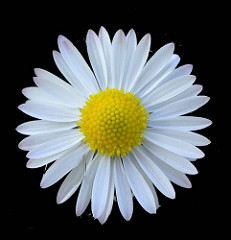

In [69]:
from IPython.display import Image
Image("tf_files/flower_photos/daisy/21652746_cc379e0eea_m.jpg")
      
#       2213954589_c7da4b1486.jpg")

In [54]:
%run scripts/label_image.py --graph=tf_files/retrained_graph.pb \
    --image=tf_files/flower_photos/daisy/21652746_cc379e0eea_m.jpg


Evaluation time (1-image): 0.260s

daisy (score=0.98849)
dandelion (score=0.01068)
sunflowers (score=0.00083)
roses (score=0.00000)
tulips (score=0.00000)


El resultado de esta evaluacion indica una alta probabilidad (~98%) de que la imagen representa una margarita (daisy es el nombre comun de la margarita). 

Podemos usar el mismo script `label_image.py` para clasificar cualquier imagen, ya sea de la coleccion que descargamos (imagenes en el directorio `tf_files/flower_photos/`) o una imagen nueva. Solo es necesario modificar el argumento de `--image` correspondiente a la ruta de la imagen

In [68]:
%run scripts/label_image.py \
  --graph=tf_files/retrained_graph.pb \
  --image=tf_files/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg


Evaluation time (1-image): 0.177s

sunflowers (score=0.92871)
daisy (score=0.07087)
dandelion (score=0.00036)
roses (score=0.00005)
tulips (score=0.00000)


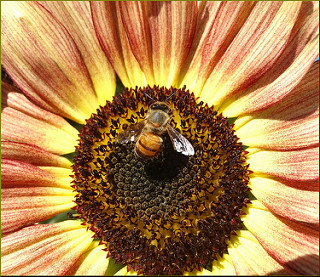

In [70]:
Image("tf_files/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg")

Una imagen descargada de algun lugar del mundo:

In [66]:
!wget -O girasol.jpg https://www.veseys.com/media/catalog/product/cache/image/e9c3970ab036de70892d86c6d221abfe/2/4/24750a-24750a-image-24750-copper%20queen.jpg 


--2019-01-31 18:36:05--  https://www.veseys.com/media/catalog/product/cache/image/e9c3970ab036de70892d86c6d221abfe/2/4/24750a-24750a-image-24750-copper%20queen.jpg
Resolving www.veseys.com (www.veseys.com)... 104.25.49.17, 104.25.48.17, 2606:4700:20::6819:3111, ...
Connecting to www.veseys.com (www.veseys.com)|104.25.49.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109563 (107K) [image/jpeg]
Saving to: ‘girasol.jpg’

girasol.jpg         100%[===================>] 107.00K  --.-KB/s    in 0.03s   

2019-01-31 18:36:05 (4.14 MB/s) - ‘girasol.jpg’ saved [109563/109563]



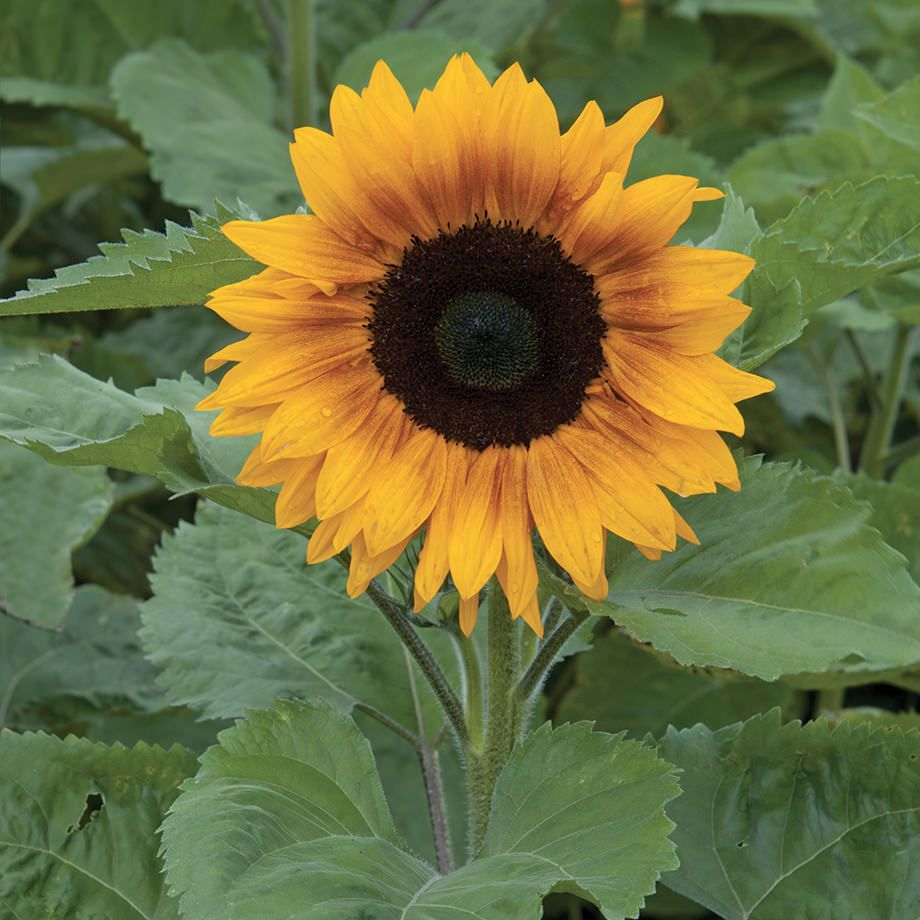

In [75]:
Image("girasol.jpg",width=256)


In [76]:
%run scripts/label_image.py \
  --graph=tf_files/retrained_graph.pb \
  --image=girasol.jpg


Evaluation time (1-image): 0.254s

sunflowers (score=0.99633)
dandelion (score=0.00189)
daisy (score=0.00176)
roses (score=0.00002)
tulips (score=0.00000)


--2019-01-31 18:42:30--  https://www.veseys.com/media/catalog/product/cache/image/700x700/e9c3970ab036de70892d86c6d221abfe/5/8/58037-58037-image-58037-at%20last.jpg
Resolving www.veseys.com (www.veseys.com)... 104.25.48.17, 104.25.49.17, 2606:4700:20::6819:3011, ...
Connecting to www.veseys.com (www.veseys.com)|104.25.48.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66462 (65K) [image/jpeg]
Saving to: ‘rose.jpg’

rose.jpg            100%[===================>]  64.90K  --.-KB/s    in 0.02s   

2019-01-31 18:42:30 (3.42 MB/s) - ‘rose.jpg’ saved [66462/66462]



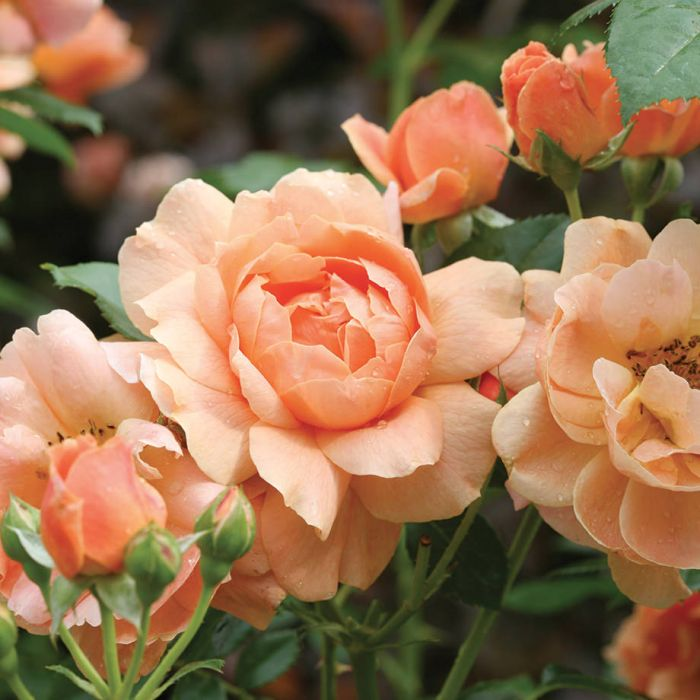

In [81]:
!wget -O rose.jpg https://www.veseys.com/media/catalog/product/cache/image/700x700/e9c3970ab036de70892d86c6d221abfe/5/8/58037-58037-image-58037-at%20last.jpg
Image("rose.jpg", width=256)

In [82]:
%run scripts/label_image.py \
  --graph=tf_files/retrained_graph.pb \
  --image=rose.jpg


Evaluation time (1-image): 0.241s

roses (score=0.99486)
tulips (score=0.00474)
dandelion (score=0.00024)
daisy (score=0.00010)
sunflowers (score=0.00006)


--2019-01-31 18:44:40--  https://upload.wikimedia.org/wikipedia/commons/5/54/TaraxacumOfficinaleSeed.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2451125 (2.3M) [image/jpeg]
Saving to: ‘dandelion.jpg’

dandelion.jpg       100%[===================>]   2.34M  --.-KB/s    in 0.1s    

2019-01-31 18:44:40 (16.2 MB/s) - ‘dandelion.jpg’ saved [2451125/2451125]



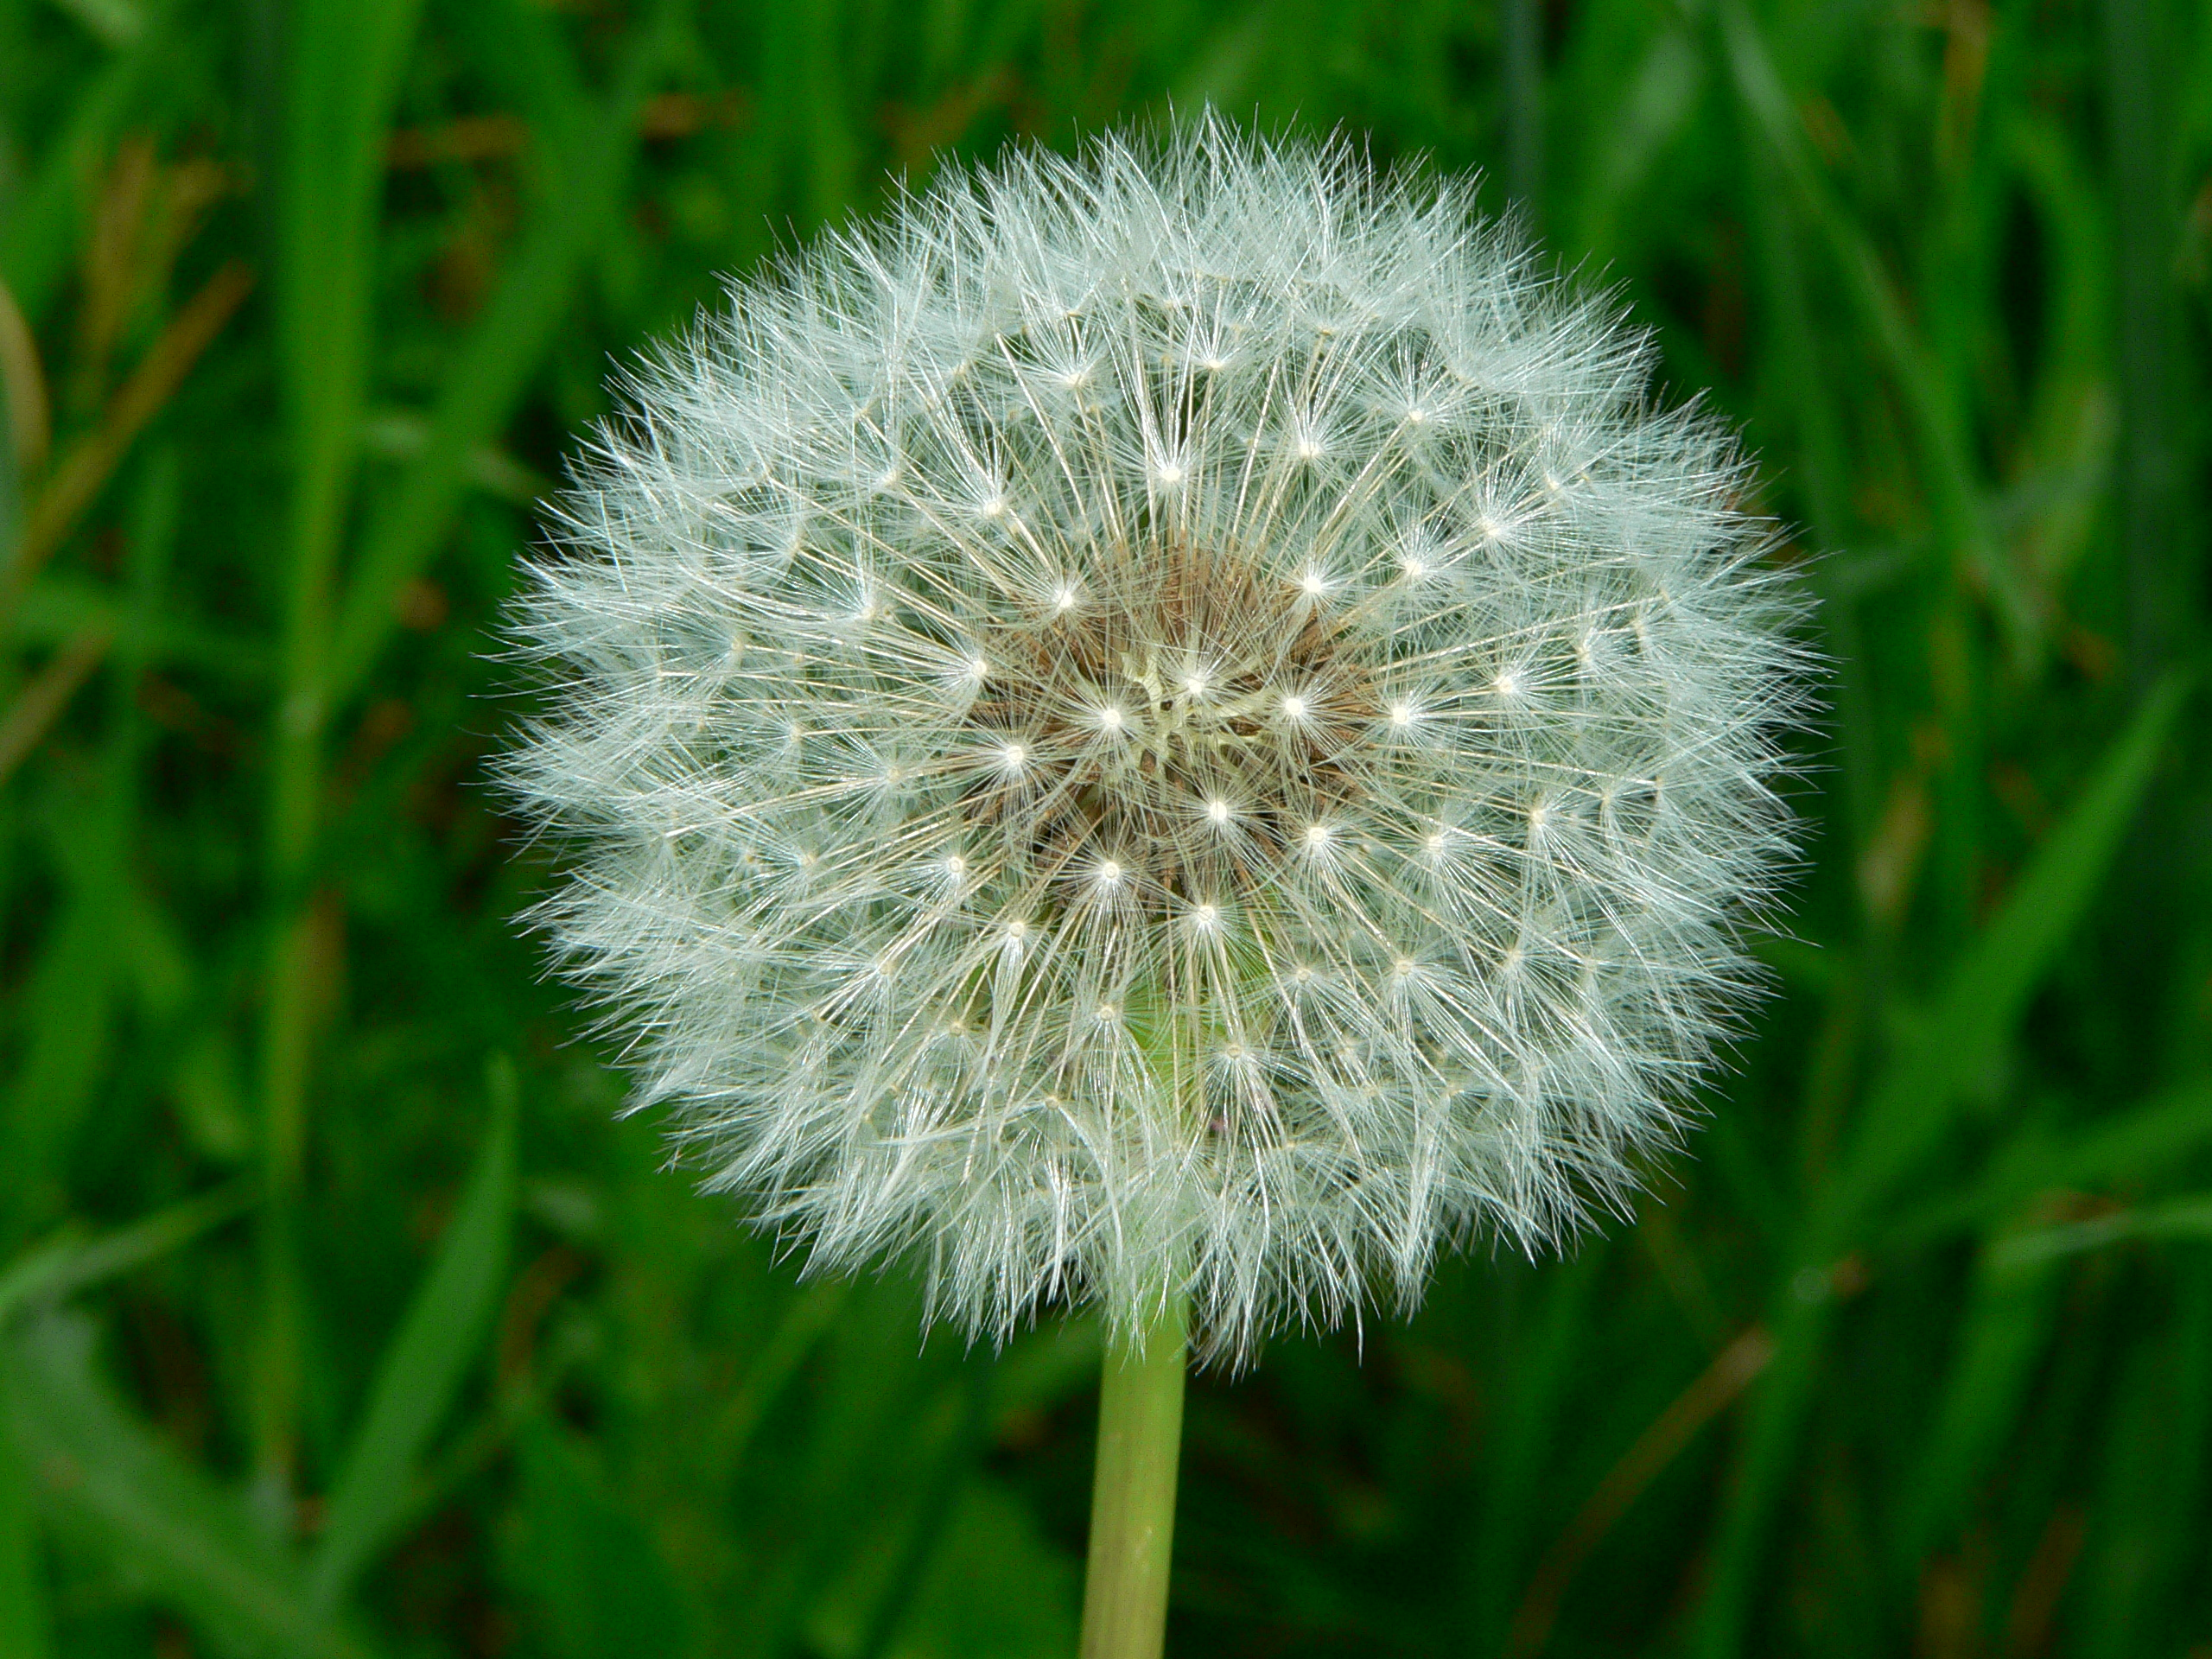

In [84]:
!wget -O dandelion.jpg https://upload.wikimedia.org/wikipedia/commons/5/54/TaraxacumOfficinaleSeed.JPG
Image("dandelion.jpg", width=256)

In [85]:
%run scripts/label_image.py \
  --graph=tf_files/retrained_graph.pb \
  --image=dandelion.jpg


Evaluation time (1-image): 0.195s

dandelion (score=0.99997)
sunflowers (score=0.00003)
daisy (score=0.00000)
tulips (score=0.00000)
roses (score=0.00000)


## Entrenando sus propias categorias
Ahora que tienen un script funcionando, pueden utilizar el script para reentrenar el modelo usando sus propias categorias. Todo lo que tienen que hacer es basicamente adquirir datos y organizarlos de manera que el script pueda localizarlos. El script utiliza el nombre del directorio como una categoria y las imagenes contenidas en cada directorio son las muestras que usa para reentrenar la red.

Para entender esta idea repetiremso el ejercicio usando un pequeno conjunto de datos de ls personajes de la serie de television [The Simpsons](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset). Basicamente repetiremos los pasos que hemos hecho a lo largo de esta libreta. Pero lo haremos en una libreta nueva. Hasta entonces, esperamos que hayan disfrutado de este ejercicio.